In [7]:
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
# drop each daily csv into its own data frame

monday = pd.read_csv('data/monday.csv', delimiter=';', parse_dates=True, index_col='timestamp')
tuesday = pd.read_csv('data/tuesday.csv', delimiter=';', parse_dates=True, index_col='timestamp')
wednesday = pd.read_csv('data/wednesday.csv', delimiter=';', parse_dates=True, index_col='timestamp')
thursday = pd.read_csv('data/thursday.csv', delimiter=';', parse_dates=True, index_col='timestamp')
friday = pd.read_csv('data/friday.csv', delimiter=';', parse_dates=True, index_col='timestamp')

In [9]:
# create a day column

monday['day'] = 'Monday'
tuesday['day'] = 'Tuesday'
wednesday['day'] = 'Wednesday'
thursday['day'] = 'Thursday'
friday['day'] = 'Friday'

In [10]:
#get the customers in order ready for unique customer no's
monday= monday.sort_values(by=['customer_no', 'location'])
tuesday= tuesday.sort_values(by=['customer_no', 'location'])
wednesday= wednesday.sort_values(by=['customer_no', 'location'])
thursday= thursday.sort_values(by=['customer_no', 'location'])
friday= friday.sort_values(by=['customer_no', 'location'])

In [11]:
# create a dataframe containing all daily dataframes

all_days = pd.concat([monday, tuesday, wednesday, thursday, friday])

In [6]:
all_days

customer_no  location     day
timestamp                                         
2019-09-02 07:05:00            1  checkout  Monday
2019-09-02 07:03:00            1     dairy  Monday
2019-09-02 07:06:00            2  checkout  Monday
2019-09-02 07:03:00            2     dairy  Monday
2019-09-02 07:06:00            3  checkout  Monday
...                          ...       ...     ...
2019-09-06 21:48:00         1507     dairy  Friday
2019-09-06 21:50:00         1508  checkout  Friday
2019-09-06 21:48:00         1508     dairy  Friday
2019-09-06 21:50:00         1509    drinks  Friday
2019-09-06 21:50:00         1510    spices  Friday

[24877 rows x 3 columns]

In [12]:
# in daily dataframes, customer_no are reset to 1 each day. We want unique numbers for each customer,
# so we'll make sure that there is no repetition in customer_no by creating a new ordered number for each day
# which is higher than the total number of customers of the previous day

all_days = all_days.reset_index()
all_days['new_cust_no'] = '1'
#all_days = all_days.sort_values(by=['customer_no', 'timestamp'])
all_days

timestamp  customer_no  location     day new_cust_no
0     2019-09-02 07:05:00            1  checkout  Monday           1
1     2019-09-02 07:03:00            1     dairy  Monday           1
2     2019-09-02 07:06:00            2  checkout  Monday           1
3     2019-09-02 07:03:00            2     dairy  Monday           1
4     2019-09-02 07:06:00            3  checkout  Monday           1
...                   ...          ...       ...     ...         ...
24872 2019-09-06 21:48:00         1507     dairy  Friday           1
24873 2019-09-06 21:50:00         1508  checkout  Friday           1
24874 2019-09-06 21:48:00         1508     dairy  Friday           1
24875 2019-09-06 21:50:00         1509    drinks  Friday           1
24876 2019-09-06 21:50:00         1510    spices  Friday           1

[24877 rows x 5 columns]

In [13]:
current_customer_no = 1
for i in range(1,len(all_days)):
    if all_days['customer_no'][i] != all_days['customer_no'][i-1]:
        current_customer_no +=1
        all_days['new_cust_no'][i] = current_customer_no
    else:
        all_days['new_cust_no'][i] = all_days['new_cust_no'][i-1]

all_days

/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


timestamp  customer_no  location     day new_cust_no
0     2019-09-02 07:05:00            1  checkout  Monday           1
1     2019-09-02 07:03:00            1     dairy  Monday           1
2     2019-09-02 07:06:00            2  checkout  Monday           2
3     2019-09-02 07:03:00            2     dairy  Monday           2
4     2019-09-02 07:06:00            3  checkout  Monday           3
...                   ...          ...       ...     ...         ...
24872 2019-09-06 21:48:00         1507     dairy  Friday        7442
24873 2019-09-06 21:50:00         1508  checkout  Friday        7443
24874 2019-09-06 21:48:00         1508     dairy  Friday        7443
24875 2019-09-06 21:50:00         1509    drinks  Friday        7444
24876 2019-09-06 21:50:00         1510    spices  Friday        7445

[24877 rows x 5 columns]

In [14]:
# Now we replace the 'customer_no' column with the new data created in 'new_cust_no'
# remove the 'new_cust_no' column and relpace the index with the timestamp.

all_days['customer_no'] = all_days['new_cust_no']
all_days = all_days.drop(['new_cust_no'], axis=1)
all_days = all_days.set_index('timestamp')
all_days

customer_no  location     day
timestamp                                        
2019-09-02 07:05:00           1  checkout  Monday
2019-09-02 07:03:00           1     dairy  Monday
2019-09-02 07:06:00           2  checkout  Monday
2019-09-02 07:03:00           2     dairy  Monday
2019-09-02 07:06:00           3  checkout  Monday
...                         ...       ...     ...
2019-09-06 21:48:00        7442     dairy  Friday
2019-09-06 21:50:00        7443  checkout  Friday
2019-09-06 21:48:00        7443     dairy  Friday
2019-09-06 21:50:00        7444    drinks  Friday
2019-09-06 21:50:00        7445    spices  Friday

[24877 rows x 3 columns]

## Understand customer location over time

How busy is each section of our market at each hour of the day?

In [15]:
# we want to end up with a count of customers each hour, so we'll resample the data by hour
# we want to see the count of customers in each location, so we group by location

all_days_sampled= all_days.groupby('location').resample('1H').agg({'customer_no': 'count'}).reset_index()

In [16]:
# to facilitate plotting, we create an "hour" column which will be our x axis

all_days_sampled['hour'] = all_days_sampled['timestamp'].dt.hour

# we'll also create a day column to be able to isolate one day

all_days_sampled['day'] = all_days_sampled['timestamp'].dt.day_name()


Text(0.5, 1.0, 'Count of customers in each market location over the course of Monday')

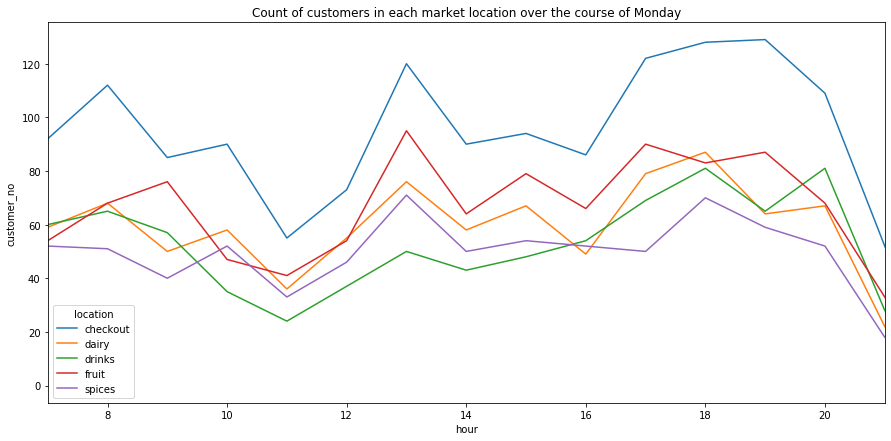

In [17]:
# now we plot! The all_days dataframe contains data for the 5 days, so I'll limit this plot to Monday
# so we have an accurate view of the number of customers over each hour of 1 day

plt.figure(figsize=(15,7))
sns.lineplot(data=all_days_sampled[all_days_sampled['day'] == 'Monday'], x='hour', y='customer_no', hue='location')
plt.xlim(7, 21)
plt.title('Count of customers in each market location over the course of Monday')

## Total number of customers in shop during the day

How many customers are in total in our supermarket during a day?

In [18]:
all_days_sampled

location           timestamp  customer_no  hour     day
0    checkout 2019-09-02 07:00:00           92     7  Monday
1    checkout 2019-09-02 08:00:00          112     8  Monday
2    checkout 2019-09-02 09:00:00           85     9  Monday
3    checkout 2019-09-02 10:00:00           90    10  Monday
4    checkout 2019-09-02 11:00:00           55    11  Monday
..        ...                 ...          ...   ...     ...
550    spices 2019-09-06 17:00:00           65    17  Friday
551    spices 2019-09-06 18:00:00           98    18  Friday
552    spices 2019-09-06 19:00:00           65    19  Friday
553    spices 2019-09-06 20:00:00           54    20  Friday
554    spices 2019-09-06 21:00:00           20    21  Friday

[555 rows x 5 columns]

In [19]:
# we can use our resampled dataframe and simply group by hour to get rid of the location grouping, 
# which is not important anymore. This will give us the number of customer in the shop for each hour,
# but those counts will be a sum for all 5 days!

all_day_everywhere = all_days_sampled.groupby('hour').customer_no.sum().reset_index()

In [20]:
# to find the mean of customer count in a day, we can divide the customer_no count by our number of days, 5.
all_day_everywhere['customer_no'] = all_day_everywhere['customer_no']/5

Text(0.5, 1.0, 'Total number of customers in the shop throughout the day')

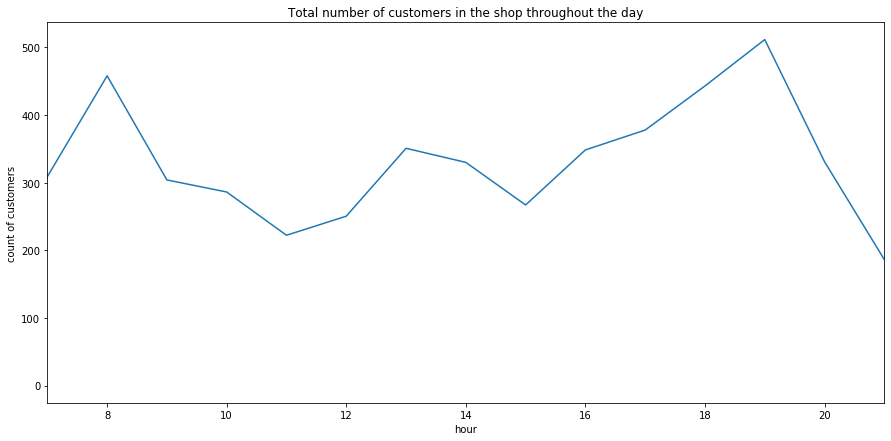

In [21]:
# and we plot!
plt.figure(figsize=(15,7))
sns.lineplot(data=all_day_everywhere, x='hour', y='customer_no')
plt.xlim(7, 21)
plt.ylabel('count of customers')
plt.title('Total number of customers in the shop throughout the day')

## Weekly analysis

Do the number of customers in each location vary during the week?

In [22]:
count_by_day = all_days
count_by_day = count_by_day.groupby(['day','location'])['customer_no'].count().reset_index()
count_by_day.rename(columns={'customer_no': 'customer_count'}, inplace=True)
count_by_day

day  location  customer_count
0      Friday  checkout            1502
1      Friday     dairy             932
2      Friday    drinks             844
3      Friday     fruit            1057
4      Friday    spices             790
5      Monday  checkout            1437
6      Monday     dairy             895
7      Monday    drinks             797
8      Monday     fruit            1005
9      Monday    spices             750
10   Thursday  checkout            1532
11   Thursday     dairy             965
12   Thursday    drinks             776
13   Thursday     fruit            1041
14   Thursday    spices             790
15    Tuesday  checkout            1420
16    Tuesday     dairy             911
17    Tuesday    drinks             713
18    Tuesday     fruit             976
19    Tuesday    spices             694
20  Wednesday  checkout            1526
21  Wednesday     dairy             976
22  Wednesday    drinks             775
23  Wednesday     fruit            1043
24  Wednesday    spices             730

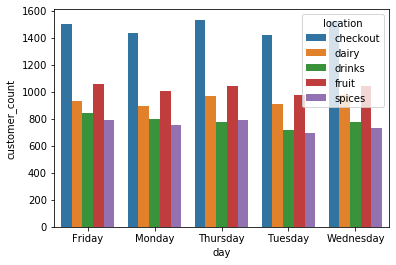

In [23]:
sns.barplot(x='day', y='customer_count', data=count_by_day, hue='location')

# Expanding the dataframe to facilitate transition matrix

## Add checkout time if did not checkout

In [24]:
# some users do not have any row for "checkout". They should be forced out of the shop at 21:55
#so we can close at 22:00

def find_checkout_time(timestamp):
    timestamp=pd.Timestamp(timestamp)
    date_of_visit = timestamp.date()
    checkout = pd.Timestamp('21:55:00')
    
    checkout_time = datetime.strptime('21:55:00', '%H:%M:%S').time()
    checkout_timestamp = pd.Timestamp.combine(date_of_visit, checkout_time)
    checkout_timestamp = pd.to_datetime(checkout_timestamp, errors = 'coerce')
    return checkout_timestamp
    #return date_of_visit
    
find_checkout_time('2019-09-06 21:48:00')

Timestamp('2019-09-06 21:55:00')

In [25]:
#We need to find ind customers who didn't check out

# working with indexes can be tricky so we'll move the timestamp to its own column
all_days.reset_index(inplace=True)

# we'll create a new dataframe that will store our new data
new_df = pd.DataFrame()

# we create one dataframe by customer
for customer in all_days.customer_no.unique():
    customer_df = all_days[all_days['customer_no'] == customer]
    
    # then we try to find the value checkout in their location. If it doesn't exist, we need to add a row for checkout
    # for that customer
    
    if 'checkout' not in customer_df['location'].unique():
        print('customer ' + str(customer) + ' did not checkout')
        # we look at the first row of that customer_df to find the customer_no, day and timestamps we'll be 
        # working with
        ref_row = customer_df.iloc[0]
        current_datetime = ref_row['timestamp']
        
        # now that we know the timestamp of their visit, we can apply our find_checkout_time function 
        # to find the timestamp of the row we need to add
        checkout_time_for_day = find_checkout_time(ref_row['timestamp'])
        
        # we create a series with the checkout time and some values from our first row (ref_row)
        to_append = pd.Series([checkout_time_for_day, ref_row['customer_no'],'checkout',ref_row['day']], index = customer_df.columns)
        # we append that row to the customer dataframe
        customer_df = customer_df.append(to_append, ignore_index=True)
    
    # now we can append the customer dataframe containing the new row to our new dataframe!
    new_df = pd.concat([new_df, customer_df])

customer 1430 did not checkout
customer 1433 did not checkout
customer 1437 did not checkout
customer 1439 did not checkout
customer 1440 did not checkout
customer 1441 did not checkout
customer 1443 did not checkout
customer 1445 did not checkout
customer 1446 did not checkout
customer 1447 did not checkout
customer 2858 did not checkout
customer 2869 did not checkout
customer 4389 did not checkout
customer 4396 did not checkout
customer 4397 did not checkout
customer 4398 did not checkout
customer 4399 did not checkout
customer 5927 did not checkout
customer 5932 did not checkout
customer 5933 did not checkout
customer 7429 did not checkout
customer 7431 did not checkout
customer 7435 did not checkout
customer 7438 did not checkout
customer 7440 did not checkout
customer 7441 did not checkout
customer 7444 did not checkout
customer 7445 did not checkout


## Add Self transitions

We currently only have rows for timestamps with new locations. Therefore, the dataframe needs to be filled out with self transition. if the person is in dairy at 7:30 and changes to spices at 7:35 it means they were in dairy also at 31, 32, 33, 34

We'll add these self transitions

In [26]:
for customer in new_df.customer_no.unique():
    print(customer)
    
    # we want to find the first and last timestamp for each customer so we can generate a range of the 
    # timestamps inbetween

    start = new_df['timestamp'][new_df['customer_no'] == customer].min()
    end = new_df['timestamp'][new_df['customer_no'] == customer].max()
    ref_row = new_df[new_df['customer_no']== customer].loc[new_df[new_df['customer_no']== customer].index[0]]
    minutes_timestamps = pd.date_range(start, end, freq='T')
    
    # if those timestamps are not in the dataframe for that user, we want to add a row
    for timestamp in minutes_timestamps:
        if timestamp not in new_df['timestamp'][new_df['customer_no']== customer].unique():
            
            # once again, we generate a series to append. We leave the location empty for now
            series = pd.Series([timestamp, ref_row['customer_no'], np.nan, ref_row['day']],index = new_df.columns)
            new_df = new_df.append(series, ignore_index=True)
            print('appended ' + str(series))
            
# we sort the values of our dataframe by customer and timestamp
new_df = new_df.sort_values(['customer_no','timestamp'])

# we can now fill the location column
new_df = new_df.ffill()
    
new_df

1
appended timestamp      2019-09-02 07:04:00
customer_no                      1
location                       NaN
day                         Monday
dtype: object
2
appended timestamp      2019-09-02 07:04:00
customer_no                      2
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:05:00
customer_no                      2
location                       NaN
day                         Monday
dtype: object
3
appended timestamp      2019-09-02 07:05:00
customer_no                      3
location                       NaN
day                         Monday
dtype: object
4
appended timestamp      2019-09-02 07:05:00
customer_no                      4
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:06:00
customer_no                      4
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 07:14:00
customer_no                     17
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:15:00
customer_no                     17
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:16:00
customer_no                     17
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:17:00
customer_no                     17
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:18:00
customer_no                     17
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:19:00
customer_no                     17
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 07:18:00
customer_no                     32
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:19:00
customer_no                     32
location                       NaN
day                         Monday
dtype: object
33
appended timestamp      2019-09-02 07:18:00
customer_no                     33
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:19:00
customer_no                     33
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:21:00
customer_no                     33
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:25:00
customer_no                     33
location                       NaN
day                         Monday
dtype: object
appended timestamp 

appended timestamp      2019-09-02 07:34:00
customer_no                     43
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:35:00
customer_no                     43
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:36:00
customer_no                     43
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:37:00
customer_no                     43
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:38:00
customer_no                     43
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:40:00
customer_no                     43
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 07:36:00
customer_no                     54
location                       NaN
day                         Monday
dtype: object
55
appended timestamp      2019-09-02 07:31:00
customer_no                     55
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:33:00
customer_no                     55
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:34:00
customer_no                     55
location                       NaN
day                         Monday
dtype: object
56
appended timestamp      2019-09-02 07:31:00
customer_no                     56
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:32:00
customer_no                     56
location                       NaN
day                         Monday
dtype: object
appended timesta

appended timestamp      2019-09-02 07:43:00
customer_no                     70
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:45:00
customer_no                     70
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:46:00
customer_no                     70
location                       NaN
day                         Monday
dtype: object
71
appended timestamp      2019-09-02 07:45:00
customer_no                     71
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:46:00
customer_no                     71
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:47:00
customer_no                     71
location                       NaN
day                         Monday
dtype: object
appended timestamp 

appended timestamp      2019-09-02 07:50:00
customer_no                     82
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:51:00
customer_no                     82
location                       NaN
day                         Monday
dtype: object
83
84
appended timestamp      2019-09-02 07:49:00
customer_no                     84
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:51:00
customer_no                     84
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:52:00
customer_no                     84
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:53:00
customer_no                     84
location                       NaN
day                         Monday
dtype: object
appended timesta

appended timestamp      2019-09-02 08:21:00
customer_no                     95
location                       NaN
day                         Monday
dtype: object
96
97
appended timestamp      2019-09-02 07:55:00
customer_no                     97
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:56:00
customer_no                     97
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:57:00
customer_no                     97
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:58:00
customer_no                     97
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 07:59:00
customer_no                     97
location                       NaN
day                         Monday
dtype: object
appended timesta

appended timestamp      2019-09-02 08:12:00
customer_no                    107
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:13:00
customer_no                    107
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:14:00
customer_no                    107
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:15:00
customer_no                    107
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:16:00
customer_no                    107
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:17:00
customer_no                    107
location                       NaN
day                         Monday
dtype: object
108
appended timestamp

appended timestamp      2019-09-02 08:14:00
customer_no                    111
location                       NaN
day                         Monday
dtype: object
112
appended timestamp      2019-09-02 08:08:00
customer_no                    112
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:09:00
customer_no                    112
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:10:00
customer_no                    112
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:11:00
customer_no                    112
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:12:00
customer_no                    112
location                       NaN
day                         Monday
dtype: object
113
appended times

appended timestamp      2019-09-02 08:32:00
customer_no                    133
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:34:00
customer_no                    133
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:35:00
customer_no                    133
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:37:00
customer_no                    133
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:38:00
customer_no                    133
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:39:00
customer_no                    133
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 08:29:00
customer_no                    148
location                       NaN
day                         Monday
dtype: object
149
appended timestamp      2019-09-02 08:30:00
customer_no                    149
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:31:00
customer_no                    149
location                       NaN
day                         Monday
dtype: object
150
appended timestamp      2019-09-02 08:30:00
customer_no                    150
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:31:00
customer_no                    150
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:32:00
customer_no                    150
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 08:43:00
customer_no                    159
location                       NaN
day                         Monday
dtype: object
160
appended timestamp      2019-09-02 08:34:00
customer_no                    160
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:36:00
customer_no                    160
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:37:00
customer_no                    160
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:38:00
customer_no                    160
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:39:00
customer_no                    160
location                       NaN
day                         Monday
dtype: object
161
appended times

appended timestamp      2019-09-02 08:43:00
customer_no                    167
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:44:00
customer_no                    167
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:45:00
customer_no                    167
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:46:00
customer_no                    167
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:49:00
customer_no                    167
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:50:00
customer_no                    167
location                       NaN
day                         Monday
dtype: object
appended timestamp    

182
appended timestamp      2019-09-02 08:44:00
customer_no                    182
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:47:00
customer_no                    182
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:48:00
customer_no                    182
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:49:00
customer_no                    182
location                       NaN
day                         Monday
dtype: object
183
184
185
appended timestamp      2019-09-02 08:47:00
customer_no                    185
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:48:00
customer_no                    185
location                       NaN
day                         Monday
dtype: object
append

appended timestamp      2019-09-02 08:50:00
customer_no                    192
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:51:00
customer_no                    192
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:52:00
customer_no                    192
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:53:00
customer_no                    192
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:54:00
customer_no                    192
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 08:56:00
customer_no                    192
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 09:06:00
customer_no                    206
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:07:00
customer_no                    206
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:08:00
customer_no                    206
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:09:00
customer_no                    206
location                       NaN
day                         Monday
dtype: object
207
appended timestamp      2019-09-02 08:56:00
customer_no                    207
location                       NaN
day                         Monday
dtype: object
208
appended timestamp      2019-09-02 08:57:00
customer_no                    208
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 09:09:00
customer_no                    219
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:11:00
customer_no                    219
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:12:00
customer_no                    219
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:13:00
customer_no                    219
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:14:00
customer_no                    219
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:15:00
customer_no                    219
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 09:23:00
customer_no                    229
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:24:00
customer_no                    229
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:25:00
customer_no                    229
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:26:00
customer_no                    229
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:27:00
customer_no                    229
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:29:00
customer_no                    229
location                       NaN
day                         Monday
dtype: object
230
appended timestamp

appended timestamp      2019-09-02 09:19:00
customer_no                    236
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:20:00
customer_no                    236
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:21:00
customer_no                    236
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:22:00
customer_no                    236
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:23:00
customer_no                    236
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:24:00
customer_no                    236
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 09:35:00
customer_no                    254
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:36:00
customer_no                    254
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:39:00
customer_no                    254
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:40:00
customer_no                    254
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:41:00
customer_no                    254
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:42:00
customer_no                    254
location                       NaN
day                         Monday
dtype: object
255
appended timestamp

appended timestamp      2019-09-02 09:43:00
customer_no                    269
location                       NaN
day                         Monday
dtype: object
270
271
appended timestamp      2019-09-02 09:41:00
customer_no                    271
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:43:00
customer_no                    271
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:44:00
customer_no                    271
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:45:00
customer_no                    271
location                       NaN
day                         Monday
dtype: object
272
appended timestamp      2019-09-02 09:42:00
customer_no                    272
location                       NaN
day                         Monday
dtype: object
273
append

appended timestamp      2019-09-02 09:48:00
customer_no                    285
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:49:00
customer_no                    285
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:50:00
customer_no                    285
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:51:00
customer_no                    285
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:52:00
customer_no                    285
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:53:00
customer_no                    285
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 10:15:00
customer_no                    288
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:16:00
customer_no                    288
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:17:00
customer_no                    288
location                       NaN
day                         Monday
dtype: object
289
290
appended timestamp      2019-09-02 09:53:00
customer_no                    290
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:54:00
customer_no                    290
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 09:55:00
customer_no                    290
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 10:01:00
customer_no                    299
location                       NaN
day                         Monday
dtype: object
300
appended timestamp      2019-09-02 10:02:00
customer_no                    300
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:03:00
customer_no                    300
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:04:00
customer_no                    300
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:05:00
customer_no                    300
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:06:00
customer_no                    300
location                       NaN
day                         Monday
dtype: object
301
appended times

311
312
appended timestamp      2019-09-02 10:09:00
customer_no                    312
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:10:00
customer_no                    312
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:11:00
customer_no                    312
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:13:00
customer_no                    312
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:14:00
customer_no                    312
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:16:00
customer_no                    312
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 10:18:00
customer_no                    327
location                       NaN
day                         Monday
dtype: object
328
appended timestamp      2019-09-02 10:18:00
customer_no                    328
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:20:00
customer_no                    328
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:21:00
customer_no                    328
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:22:00
customer_no                    328
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:23:00
customer_no                    328
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 10:36:00
customer_no                    339
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:37:00
customer_no                    339
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:38:00
customer_no                    339
location                       NaN
day                         Monday
dtype: object
340
appended timestamp      2019-09-02 10:28:00
customer_no                    340
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:29:00
customer_no                    340
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:30:00
customer_no                    340
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 10:46:00
customer_no                    350
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:47:00
customer_no                    350
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:48:00
customer_no                    350
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:49:00
customer_no                    350
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:50:00
customer_no                    350
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:51:00
customer_no                    350
location                       NaN
day                         Monday
dtype: object
351
appended timestamp

appended timestamp      2019-09-02 11:03:00
customer_no                    361
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:05:00
customer_no                    361
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:06:00
customer_no                    361
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:07:00
customer_no                    361
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:08:00
customer_no                    361
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:09:00
customer_no                    361
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 10:52:00
customer_no                    372
location                       NaN
day                         Monday
dtype: object
373
appended timestamp      2019-09-02 10:50:00
customer_no                    373
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:54:00
customer_no                    373
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 10:56:00
customer_no                    373
location                       NaN
day                         Monday
dtype: object
374
375
appended timestamp      2019-09-02 10:50:00
customer_no                    375
location                       NaN
day                         Monday
dtype: object
376
377
appended timestamp      2019-09-02 10:50:00
customer_no                    377
location                       NaN
day                         Monday
dtype: object
37

appended timestamp      2019-09-02 11:10:00
customer_no                    386
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:11:00
customer_no                    386
location                       NaN
day                         Monday
dtype: object
387
388
appended timestamp      2019-09-02 11:07:00
customer_no                    388
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:08:00
customer_no                    388
location                       NaN
day                         Monday
dtype: object
389
appended timestamp      2019-09-02 11:09:00
customer_no                    389
location                       NaN
day                         Monday
dtype: object
390
appended timestamp      2019-09-02 11:09:00
customer_no                    390
location                       NaN
day                         Monday
dtype: object
append

appended timestamp      2019-09-02 11:23:00
customer_no                    402
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:24:00
customer_no                    402
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:25:00
customer_no                    402
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:26:00
customer_no                    402
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:27:00
customer_no                    402
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:30:00
customer_no                    402
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 11:39:00
customer_no                    415
location                       NaN
day                         Monday
dtype: object
416
417
appended timestamp      2019-09-02 11:33:00
customer_no                    417
location                       NaN
day                         Monday
dtype: object
418
419
420
appended timestamp      2019-09-02 11:35:00
customer_no                    420
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:37:00
customer_no                    420
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:38:00
customer_no                    420
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 11:40:00
customer_no                    420
location                       NaN
day                         Monday
dtype: object
ap

appended timestamp      2019-09-02 12:00:00
customer_no                    434
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:01:00
customer_no                    434
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:02:00
customer_no                    434
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:03:00
customer_no                    434
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:05:00
customer_no                    434
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:06:00
customer_no                    434
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 12:21:00
customer_no                    453
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:22:00
customer_no                    453
location                       NaN
day                         Monday
dtype: object
454
appended timestamp      2019-09-02 12:14:00
customer_no                    454
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:15:00
customer_no                    454
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:16:00
customer_no                    454
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:17:00
customer_no                    454
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 12:29:00
customer_no                    462
location                       NaN
day                         Monday
dtype: object
463
464
465
appended timestamp      2019-09-02 12:24:00
customer_no                    465
location                       NaN
day                         Monday
dtype: object
466
appended timestamp      2019-09-02 12:26:00
customer_no                    466
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:27:00
customer_no                    466
location                       NaN
day                         Monday
dtype: object
467
appended timestamp      2019-09-02 12:26:00
customer_no                    467
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:27:00
customer_no                    467
location                       NaN
day                         Monday
dtype: object
46

appended timestamp      2019-09-02 12:29:00
customer_no                    478
location                       NaN
day                         Monday
dtype: object
479
480
appended timestamp      2019-09-02 12:29:00
customer_no                    480
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:30:00
customer_no                    480
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:31:00
customer_no                    480
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:32:00
customer_no                    480
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:33:00
customer_no                    480
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 12:52:00
customer_no                    492
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:53:00
customer_no                    492
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:55:00
customer_no                    492
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:57:00
customer_no                    492
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:58:00
customer_no                    492
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:00:00
customer_no                    492
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 12:47:00
customer_no                    501
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:48:00
customer_no                    501
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:49:00
customer_no                    501
location                       NaN
day                         Monday
dtype: object
502
appended timestamp      2019-09-02 12:49:00
customer_no                    502
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:50:00
customer_no                    502
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:51:00
customer_no                    502
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 13:06:00
customer_no                    509
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:07:00
customer_no                    509
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:08:00
customer_no                    509
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:09:00
customer_no                    509
location                       NaN
day                         Monday
dtype: object
510
appended timestamp      2019-09-02 12:55:00
customer_no                    510
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 12:56:00
customer_no                    510
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 13:20:00
customer_no                    526
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:21:00
customer_no                    526
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:26:00
customer_no                    526
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:27:00
customer_no                    526
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:28:00
customer_no                    526
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:30:00
customer_no                    526
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 13:18:00
customer_no                    531
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:19:00
customer_no                    531
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:20:00
customer_no                    531
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:21:00
customer_no                    531
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:22:00
customer_no                    531
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:23:00
customer_no                    531
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 13:12:00
customer_no                    537
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:13:00
customer_no                    537
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:14:00
customer_no                    537
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:15:00
customer_no                    537
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:16:00
customer_no                    537
location                       NaN
day                         Monday
dtype: object
538
appended timestamp      2019-09-02 13:13:00
customer_no                    538
location                       NaN
day                         Monday
dtype: object
appended timestamp

551
appended timestamp      2019-09-02 13:16:00
customer_no                    551
location                       NaN
day                         Monday
dtype: object
552
appended timestamp      2019-09-02 13:18:00
customer_no                    552
location                       NaN
day                         Monday
dtype: object
553
554
appended timestamp      2019-09-02 13:17:00
customer_no                    554
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:18:00
customer_no                    554
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:19:00
customer_no                    554
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:20:00
customer_no                    554
location                       NaN
day                         Monday
dtype: object
append

appended timestamp      2019-09-02 13:24:00
customer_no                    564
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:26:00
customer_no                    564
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:27:00
customer_no                    564
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:28:00
customer_no                    564
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:29:00
customer_no                    564
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:30:00
customer_no                    564
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 13:28:00
customer_no                    571
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:30:00
customer_no                    571
location                       NaN
day                         Monday
dtype: object
572
appended timestamp      2019-09-02 13:32:00
customer_no                    572
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:33:00
customer_no                    572
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:36:00
customer_no                    572
location                       NaN
day                         Monday
dtype: object
573
appended timestamp      2019-09-02 13:31:00
customer_no                    573
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 13:36:00
customer_no                    585
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:38:00
customer_no                    585
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:39:00
customer_no                    585
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:41:00
customer_no                    585
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:42:00
customer_no                    585
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:43:00
customer_no                    585
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 13:43:00
customer_no                    596
location                       NaN
day                         Monday
dtype: object
597
appended timestamp      2019-09-02 13:41:00
customer_no                    597
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:43:00
customer_no                    597
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:44:00
customer_no                    597
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:45:00
customer_no                    597
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:46:00
customer_no                    597
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 13:50:00
customer_no                    618
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:51:00
customer_no                    618
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:52:00
customer_no                    618
location                       NaN
day                         Monday
dtype: object
619
appended timestamp      2019-09-02 13:49:00
customer_no                    619
location                       NaN
day                         Monday
dtype: object
620
appended timestamp      2019-09-02 13:51:00
customer_no                    620
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 13:53:00
customer_no                    620
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 14:02:00
customer_no                    633
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:05:00
customer_no                    633
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:06:00
customer_no                    633
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:07:00
customer_no                    633
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:08:00
customer_no                    633
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:09:00
customer_no                    633
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 14:15:00
customer_no                    653
location                       NaN
day                         Monday
dtype: object
654
appended timestamp      2019-09-02 14:13:00
customer_no                    654
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:14:00
customer_no                    654
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:16:00
customer_no                    654
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:17:00
customer_no                    654
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:18:00
customer_no                    654
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 14:47:00
customer_no                    666
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:48:00
customer_no                    666
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:49:00
customer_no                    666
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:50:00
customer_no                    666
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:51:00
customer_no                    666
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:52:00
customer_no                    666
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 14:24:00
customer_no                    675
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:25:00
customer_no                    675
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:27:00
customer_no                    675
location                       NaN
day                         Monday
dtype: object
676
appended timestamp      2019-09-02 14:25:00
customer_no                    676
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:26:00
customer_no                    676
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:27:00
customer_no                    676
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 14:41:00
customer_no                    689
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:42:00
customer_no                    689
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:44:00
customer_no                    689
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:45:00
customer_no                    689
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:47:00
customer_no                    689
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:48:00
customer_no                    689
location                       NaN
day                         Monday
dtype: object
appended timestamp    

702
703
appended timestamp      2019-09-02 14:43:00
customer_no                    703
location                       NaN
day                         Monday
dtype: object
704
705
706
appended timestamp      2019-09-02 14:44:00
customer_no                    706
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:46:00
customer_no                    706
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:47:00
customer_no                    706
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:48:00
customer_no                    706
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:49:00
customer_no                    706
location                       NaN
day                         Monday
dtype: object
ap

appended timestamp      2019-09-02 14:48:00
customer_no                    717
location                       NaN
day                         Monday
dtype: object
718
appended timestamp      2019-09-02 14:54:00
customer_no                    718
location                       NaN
day                         Monday
dtype: object
719
appended timestamp      2019-09-02 14:54:00
customer_no                    719
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 14:55:00
customer_no                    719
location                       NaN
day                         Monday
dtype: object
720
appended timestamp      2019-09-02 14:58:00
customer_no                    720
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:01:00
customer_no                    720
location                       NaN
day                         Monday
dtype: object
appended t

appended timestamp      2019-09-02 15:01:00
customer_no                    725
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:02:00
customer_no                    725
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:03:00
customer_no                    725
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:04:00
customer_no                    725
location                       NaN
day                         Monday
dtype: object
726
appended timestamp      2019-09-02 15:01:00
customer_no                    726
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:02:00
customer_no                    726
location                       NaN
day                         Monday
dtype: object
appended timestamp

741
appended timestamp      2019-09-02 15:08:00
customer_no                    741
location                       NaN
day                         Monday
dtype: object
742
appended timestamp      2019-09-02 15:10:00
customer_no                    742
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:11:00
customer_no                    742
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:12:00
customer_no                    742
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:13:00
customer_no                    742
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:14:00
customer_no                    742
location                       NaN
day                         Monday
dtype: object
743
appended t

appended timestamp      2019-09-02 15:26:00
customer_no                    752
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:27:00
customer_no                    752
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:29:00
customer_no                    752
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:31:00
customer_no                    752
location                       NaN
day                         Monday
dtype: object
753
appended timestamp      2019-09-02 15:13:00
customer_no                    753
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:15:00
customer_no                    753
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 15:24:00
customer_no                    763
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:25:00
customer_no                    763
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:26:00
customer_no                    763
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:28:00
customer_no                    763
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:29:00
customer_no                    763
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:30:00
customer_no                    763
location                       NaN
day                         Monday
dtype: object
764
appended timestamp

appended timestamp      2019-09-02 15:39:00
customer_no                    772
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:40:00
customer_no                    772
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:41:00
customer_no                    772
location                       NaN
day                         Monday
dtype: object
773
774
appended timestamp      2019-09-02 15:25:00
customer_no                    774
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:26:00
customer_no                    774
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:27:00
customer_no                    774
location                       NaN
day                         Monday
dtype: object
appended times

787
788
appended timestamp      2019-09-02 15:34:00
customer_no                    788
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:35:00
customer_no                    788
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:38:00
customer_no                    788
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:39:00
customer_no                    788
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:41:00
customer_no                    788
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:42:00
customer_no                    788
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 15:46:00
customer_no                    801
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:47:00
customer_no                    801
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:48:00
customer_no                    801
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:49:00
customer_no                    801
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:50:00
customer_no                    801
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:51:00
customer_no                    801
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 15:55:00
customer_no                    811
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:57:00
customer_no                    811
location                       NaN
day                         Monday
dtype: object
812
813
appended timestamp      2019-09-02 15:56:00
customer_no                    813
location                       NaN
day                         Monday
dtype: object
814
appended timestamp      2019-09-02 15:57:00
customer_no                    814
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:58:00
customer_no                    814
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 15:59:00
customer_no                    814
location                       NaN
day                         Monday
dtype: object
815
append

appended timestamp      2019-09-02 16:11:00
customer_no                    827
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:12:00
customer_no                    827
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:13:00
customer_no                    827
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:14:00
customer_no                    827
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:15:00
customer_no                    827
location                       NaN
day                         Monday
dtype: object
828
appended timestamp      2019-09-02 16:15:00
customer_no                    828
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 16:59:00
customer_no                    836
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:00:00
customer_no                    836
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:01:00
customer_no                    836
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:02:00
customer_no                    836
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:03:00
customer_no                    836
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:04:00
customer_no                    836
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 16:49:00
customer_no                    846
location                       NaN
day                         Monday
dtype: object
847
848
appended timestamp      2019-09-02 16:33:00
customer_no                    848
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:34:00
customer_no                    848
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:35:00
customer_no                    848
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:36:00
customer_no                    848
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:37:00
customer_no                    848
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 16:43:00
customer_no                    857
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:45:00
customer_no                    857
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:46:00
customer_no                    857
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:47:00
customer_no                    857
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:48:00
customer_no                    857
location                       NaN
day                         Monday
dtype: object
858
859
appended timestamp      2019-09-02 16:39:00
customer_no                    859
location                       NaN
day                         Monday
dtype: object
appended times

appended timestamp      2019-09-02 16:44:00
customer_no                    872
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:45:00
customer_no                    872
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:46:00
customer_no                    872
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:48:00
customer_no                    872
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:49:00
customer_no                    872
location                       NaN
day                         Monday
dtype: object
873
appended timestamp      2019-09-02 16:44:00
customer_no                    873
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 17:18:00
customer_no                    882
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:20:00
customer_no                    882
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:21:00
customer_no                    882
location                       NaN
day                         Monday
dtype: object
883
884
appended timestamp      2019-09-02 16:49:00
customer_no                    884
location                       NaN
day                         Monday
dtype: object
885
886
887
appended timestamp      2019-09-02 16:51:00
customer_no                    887
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 16:52:00
customer_no                    887
location                       NaN
day                         Monday
dtype: object
ap

appended timestamp      2019-09-02 17:04:00
customer_no                    911
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:05:00
customer_no                    911
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:06:00
customer_no                    911
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:09:00
customer_no                    911
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:10:00
customer_no                    911
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:11:00
customer_no                    911
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 17:09:00
customer_no                    922
location                       NaN
day                         Monday
dtype: object
923
appended timestamp      2019-09-02 17:07:00
customer_no                    923
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:08:00
customer_no                    923
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:09:00
customer_no                    923
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:11:00
customer_no                    923
location                       NaN
day                         Monday
dtype: object
924
925
926
927
appended timestamp      2019-09-02 17:08:00
customer_no                    927
location                       NaN
day                         Monday
dtype: object
ap

appended timestamp      2019-09-02 17:24:00
customer_no                    940
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:25:00
customer_no                    940
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:27:00
customer_no                    940
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:28:00
customer_no                    940
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:29:00
customer_no                    940
location                       NaN
day                         Monday
dtype: object
941
appended timestamp      2019-09-02 17:15:00
customer_no                    941
location                       NaN
day                         Monday
dtype: object
appended timestamp

appended timestamp      2019-09-02 17:19:00
customer_no                    951
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:20:00
customer_no                    951
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:21:00
customer_no                    951
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:22:00
customer_no                    951
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:23:00
customer_no                    951
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:26:00
customer_no                    951
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 17:39:00
customer_no                    967
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:40:00
customer_no                    967
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:41:00
customer_no                    967
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:42:00
customer_no                    967
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:43:00
customer_no                    967
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:44:00
customer_no                    967
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 17:32:00
customer_no                    977
location                       NaN
day                         Monday
dtype: object
978
appended timestamp      2019-09-02 17:33:00
customer_no                    978
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:34:00
customer_no                    978
location                       NaN
day                         Monday
dtype: object
979
980
appended timestamp      2019-09-02 17:33:00
customer_no                    980
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:34:00
customer_no                    980
location                       NaN
day                         Monday
dtype: object
981
appended timestamp      2019-09-02 17:35:00
customer_no                    981
location                       NaN
day                         Monday
dtype: object
append

appended timestamp      2019-09-02 17:43:00
customer_no                    996
location                       NaN
day                         Monday
dtype: object
997
appended timestamp      2019-09-02 17:44:00
customer_no                    997
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:45:00
customer_no                    997
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:46:00
customer_no                    997
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:48:00
customer_no                    997
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:51:00
customer_no                    997
location                       NaN
day                         Monday
dtype: object
appended timestamp

1011
appended timestamp      2019-09-02 17:50:00
customer_no                   1011
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:51:00
customer_no                   1011
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:53:00
customer_no                   1011
location                       NaN
day                         Monday
dtype: object
1012
appended timestamp      2019-09-02 17:50:00
customer_no                   1012
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:51:00
customer_no                   1012
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:52:00
customer_no                   1012
location                       NaN
day                         Monday
dtype: object
appended tim

appended timestamp      2019-09-02 17:54:00
customer_no                   1021
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:55:00
customer_no                   1021
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:56:00
customer_no                   1021
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:57:00
customer_no                   1021
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:58:00
customer_no                   1021
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 17:59:00
customer_no                   1021
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 18:02:00
customer_no                   1035
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:04:00
customer_no                   1035
location                       NaN
day                         Monday
dtype: object
1036
appended timestamp      2019-09-02 18:03:00
customer_no                   1036
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:04:00
customer_no                   1036
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:06:00
customer_no                   1036
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:08:00
customer_no                   1036
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 18:14:00
customer_no                   1045
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:15:00
customer_no                   1045
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:16:00
customer_no                   1045
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:18:00
customer_no                   1045
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:19:00
customer_no                   1045
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:20:00
customer_no                   1045
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 18:14:00
customer_no                   1056
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:15:00
customer_no                   1056
location                       NaN
day                         Monday
dtype: object
1057
1058
1059
appended timestamp      2019-09-02 18:12:00
customer_no                   1059
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:13:00
customer_no                   1059
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:14:00
customer_no                   1059
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:15:00
customer_no                   1059
location                       NaN
day                         Monday
dtype: object
appende

appended timestamp      2019-09-02 18:27:00
customer_no                   1080
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:28:00
customer_no                   1080
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:29:00
customer_no                   1080
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:30:00
customer_no                   1080
location                       NaN
day                         Monday
dtype: object
1081
appended timestamp      2019-09-02 18:22:00
customer_no                   1081
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:23:00
customer_no                   1081
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 18:27:00
customer_no                   1091
location                       NaN
day                         Monday
dtype: object
1092
appended timestamp      2019-09-02 18:27:00
customer_no                   1092
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:28:00
customer_no                   1092
location                       NaN
day                         Monday
dtype: object
1093
appended timestamp      2019-09-02 18:30:00
customer_no                   1093
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:31:00
customer_no                   1093
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:32:00
customer_no                   1093
location                       NaN
day                         Monday
dtype: object
appended tim

appended timestamp      2019-09-02 18:40:00
customer_no                   1105
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:41:00
customer_no                   1105
location                       NaN
day                         Monday
dtype: object
1106
appended timestamp      2019-09-02 18:36:00
customer_no                   1106
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:37:00
customer_no                   1106
location                       NaN
day                         Monday
dtype: object
1107
appended timestamp      2019-09-02 18:37:00
customer_no                   1107
location                       NaN
day                         Monday
dtype: object
1108
1109
appended timestamp      2019-09-02 18:38:00
customer_no                   1109
location                       NaN
day                         Monday
dtype: object
ap

appended timestamp      2019-09-02 18:51:00
customer_no                   1134
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:52:00
customer_no                   1134
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:53:00
customer_no                   1134
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:54:00
customer_no                   1134
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:55:00
customer_no                   1134
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 18:56:00
customer_no                   1134
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 19:01:00
customer_no                   1142
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:02:00
customer_no                   1142
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:03:00
customer_no                   1142
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:04:00
customer_no                   1142
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:05:00
customer_no                   1142
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:06:00
customer_no                   1142
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 19:17:00
customer_no                   1149
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:18:00
customer_no                   1149
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:19:00
customer_no                   1149
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:20:00
customer_no                   1149
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:21:00
customer_no                   1149
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:23:00
customer_no                   1149
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 19:02:00
customer_no                   1154
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:03:00
customer_no                   1154
location                       NaN
day                         Monday
dtype: object
1155
appended timestamp      2019-09-02 18:59:00
customer_no                   1155
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:00:00
customer_no                   1155
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:01:00
customer_no                   1155
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:02:00
customer_no                   1155
location                       NaN
day                         Monday
dtype: object
1156
appended tim

1168
appended timestamp      2019-09-02 19:01:00
customer_no                   1168
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:02:00
customer_no                   1168
location                       NaN
day                         Monday
dtype: object
1169
1170
appended timestamp      2019-09-02 19:02:00
customer_no                   1170
location                       NaN
day                         Monday
dtype: object
1171
appended timestamp      2019-09-02 19:02:00
customer_no                   1171
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:03:00
customer_no                   1171
location                       NaN
day                         Monday
dtype: object
1172
appended timestamp      2019-09-02 19:02:00
customer_no                   1172
location                       NaN
day                         Monday
dtype: obje

appended timestamp      2019-09-02 19:30:00
customer_no                   1189
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:32:00
customer_no                   1189
location                       NaN
day                         Monday
dtype: object
1190
appended timestamp      2019-09-02 19:11:00
customer_no                   1190
location                       NaN
day                         Monday
dtype: object
1191
appended timestamp      2019-09-02 19:10:00
customer_no                   1191
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:11:00
customer_no                   1191
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:12:00
customer_no                   1191
location                       NaN
day                         Monday
dtype: object
appended tim

appended timestamp      2019-09-02 19:32:00
customer_no                   1212
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:33:00
customer_no                   1212
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:35:00
customer_no                   1212
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:36:00
customer_no                   1212
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:37:00
customer_no                   1212
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:38:00
customer_no                   1212
location                       NaN
day                         Monday
dtype: object
appended timestamp    

1220
appended timestamp      2019-09-02 19:27:00
customer_no                   1220
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:29:00
customer_no                   1220
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:30:00
customer_no                   1220
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:31:00
customer_no                   1220
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:32:00
customer_no                   1220
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:33:00
customer_no                   1220
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 19:37:00
customer_no                   1234
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:38:00
customer_no                   1234
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:39:00
customer_no                   1234
location                       NaN
day                         Monday
dtype: object
1235
appended timestamp      2019-09-02 19:36:00
customer_no                   1235
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:37:00
customer_no                   1235
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:39:00
customer_no                   1235
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 19:52:00
customer_no                   1251
location                       NaN
day                         Monday
dtype: object
1252
appended timestamp      2019-09-02 19:46:00
customer_no                   1252
location                       NaN
day                         Monday
dtype: object
1253
appended timestamp      2019-09-02 19:46:00
customer_no                   1253
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:49:00
customer_no                   1253
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:53:00
customer_no                   1253
location                       NaN
day                         Monday
dtype: object
1254
appended timestamp      2019-09-02 19:47:00
customer_no                   1254
location                       NaN
day                         Monday
dtype: object
appende

1273
appended timestamp      2019-09-02 19:53:00
customer_no                   1273
location                       NaN
day                         Monday
dtype: object
1274
1275
appended timestamp      2019-09-02 19:53:00
customer_no                   1275
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:54:00
customer_no                   1275
location                       NaN
day                         Monday
dtype: object
1276
appended timestamp      2019-09-02 19:54:00
customer_no                   1276
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:55:00
customer_no                   1276
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 19:56:00
customer_no                   1276
location                       NaN
day                         Monday
dtype: object
ap

appended timestamp      2019-09-02 20:13:00
customer_no                   1287
location                       NaN
day                         Monday
dtype: object
1288
appended timestamp      2019-09-02 20:03:00
customer_no                   1288
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:04:00
customer_no                   1288
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:07:00
customer_no                   1288
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:08:00
customer_no                   1288
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:10:00
customer_no                   1288
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 20:28:00
customer_no                   1302
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:29:00
customer_no                   1302
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:30:00
customer_no                   1302
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:31:00
customer_no                   1302
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:32:00
customer_no                   1302
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:33:00
customer_no                   1302
location                       NaN
day                         Monday
dtype: object
appended timestamp    

1315
appended timestamp      2019-09-02 20:18:00
customer_no                   1315
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:19:00
customer_no                   1315
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:20:00
customer_no                   1315
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:23:00
customer_no                   1315
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:24:00
customer_no                   1315
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:26:00
customer_no                   1315
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 20:33:00
customer_no                   1326
location                       NaN
day                         Monday
dtype: object
1327
appended timestamp      2019-09-02 20:30:00
customer_no                   1327
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:31:00
customer_no                   1327
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:32:00
customer_no                   1327
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:33:00
customer_no                   1327
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:34:00
customer_no                   1327
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 20:39:00
customer_no                   1339
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:40:00
customer_no                   1339
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:41:00
customer_no                   1339
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:42:00
customer_no                   1339
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:43:00
customer_no                   1339
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:44:00
customer_no                   1339
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 20:50:00
customer_no                   1351
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:51:00
customer_no                   1351
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:52:00
customer_no                   1351
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:53:00
customer_no                   1351
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:54:00
customer_no                   1351
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:55:00
customer_no                   1351
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 20:48:00
customer_no                   1360
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:49:00
customer_no                   1360
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:50:00
customer_no                   1360
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:51:00
customer_no                   1360
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:52:00
customer_no                   1360
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:54:00
customer_no                   1360
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 20:56:00
customer_no                   1378
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:57:00
customer_no                   1378
location                       NaN
day                         Monday
dtype: object
1379
appended timestamp      2019-09-02 20:52:00
customer_no                   1379
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:53:00
customer_no                   1379
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:54:00
customer_no                   1379
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 20:55:00
customer_no                   1379
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-02 21:01:00
customer_no                   1393
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:02:00
customer_no                   1393
location                       NaN
day                         Monday
dtype: object
1394
appended timestamp      2019-09-02 21:02:00
customer_no                   1394
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:03:00
customer_no                   1394
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:04:00
customer_no                   1394
location                       NaN
day                         Monday
dtype: object
1395
appended timestamp      2019-09-02 21:04:00
customer_no                   1395
location                       NaN
day                         Monday
dtype: object
appended tim

appended timestamp      2019-09-02 21:07:00
customer_no                   1407
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:08:00
customer_no                   1407
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:09:00
customer_no                   1407
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:10:00
customer_no                   1407
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:11:00
customer_no                   1407
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:12:00
customer_no                   1407
location                       NaN
day                         Monday
dtype: object
1408
appended timestam

appended timestamp      2019-09-02 21:40:00
customer_no                   1430
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:41:00
customer_no                   1430
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:44:00
customer_no                   1430
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:45:00
customer_no                   1430
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:46:00
customer_no                   1430
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:47:00
customer_no                   1430
location                       NaN
day                         Monday
dtype: object
appended timestamp    

appended timestamp      2019-09-02 21:54:00
customer_no                   1439
location                       NaN
day                         Monday
dtype: object
1440
appended timestamp      2019-09-02 21:47:00
customer_no                   1440
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:48:00
customer_no                   1440
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:50:00
customer_no                   1440
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:51:00
customer_no                   1440
location                       NaN
day                         Monday
dtype: object
appended timestamp      2019-09-02 21:52:00
customer_no                   1440
location                       NaN
day                         Monday
dtype: object
appended timestam

appended timestamp      2019-09-03 07:09:00
customer_no                   1450
location                       NaN
day                        Tuesday
dtype: object
1451
appended timestamp      2019-09-03 07:07:00
customer_no                   1451
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:10:00
customer_no                   1451
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:11:00
customer_no                   1451
location                       NaN
day                        Tuesday
dtype: object
1452
appended timestamp      2019-09-03 07:07:00
customer_no                   1452
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:08:00
customer_no                   1452
location                       NaN
day                        Tuesday
dtype: object
1453
appende

appended timestamp      2019-09-03 07:16:00
customer_no                   1461
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:18:00
customer_no                   1461
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:19:00
customer_no                   1461
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:20:00
customer_no                   1461
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:22:00
customer_no                   1461
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:23:00
customer_no                   1461
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 07:24:00
customer_no                   1483
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:25:00
customer_no                   1483
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:26:00
customer_no                   1483
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:27:00
customer_no                   1483
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:28:00
customer_no                   1483
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:29:00
customer_no                   1483
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

1502
appended timestamp      2019-09-03 07:32:00
customer_no                   1502
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:33:00
customer_no                   1502
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:34:00
customer_no                   1502
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:35:00
customer_no                   1502
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:38:00
customer_no                   1502
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:39:00
customer_no                   1502
location                       NaN
day                        Tuesday
dtype: object
1503
appended tim

1516
appended timestamp      2019-09-03 07:42:00
customer_no                   1516
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:43:00
customer_no                   1516
location                       NaN
day                        Tuesday
dtype: object
1517
appended timestamp      2019-09-03 07:44:00
customer_no                   1517
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:45:00
customer_no                   1517
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:46:00
customer_no                   1517
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:47:00
customer_no                   1517
location                       NaN
day                        Tuesday
dtype: object
1518
appende

appended timestamp      2019-09-03 07:57:00
customer_no                   1527
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:58:00
customer_no                   1527
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 07:59:00
customer_no                   1527
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:00:00
customer_no                   1527
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:01:00
customer_no                   1527
location                       NaN
day                        Tuesday
dtype: object
1528
appended timestamp      2019-09-03 07:49:00
customer_no                   1528
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 08:00:00
customer_no                   1539
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:01:00
customer_no                   1539
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:02:00
customer_no                   1539
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:03:00
customer_no                   1539
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:04:00
customer_no                   1539
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:07:00
customer_no                   1539
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 08:09:00
customer_no                   1550
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:10:00
customer_no                   1550
location                       NaN
day                        Tuesday
dtype: object
1551
appended timestamp      2019-09-03 08:00:00
customer_no                   1551
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:01:00
customer_no                   1551
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:02:00
customer_no                   1551
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:03:00
customer_no                   1551
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 08:13:00
customer_no                   1559
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:14:00
customer_no                   1559
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:15:00
customer_no                   1559
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:16:00
customer_no                   1559
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:17:00
customer_no                   1559
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:18:00
customer_no                   1559
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 08:08:00
customer_no                   1568
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:09:00
customer_no                   1568
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:10:00
customer_no                   1568
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:11:00
customer_no                   1568
location                       NaN
day                        Tuesday
dtype: object
1569
appended timestamp      2019-09-03 08:05:00
customer_no                   1569
location                       NaN
day                        Tuesday
dtype: object
1570
appended timestamp      2019-09-03 08:05:00
customer_no                   1570
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 08:11:00
customer_no                   1578
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:12:00
customer_no                   1578
location                       NaN
day                        Tuesday
dtype: object
1579
1580
appended timestamp      2019-09-03 08:16:00
customer_no                   1580
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:17:00
customer_no                   1580
location                       NaN
day                        Tuesday
dtype: object
1581
appended timestamp      2019-09-03 08:16:00
customer_no                   1581
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:20:00
customer_no                   1581
location                       NaN
day                        Tuesday
dtype: object
1582
ap

appended timestamp      2019-09-03 08:23:00
customer_no                   1592
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:25:00
customer_no                   1592
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:26:00
customer_no                   1592
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:27:00
customer_no                   1592
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:28:00
customer_no                   1592
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:29:00
customer_no                   1592
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 08:27:00
customer_no                   1603
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:28:00
customer_no                   1603
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:29:00
customer_no                   1603
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:31:00
customer_no                   1603
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:35:00
customer_no                   1603
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:36:00
customer_no                   1603
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 08:35:00
customer_no                   1619
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:36:00
customer_no                   1619
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:37:00
customer_no                   1619
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:38:00
customer_no                   1619
location                       NaN
day                        Tuesday
dtype: object
1620
appended timestamp      2019-09-03 08:29:00
customer_no                   1620
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:30:00
customer_no                   1620
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 08:33:00
customer_no                   1629
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:35:00
customer_no                   1629
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:36:00
customer_no                   1629
location                       NaN
day                        Tuesday
dtype: object
1630
appended timestamp      2019-09-03 08:35:00
customer_no                   1630
location                       NaN
day                        Tuesday
dtype: object
1631
appended timestamp      2019-09-03 08:36:00
customer_no                   1631
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:38:00
customer_no                   1631
location                       NaN
day                        Tuesday
dtype: object
1632
appende

appended timestamp      2019-09-03 08:50:00
customer_no                   1645
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:51:00
customer_no                   1645
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:52:00
customer_no                   1645
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:55:00
customer_no                   1645
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:56:00
customer_no                   1645
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:57:00
customer_no                   1645
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 08:48:00
customer_no                   1653
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:50:00
customer_no                   1653
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:52:00
customer_no                   1653
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:53:00
customer_no                   1653
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:55:00
customer_no                   1653
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:56:00
customer_no                   1653
location                       NaN
day                        Tuesday
dtype: object
1654
appended timestam

appended timestamp      2019-09-03 09:03:00
customer_no                   1670
location                       NaN
day                        Tuesday
dtype: object
1671
appended timestamp      2019-09-03 08:57:00
customer_no                   1671
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 08:58:00
customer_no                   1671
location                       NaN
day                        Tuesday
dtype: object
1672
appended timestamp      2019-09-03 08:57:00
customer_no                   1672
location                       NaN
day                        Tuesday
dtype: object
1673
1674
appended timestamp      2019-09-03 08:58:00
customer_no                   1674
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:00:00
customer_no                   1674
location                       NaN
day                        Tuesday
dtype: object
16

appended timestamp      2019-09-03 09:06:00
customer_no                   1686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:07:00
customer_no                   1686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:08:00
customer_no                   1686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:09:00
customer_no                   1686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:10:00
customer_no                   1686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:11:00
customer_no                   1686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 09:24:00
customer_no                   1695
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:25:00
customer_no                   1695
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:27:00
customer_no                   1695
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:28:00
customer_no                   1695
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:29:00
customer_no                   1695
location                       NaN
day                        Tuesday
dtype: object
1696
appended timestamp      2019-09-03 09:16:00
customer_no                   1696
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 09:34:00
customer_no                   1715
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:35:00
customer_no                   1715
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:37:00
customer_no                   1715
location                       NaN
day                        Tuesday
dtype: object
1716
appended timestamp      2019-09-03 09:28:00
customer_no                   1716
location                       NaN
day                        Tuesday
dtype: object
1717
appended timestamp      2019-09-03 09:31:00
customer_no                   1717
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:32:00
customer_no                   1717
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 09:39:00
customer_no                   1722
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:40:00
customer_no                   1722
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:41:00
customer_no                   1722
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:44:00
customer_no                   1722
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:45:00
customer_no                   1722
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:46:00
customer_no                   1722
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 09:53:00
customer_no                   1741
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:56:00
customer_no                   1741
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:57:00
customer_no                   1741
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:58:00
customer_no                   1741
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 09:59:00
customer_no                   1741
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:00:00
customer_no                   1741
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

1757
appended timestamp      2019-09-03 10:08:00
customer_no                   1757
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:09:00
customer_no                   1757
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:10:00
customer_no                   1757
location                       NaN
day                        Tuesday
dtype: object
1758
appended timestamp      2019-09-03 10:08:00
customer_no                   1758
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:09:00
customer_no                   1758
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:10:00
customer_no                   1758
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 10:20:00
customer_no                   1768
location                       NaN
day                        Tuesday
dtype: object
1769
1770
1771
appended timestamp      2019-09-03 10:17:00
customer_no                   1771
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:18:00
customer_no                   1771
location                       NaN
day                        Tuesday
dtype: object
1772
appended timestamp      2019-09-03 10:18:00
customer_no                   1772
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:19:00
customer_no                   1772
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:21:00
customer_no                   1772
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 10:32:00
customer_no                   1784
location                       NaN
day                        Tuesday
dtype: object
1785
appended timestamp      2019-09-03 10:25:00
customer_no                   1785
location                       NaN
day                        Tuesday
dtype: object
1786
appended timestamp      2019-09-03 10:26:00
customer_no                   1786
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:28:00
customer_no                   1786
location                       NaN
day                        Tuesday
dtype: object
1787
appended timestamp      2019-09-03 10:28:00
customer_no                   1787
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:30:00
customer_no                   1787
location                       NaN
day                        Tuesday
dtype: object
appende

appended timestamp      2019-09-03 10:39:00
customer_no                   1809
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:40:00
customer_no                   1809
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:41:00
customer_no                   1809
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:43:00
customer_no                   1809
location                       NaN
day                        Tuesday
dtype: object
1810
appended timestamp      2019-09-03 10:38:00
customer_no                   1810
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:39:00
customer_no                   1810
location                       NaN
day                        Tuesday
dtype: object
appended timestam

1822
appended timestamp      2019-09-03 10:51:00
customer_no                   1822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:52:00
customer_no                   1822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:55:00
customer_no                   1822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:56:00
customer_no                   1822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:57:00
customer_no                   1822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 10:58:00
customer_no                   1822
location                       NaN
day                        Tuesday
dtype: object
appended timestam

1835
appended timestamp      2019-09-03 11:02:00
customer_no                   1835
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:03:00
customer_no                   1835
location                       NaN
day                        Tuesday
dtype: object
1836
appended timestamp      2019-09-03 11:02:00
customer_no                   1836
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:04:00
customer_no                   1836
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:05:00
customer_no                   1836
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:06:00
customer_no                   1836
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 11:16:00
customer_no                   1846
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:17:00
customer_no                   1846
location                       NaN
day                        Tuesday
dtype: object
1847
1848
appended timestamp      2019-09-03 11:20:00
customer_no                   1848
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:21:00
customer_no                   1848
location                       NaN
day                        Tuesday
dtype: object
1849
1850
appended timestamp      2019-09-03 11:22:00
customer_no                   1850
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:24:00
customer_no                   1850
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 11:40:00
customer_no                   1864
location                       NaN
day                        Tuesday
dtype: object
1865
1866
appended timestamp      2019-09-03 11:47:00
customer_no                   1866
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:48:00
customer_no                   1866
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:49:00
customer_no                   1866
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:50:00
customer_no                   1866
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 11:51:00
customer_no                   1866
location                       NaN
day                        Tuesday
dtype: object
1867
1868
ap

appended timestamp      2019-09-03 12:07:00
customer_no                   1882
location                       NaN
day                        Tuesday
dtype: object
1883
1884
1885
appended timestamp      2019-09-03 12:06:00
customer_no                   1885
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:07:00
customer_no                   1885
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:08:00
customer_no                   1885
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:10:00
customer_no                   1885
location                       NaN
day                        Tuesday
dtype: object
1886
appended timestamp      2019-09-03 12:09:00
customer_no                   1886
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 12:17:00
customer_no                   1898
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:18:00
customer_no                   1898
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:19:00
customer_no                   1898
location                       NaN
day                        Tuesday
dtype: object
1899
appended timestamp      2019-09-03 12:17:00
customer_no                   1899
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:18:00
customer_no                   1899
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:19:00
customer_no                   1899
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 12:27:00
customer_no                   1906
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:29:00
customer_no                   1906
location                       NaN
day                        Tuesday
dtype: object
1907
appended timestamp      2019-09-03 12:26:00
customer_no                   1907
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:27:00
customer_no                   1907
location                       NaN
day                        Tuesday
dtype: object
1908
1909
1910
appended timestamp      2019-09-03 12:37:00
customer_no                   1910
location                       NaN
day                        Tuesday
dtype: object
1911
appended timestamp      2019-09-03 12:37:00
customer_no                   1911
location                       NaN
day                        Tuesday
dtype: obje

appended timestamp      2019-09-03 12:54:00
customer_no                   1924
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:56:00
customer_no                   1924
location                       NaN
day                        Tuesday
dtype: object
1925
appended timestamp      2019-09-03 12:48:00
customer_no                   1925
location                       NaN
day                        Tuesday
dtype: object
1926
appended timestamp      2019-09-03 12:48:00
customer_no                   1926
location                       NaN
day                        Tuesday
dtype: object
1927
1928
appended timestamp      2019-09-03 12:51:00
customer_no                   1928
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 12:53:00
customer_no                   1928
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 13:00:00
customer_no                   1939
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:01:00
customer_no                   1939
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:02:00
customer_no                   1939
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:03:00
customer_no                   1939
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:05:00
customer_no                   1939
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:06:00
customer_no                   1939
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 13:09:00
customer_no                   1954
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:10:00
customer_no                   1954
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:11:00
customer_no                   1954
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:12:00
customer_no                   1954
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:13:00
customer_no                   1954
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:15:00
customer_no                   1954
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 13:17:00
customer_no                   1959
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:18:00
customer_no                   1959
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:20:00
customer_no                   1959
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:21:00
customer_no                   1959
location                       NaN
day                        Tuesday
dtype: object
1960
appended timestamp      2019-09-03 13:10:00
customer_no                   1960
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:11:00
customer_no                   1960
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 13:20:00
customer_no                   1975
location                       NaN
day                        Tuesday
dtype: object
1976
appended timestamp      2019-09-03 13:19:00
customer_no                   1976
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:20:00
customer_no                   1976
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:21:00
customer_no                   1976
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:22:00
customer_no                   1976
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:23:00
customer_no                   1976
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 13:26:00
customer_no                   1999
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:27:00
customer_no                   1999
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:28:00
customer_no                   1999
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:29:00
customer_no                   1999
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:30:00
customer_no                   1999
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:34:00
customer_no                   1999
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 13:57:00
customer_no                   2009
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:58:00
customer_no                   2009
location                       NaN
day                        Tuesday
dtype: object
2010
appended timestamp      2019-09-03 13:38:00
customer_no                   2010
location                       NaN
day                        Tuesday
dtype: object
2011
appended timestamp      2019-09-03 13:39:00
customer_no                   2011
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:40:00
customer_no                   2011
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:41:00
customer_no                   2011
location                       NaN
day                        Tuesday
dtype: object
appended tim

2029
2030
appended timestamp      2019-09-03 13:52:00
customer_no                   2030
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:53:00
customer_no                   2030
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:54:00
customer_no                   2030
location                       NaN
day                        Tuesday
dtype: object
2031
appended timestamp      2019-09-03 13:52:00
customer_no                   2031
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:53:00
customer_no                   2031
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 13:54:00
customer_no                   2031
location                       NaN
day                        Tuesday
dtype: object
appende

appended timestamp      2019-09-03 13:59:00
customer_no                   2041
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:02:00
customer_no                   2041
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:03:00
customer_no                   2041
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:04:00
customer_no                   2041
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:05:00
customer_no                   2041
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:06:00
customer_no                   2041
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 14:15:00
customer_no                   2058
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:16:00
customer_no                   2058
location                       NaN
day                        Tuesday
dtype: object
2059
appended timestamp      2019-09-03 14:11:00
customer_no                   2059
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:12:00
customer_no                   2059
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:13:00
customer_no                   2059
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:14:00
customer_no                   2059
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 14:17:00
customer_no                   2068
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:18:00
customer_no                   2068
location                       NaN
day                        Tuesday
dtype: object
2069
appended timestamp      2019-09-03 14:17:00
customer_no                   2069
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:18:00
customer_no                   2069
location                       NaN
day                        Tuesday
dtype: object
2070
appended timestamp      2019-09-03 14:18:00
customer_no                   2070
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:19:00
customer_no                   2070
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 14:29:00
customer_no                   2083
location                       NaN
day                        Tuesday
dtype: object
2084
2085
2086
appended timestamp      2019-09-03 14:26:00
customer_no                   2086
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:27:00
customer_no                   2086
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:28:00
customer_no                   2086
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:29:00
customer_no                   2086
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:30:00
customer_no                   2086
location                       NaN
day                        Tuesday
dtype: object
appende

appended timestamp      2019-09-03 14:41:00
customer_no                   2098
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:42:00
customer_no                   2098
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:43:00
customer_no                   2098
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:44:00
customer_no                   2098
location                       NaN
day                        Tuesday
dtype: object
2099
appended timestamp      2019-09-03 14:34:00
customer_no                   2099
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:36:00
customer_no                   2099
location                       NaN
day                        Tuesday
dtype: object
2100
appended tim

appended timestamp      2019-09-03 15:03:00
customer_no                   2113
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:04:00
customer_no                   2113
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:05:00
customer_no                   2113
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:06:00
customer_no                   2113
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:07:00
customer_no                   2113
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:08:00
customer_no                   2113
location                       NaN
day                        Tuesday
dtype: object
2114
appended timestam

appended timestamp      2019-09-03 14:47:00
customer_no                   2133
location                       NaN
day                        Tuesday
dtype: object
2134
2135
appended timestamp      2019-09-03 14:47:00
customer_no                   2135
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:48:00
customer_no                   2135
location                       NaN
day                        Tuesday
dtype: object
2136
appended timestamp      2019-09-03 14:48:00
customer_no                   2136
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:49:00
customer_no                   2136
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:50:00
customer_no                   2136
location                       NaN
day                        Tuesday
dtype: object
2137
ap

appended timestamp      2019-09-03 15:02:00
customer_no                   2149
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:03:00
customer_no                   2149
location                       NaN
day                        Tuesday
dtype: object
2150
appended timestamp      2019-09-03 14:57:00
customer_no                   2150
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:58:00
customer_no                   2150
location                       NaN
day                        Tuesday
dtype: object
2151
appended timestamp      2019-09-03 14:56:00
customer_no                   2151
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 14:57:00
customer_no                   2151
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 15:21:00
customer_no                   2159
location                       NaN
day                        Tuesday
dtype: object
2160
appended timestamp      2019-09-03 15:09:00
customer_no                   2160
location                       NaN
day                        Tuesday
dtype: object
2161
appended timestamp      2019-09-03 15:11:00
customer_no                   2161
location                       NaN
day                        Tuesday
dtype: object
2162
appended timestamp      2019-09-03 15:09:00
customer_no                   2162
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:10:00
customer_no                   2162
location                       NaN
day                        Tuesday
dtype: object
2163
appended timestamp      2019-09-03 15:09:00
customer_no                   2163
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 15:15:00
customer_no                   2169
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:16:00
customer_no                   2169
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:17:00
customer_no                   2169
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:18:00
customer_no                   2169
location                       NaN
day                        Tuesday
dtype: object
2170
appended timestamp      2019-09-03 15:15:00
customer_no                   2170
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:16:00
customer_no                   2170
location                       NaN
day                        Tuesday
dtype: object
2171
appended tim

appended timestamp      2019-09-03 15:26:00
customer_no                   2184
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:27:00
customer_no                   2184
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:28:00
customer_no                   2184
location                       NaN
day                        Tuesday
dtype: object
2185
appended timestamp      2019-09-03 15:24:00
customer_no                   2185
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:25:00
customer_no                   2185
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:26:00
customer_no                   2185
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 15:45:00
customer_no                   2198
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:46:00
customer_no                   2198
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:47:00
customer_no                   2198
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:48:00
customer_no                   2198
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:49:00
customer_no                   2198
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:50:00
customer_no                   2198
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 16:09:00
customer_no                   2213
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:11:00
customer_no                   2213
location                       NaN
day                        Tuesday
dtype: object
2214
appended timestamp      2019-09-03 15:53:00
customer_no                   2214
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:54:00
customer_no                   2214
location                       NaN
day                        Tuesday
dtype: object
2215
2216
appended timestamp      2019-09-03 15:55:00
customer_no                   2216
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 15:56:00
customer_no                   2216
location                       NaN
day                        Tuesday
dtype: object
2217
22

appended timestamp      2019-09-03 16:09:00
customer_no                   2227
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:10:00
customer_no                   2227
location                       NaN
day                        Tuesday
dtype: object
2228
appended timestamp      2019-09-03 16:05:00
customer_no                   2228
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:07:00
customer_no                   2228
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:08:00
customer_no                   2228
location                       NaN
day                        Tuesday
dtype: object
2229
appended timestamp      2019-09-03 16:05:00
customer_no                   2229
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 16:06:00
customer_no                   2239
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:07:00
customer_no                   2239
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:08:00
customer_no                   2239
location                       NaN
day                        Tuesday
dtype: object
2240
appended timestamp      2019-09-03 16:09:00
customer_no                   2240
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:10:00
customer_no                   2240
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:11:00
customer_no                   2240
location                       NaN
day                        Tuesday
dtype: object
appended timestam

2259
2260
appended timestamp      2019-09-03 16:18:00
customer_no                   2260
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:19:00
customer_no                   2260
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:20:00
customer_no                   2260
location                       NaN
day                        Tuesday
dtype: object
2261
appended timestamp      2019-09-03 16:18:00
customer_no                   2261
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:19:00
customer_no                   2261
location                       NaN
day                        Tuesday
dtype: object
2262
appended timestamp      2019-09-03 16:18:00
customer_no                   2262
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 16:28:00
customer_no                   2274
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:29:00
customer_no                   2274
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:30:00
customer_no                   2274
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:31:00
customer_no                   2274
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:32:00
customer_no                   2274
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:33:00
customer_no                   2274
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

2282
appended timestamp      2019-09-03 16:30:00
customer_no                   2282
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:32:00
customer_no                   2282
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:33:00
customer_no                   2282
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:34:00
customer_no                   2282
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:35:00
customer_no                   2282
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:38:00
customer_no                   2282
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 16:46:00
customer_no                   2299
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:49:00
customer_no                   2299
location                       NaN
day                        Tuesday
dtype: object
2300
appended timestamp      2019-09-03 16:40:00
customer_no                   2300
location                       NaN
day                        Tuesday
dtype: object
2301
appended timestamp      2019-09-03 16:40:00
customer_no                   2301
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:41:00
customer_no                   2301
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:43:00
customer_no                   2301
location                       NaN
day                        Tuesday
dtype: object
2302
2303
ap

appended timestamp      2019-09-03 16:44:00
customer_no                   2316
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:45:00
customer_no                   2316
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:46:00
customer_no                   2316
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:47:00
customer_no                   2316
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:48:00
customer_no                   2316
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:49:00
customer_no                   2316
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 17:11:00
customer_no                   2324
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:14:00
customer_no                   2324
location                       NaN
day                        Tuesday
dtype: object
2325
appended timestamp      2019-09-03 16:53:00
customer_no                   2325
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:55:00
customer_no                   2325
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:56:00
customer_no                   2325
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 16:58:00
customer_no                   2325
location                       NaN
day                        Tuesday
dtype: object
appended timestam

2341
2342
appended timestamp      2019-09-03 17:01:00
customer_no                   2342
location                       NaN
day                        Tuesday
dtype: object
2343
appended timestamp      2019-09-03 17:00:00
customer_no                   2343
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:01:00
customer_no                   2343
location                       NaN
day                        Tuesday
dtype: object
2344
appended timestamp      2019-09-03 17:01:00
customer_no                   2344
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:02:00
customer_no                   2344
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:03:00
customer_no                   2344
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 17:09:00
customer_no                   2356
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:15:00
customer_no                   2356
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:16:00
customer_no                   2356
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:17:00
customer_no                   2356
location                       NaN
day                        Tuesday
dtype: object
2357
appended timestamp      2019-09-03 17:08:00
customer_no                   2357
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:09:00
customer_no                   2357
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 17:23:00
customer_no                   2363
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:24:00
customer_no                   2363
location                       NaN
day                        Tuesday
dtype: object
2364
appended timestamp      2019-09-03 17:10:00
customer_no                   2364
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:14:00
customer_no                   2364
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:15:00
customer_no                   2364
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:17:00
customer_no                   2364
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 17:32:00
customer_no                   2386
location                       NaN
day                        Tuesday
dtype: object
2387
appended timestamp      2019-09-03 17:26:00
customer_no                   2387
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:27:00
customer_no                   2387
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:28:00
customer_no                   2387
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:29:00
customer_no                   2387
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:30:00
customer_no                   2387
location                       NaN
day                        Tuesday
dtype: object
2388
appended tim

appended timestamp      2019-09-03 17:41:00
customer_no                   2405
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:42:00
customer_no                   2405
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:43:00
customer_no                   2405
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:44:00
customer_no                   2405
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:46:00
customer_no                   2405
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:48:00
customer_no                   2405
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 17:45:00
customer_no                   2416
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:46:00
customer_no                   2416
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:47:00
customer_no                   2416
location                       NaN
day                        Tuesday
dtype: object
2417
2418
appended timestamp      2019-09-03 17:45:00
customer_no                   2418
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:46:00
customer_no                   2418
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:47:00
customer_no                   2418
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 17:53:00
customer_no                   2433
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:54:00
customer_no                   2433
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:55:00
customer_no                   2433
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:56:00
customer_no                   2433
location                       NaN
day                        Tuesday
dtype: object
2434
appended timestamp      2019-09-03 17:50:00
customer_no                   2434
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:51:00
customer_no                   2434
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 17:55:00
customer_no                   2447
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:56:00
customer_no                   2447
location                       NaN
day                        Tuesday
dtype: object
2448
appended timestamp      2019-09-03 17:55:00
customer_no                   2448
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:56:00
customer_no                   2448
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:57:00
customer_no                   2448
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 17:58:00
customer_no                   2448
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 17:59:00
customer_no                   2454
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:00:00
customer_no                   2454
location                       NaN
day                        Tuesday
dtype: object
2455
appended timestamp      2019-09-03 18:00:00
customer_no                   2455
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:01:00
customer_no                   2455
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:02:00
customer_no                   2455
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:03:00
customer_no                   2455
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 18:10:00
customer_no                   2463
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:12:00
customer_no                   2463
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:13:00
customer_no                   2463
location                       NaN
day                        Tuesday
dtype: object
2464
appended timestamp      2019-09-03 18:02:00
customer_no                   2464
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:03:00
customer_no                   2464
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:04:00
customer_no                   2464
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 18:07:00
customer_no                   2476
location                       NaN
day                        Tuesday
dtype: object
2477
appended timestamp      2019-09-03 18:08:00
customer_no                   2477
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:09:00
customer_no                   2477
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:10:00
customer_no                   2477
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:11:00
customer_no                   2477
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:12:00
customer_no                   2477
location                       NaN
day                        Tuesday
dtype: object
2478
appended tim

appended timestamp      2019-09-03 18:13:00
customer_no                   2487
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:14:00
customer_no                   2487
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:15:00
customer_no                   2487
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:17:00
customer_no                   2487
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:18:00
customer_no                   2487
location                       NaN
day                        Tuesday
dtype: object
2488
appended timestamp      2019-09-03 18:17:00
customer_no                   2488
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 18:23:00
customer_no                   2502
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:24:00
customer_no                   2502
location                       NaN
day                        Tuesday
dtype: object
2503
2504
appended timestamp      2019-09-03 18:23:00
customer_no                   2504
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:24:00
customer_no                   2504
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:25:00
customer_no                   2504
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:26:00
customer_no                   2504
location                       NaN
day                        Tuesday
dtype: object
2505
appende

appended timestamp      2019-09-03 18:30:00
customer_no                   2515
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:31:00
customer_no                   2515
location                       NaN
day                        Tuesday
dtype: object
2516
appended timestamp      2019-09-03 18:29:00
customer_no                   2516
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:30:00
customer_no                   2516
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:32:00
customer_no                   2516
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:33:00
customer_no                   2516
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 18:33:00
customer_no                   2529
location                       NaN
day                        Tuesday
dtype: object
2530
appended timestamp      2019-09-03 18:34:00
customer_no                   2530
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:35:00
customer_no                   2530
location                       NaN
day                        Tuesday
dtype: object
2531
appended timestamp      2019-09-03 18:34:00
customer_no                   2531
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:35:00
customer_no                   2531
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:38:00
customer_no                   2531
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 19:00:00
customer_no                   2549
location                       NaN
day                        Tuesday
dtype: object
2550
appended timestamp      2019-09-03 18:41:00
customer_no                   2550
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:42:00
customer_no                   2550
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:43:00
customer_no                   2550
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:44:00
customer_no                   2550
location                       NaN
day                        Tuesday
dtype: object
2551
appended timestamp      2019-09-03 18:44:00
customer_no                   2551
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 18:55:00
customer_no                   2563
location                       NaN
day                        Tuesday
dtype: object
2564
appended timestamp      2019-09-03 18:49:00
customer_no                   2564
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:51:00
customer_no                   2564
location                       NaN
day                        Tuesday
dtype: object
2565
appended timestamp      2019-09-03 18:49:00
customer_no                   2565
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:50:00
customer_no                   2565
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:51:00
customer_no                   2565
location                       NaN
day                        Tuesday
dtype: object
2566
appende

appended timestamp      2019-09-03 19:17:00
customer_no                   2581
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:18:00
customer_no                   2581
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:19:00
customer_no                   2581
location                       NaN
day                        Tuesday
dtype: object
2582
appended timestamp      2019-09-03 18:56:00
customer_no                   2582
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:57:00
customer_no                   2582
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 18:58:00
customer_no                   2582
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 19:00:00
customer_no                   2589
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:02:00
customer_no                   2589
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:03:00
customer_no                   2589
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:04:00
customer_no                   2589
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:05:00
customer_no                   2589
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:06:00
customer_no                   2589
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 19:14:00
customer_no                   2611
location                       NaN
day                        Tuesday
dtype: object
2612
2613
appended timestamp      2019-09-03 19:11:00
customer_no                   2613
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:13:00
customer_no                   2613
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:14:00
customer_no                   2613
location                       NaN
day                        Tuesday
dtype: object
2614
appended timestamp      2019-09-03 19:11:00
customer_no                   2614
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:12:00
customer_no                   2614
location                       NaN
day                        Tuesday
dtype: object
appende

appended timestamp      2019-09-03 19:18:00
customer_no                   2631
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:19:00
customer_no                   2631
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:20:00
customer_no                   2631
location                       NaN
day                        Tuesday
dtype: object
2632
appended timestamp      2019-09-03 19:19:00
customer_no                   2632
location                       NaN
day                        Tuesday
dtype: object
2633
appended timestamp      2019-09-03 19:22:00
customer_no                   2633
location                       NaN
day                        Tuesday
dtype: object
2634
2635
appended timestamp      2019-09-03 19:20:00
customer_no                   2635
location                       NaN
day                        Tuesday
dtype: object
ap

appended timestamp      2019-09-03 19:27:00
customer_no                   2647
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:28:00
customer_no                   2647
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:29:00
customer_no                   2647
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:30:00
customer_no                   2647
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:31:00
customer_no                   2647
location                       NaN
day                        Tuesday
dtype: object
2648
appended timestamp      2019-09-03 19:27:00
customer_no                   2648
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 19:32:00
customer_no                   2661
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:33:00
customer_no                   2661
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:35:00
customer_no                   2661
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:36:00
customer_no                   2661
location                       NaN
day                        Tuesday
dtype: object
2662
2663
appended timestamp      2019-09-03 19:32:00
customer_no                   2663
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:34:00
customer_no                   2663
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 19:37:00
customer_no                   2672
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:38:00
customer_no                   2672
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:40:00
customer_no                   2672
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:41:00
customer_no                   2672
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:42:00
customer_no                   2672
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:43:00
customer_no                   2672
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 19:43:00
customer_no                   2686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:44:00
customer_no                   2686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:45:00
customer_no                   2686
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:46:00
customer_no                   2686
location                       NaN
day                        Tuesday
dtype: object
2687
appended timestamp      2019-09-03 19:43:00
customer_no                   2687
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:44:00
customer_no                   2687
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 19:56:00
customer_no                   2703
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:57:00
customer_no                   2703
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:58:00
customer_no                   2703
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:59:00
customer_no                   2703
location                       NaN
day                        Tuesday
dtype: object
2704
appended timestamp      2019-09-03 19:52:00
customer_no                   2704
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 19:54:00
customer_no                   2704
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 20:15:00
customer_no                   2721
location                       NaN
day                        Tuesday
dtype: object
2722
appended timestamp      2019-09-03 20:03:00
customer_no                   2722
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:04:00
customer_no                   2722
location                       NaN
day                        Tuesday
dtype: object
2723
appended timestamp      2019-09-03 20:03:00
customer_no                   2723
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:04:00
customer_no                   2723
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:05:00
customer_no                   2723
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 20:08:00
customer_no                   2735
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:09:00
customer_no                   2735
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:10:00
customer_no                   2735
location                       NaN
day                        Tuesday
dtype: object
2736
appended timestamp      2019-09-03 20:08:00
customer_no                   2736
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:10:00
customer_no                   2736
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:11:00
customer_no                   2736
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 20:20:00
customer_no                   2756
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:22:00
customer_no                   2756
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:23:00
customer_no                   2756
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:24:00
customer_no                   2756
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:26:00
customer_no                   2756
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:28:00
customer_no                   2756
location                       NaN
day                        Tuesday
dtype: object
2757
appended timestam

appended timestamp      2019-09-03 20:41:00
customer_no                   2770
location                       NaN
day                        Tuesday
dtype: object
2771
appended timestamp      2019-09-03 20:33:00
customer_no                   2771
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:34:00
customer_no                   2771
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:35:00
customer_no                   2771
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:36:00
customer_no                   2771
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:37:00
customer_no                   2771
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 20:40:00
customer_no                   2785
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:41:00
customer_no                   2785
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:42:00
customer_no                   2785
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:43:00
customer_no                   2785
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:45:00
customer_no                   2785
location                       NaN
day                        Tuesday
dtype: object
2786
appended timestamp      2019-09-03 20:36:00
customer_no                   2786
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 20:57:00
customer_no                   2801
location                       NaN
day                        Tuesday
dtype: object
2802
appended timestamp      2019-09-03 20:52:00
customer_no                   2802
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:53:00
customer_no                   2802
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:55:00
customer_no                   2802
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 20:56:00
customer_no                   2802
location                       NaN
day                        Tuesday
dtype: object
2803
appended timestamp      2019-09-03 20:52:00
customer_no                   2803
location                       NaN
day                        Tuesday
dtype: object
2804
appende

appended timestamp      2019-09-03 21:10:00
customer_no                   2822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:11:00
customer_no                   2822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:12:00
customer_no                   2822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:13:00
customer_no                   2822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:14:00
customer_no                   2822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:15:00
customer_no                   2822
location                       NaN
day                        Tuesday
dtype: object
appended timestamp    

appended timestamp      2019-09-03 21:31:00
customer_no                   2831
location                       NaN
day                        Tuesday
dtype: object
2832
2833
appended timestamp      2019-09-03 21:17:00
customer_no                   2833
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:18:00
customer_no                   2833
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:19:00
customer_no                   2833
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:20:00
customer_no                   2833
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:21:00
customer_no                   2833
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 21:22:00
customer_no                   2841
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:23:00
customer_no                   2841
location                       NaN
day                        Tuesday
dtype: object
2842
2843
appended timestamp      2019-09-03 21:21:00
customer_no                   2843
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:22:00
customer_no                   2843
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:23:00
customer_no                   2843
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:24:00
customer_no                   2843
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-03 21:30:00
customer_no                   2857
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:31:00
customer_no                   2857
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:32:00
customer_no                   2857
location                       NaN
day                        Tuesday
dtype: object
2858
appended timestamp      2019-09-03 21:30:00
customer_no                   2858
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:31:00
customer_no                   2858
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:32:00
customer_no                   2858
location                       NaN
day                        Tuesday
dtype: object
appended timestam

appended timestamp      2019-09-03 21:38:00
customer_no                   2865
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:39:00
customer_no                   2865
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:40:00
customer_no                   2865
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:41:00
customer_no                   2865
location                       NaN
day                        Tuesday
dtype: object
appended timestamp      2019-09-03 21:42:00
customer_no                   2865
location                       NaN
day                        Tuesday
dtype: object
2866
2867
appended timestamp      2019-09-03 21:44:00
customer_no                   2867
location                       NaN
day                        Tuesday
dtype: object
appended tim

appended timestamp      2019-09-04 07:05:00
customer_no                   2884
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:06:00
customer_no                   2884
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:07:00
customer_no                   2884
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:08:00
customer_no                   2884
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:09:00
customer_no                   2884
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:11:00
customer_no                   2884
location                       NaN
day                      Wednesday
dtype: object
2885
appended timestam

appended timestamp      2019-09-04 07:31:00
customer_no                   2890
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:32:00
customer_no                   2890
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:33:00
customer_no                   2890
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:34:00
customer_no                   2890
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:35:00
customer_no                   2890
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:36:00
customer_no                   2890
location                       NaN
day                      Wednesday
dtype: object
2891
2892
appended tim

appended timestamp      2019-09-04 07:21:00
customer_no                   2906
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:22:00
customer_no                   2906
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:23:00
customer_no                   2906
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:24:00
customer_no                   2906
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:25:00
customer_no                   2906
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:26:00
customer_no                   2906
location                       NaN
day                      Wednesday
dtype: object
2907
2908
2909
appende

appended timestamp      2019-09-04 07:29:00
customer_no                   2922
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:30:00
customer_no                   2922
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:31:00
customer_no                   2922
location                       NaN
day                      Wednesday
dtype: object
2923
appended timestamp      2019-09-04 07:30:00
customer_no                   2923
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:31:00
customer_no                   2923
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:32:00
customer_no                   2923
location                       NaN
day                      Wednesday
dtype: object
2924
appended tim

appended timestamp      2019-09-04 07:48:00
customer_no                   2929
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:50:00
customer_no                   2929
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:51:00
customer_no                   2929
location                       NaN
day                      Wednesday
dtype: object
2930
appended timestamp      2019-09-04 07:37:00
customer_no                   2930
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:39:00
customer_no                   2930
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:40:00
customer_no                   2930
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 07:49:00
customer_no                   2948
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:50:00
customer_no                   2948
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:51:00
customer_no                   2948
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:52:00
customer_no                   2948
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:53:00
customer_no                   2948
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 07:54:00
customer_no                   2948
location                       NaN
day                      Wednesday
dtype: object
2949
appended timestam

appended timestamp      2019-09-04 08:06:00
customer_no                   2963
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:07:00
customer_no                   2963
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:08:00
customer_no                   2963
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:09:00
customer_no                   2963
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:10:00
customer_no                   2963
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:11:00
customer_no                   2963
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 08:13:00
customer_no                   2980
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:14:00
customer_no                   2980
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:15:00
customer_no                   2980
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:16:00
customer_no                   2980
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:17:00
customer_no                   2980
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:18:00
customer_no                   2980
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 08:11:00
customer_no                   2990
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:13:00
customer_no                   2990
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:14:00
customer_no                   2990
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:15:00
customer_no                   2990
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:16:00
customer_no                   2990
location                       NaN
day                      Wednesday
dtype: object
2991
2992
appended timestamp      2019-09-04 08:11:00
customer_no                   2992
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 08:28:00
customer_no                   3007
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:31:00
customer_no                   3007
location                       NaN
day                      Wednesday
dtype: object
3008
appended timestamp      2019-09-04 08:22:00
customer_no                   3008
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:23:00
customer_no                   3008
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:24:00
customer_no                   3008
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:25:00
customer_no                   3008
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 08:29:00
customer_no                   3028
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:30:00
customer_no                   3028
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:31:00
customer_no                   3028
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:32:00
customer_no                   3028
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:35:00
customer_no                   3028
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:36:00
customer_no                   3028
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 08:31:00
customer_no                   3042
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:34:00
customer_no                   3042
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:35:00
customer_no                   3042
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:36:00
customer_no                   3042
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:39:00
customer_no                   3042
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:40:00
customer_no                   3042
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 08:36:00
customer_no                   3060
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:39:00
customer_no                   3060
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:40:00
customer_no                   3060
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:41:00
customer_no                   3060
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:42:00
customer_no                   3060
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:43:00
customer_no                   3060
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 08:48:00
customer_no                   3075
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:49:00
customer_no                   3075
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:50:00
customer_no                   3075
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:51:00
customer_no                   3075
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:52:00
customer_no                   3075
location                       NaN
day                      Wednesday
dtype: object
3076
3077
3078
appended timestamp      2019-09-04 08:44:00
customer_no                   3078
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 08:52:00
customer_no                   3090
location                       NaN
day                      Wednesday
dtype: object
3091
appended timestamp      2019-09-04 08:50:00
customer_no                   3091
location                       NaN
day                      Wednesday
dtype: object
3092
appended timestamp      2019-09-04 08:49:00
customer_no                   3092
location                       NaN
day                      Wednesday
dtype: object
3093
3094
appended timestamp      2019-09-04 08:49:00
customer_no                   3094
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:50:00
customer_no                   3094
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:51:00
customer_no                   3094
location                       NaN
day                      Wednesday
dtype: object
30

appended timestamp      2019-09-04 08:51:00
customer_no                   3104
location                       NaN
day                      Wednesday
dtype: object
3105
appended timestamp      2019-09-04 08:51:00
customer_no                   3105
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:52:00
customer_no                   3105
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:56:00
customer_no                   3105
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:57:00
customer_no                   3105
location                       NaN
day                      Wednesday
dtype: object
3106
appended timestamp      2019-09-04 08:51:00
customer_no                   3106
location                       NaN
day                      Wednesday
dtype: object
appended tim

3122
appended timestamp      2019-09-04 08:56:00
customer_no                   3122
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:57:00
customer_no                   3122
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:58:00
customer_no                   3122
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 08:59:00
customer_no                   3122
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:00:00
customer_no                   3122
location                       NaN
day                      Wednesday
dtype: object
3123
appended timestamp      2019-09-04 08:56:00
customer_no                   3123
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 09:21:00
customer_no                   3133
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:22:00
customer_no                   3133
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:25:00
customer_no                   3133
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:26:00
customer_no                   3133
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:27:00
customer_no                   3133
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:28:00
customer_no                   3133
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 09:06:00
customer_no                   3142
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:08:00
customer_no                   3142
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:09:00
customer_no                   3142
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:10:00
customer_no                   3142
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:11:00
customer_no                   3142
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:12:00
customer_no                   3142
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

3149
appended timestamp      2019-09-04 09:07:00
customer_no                   3149
location                       NaN
day                      Wednesday
dtype: object
3150
appended timestamp      2019-09-04 09:07:00
customer_no                   3150
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:08:00
customer_no                   3150
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:09:00
customer_no                   3150
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:10:00
customer_no                   3150
location                       NaN
day                      Wednesday
dtype: object
3151
appended timestamp      2019-09-04 09:09:00
customer_no                   3151
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 09:12:00
customer_no                   3164
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:13:00
customer_no                   3164
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:14:00
customer_no                   3164
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:15:00
customer_no                   3164
location                       NaN
day                      Wednesday
dtype: object
3165
appended timestamp      2019-09-04 09:15:00
customer_no                   3165
location                       NaN
day                      Wednesday
dtype: object
3166
appended timestamp      2019-09-04 09:15:00
customer_no                   3166
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 09:31:00
customer_no                   3179
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:32:00
customer_no                   3179
location                       NaN
day                      Wednesday
dtype: object
3180
appended timestamp      2019-09-04 09:25:00
customer_no                   3180
location                       NaN
day                      Wednesday
dtype: object
3181
appended timestamp      2019-09-04 09:26:00
customer_no                   3181
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:27:00
customer_no                   3181
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:28:00
customer_no                   3181
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 09:39:00
customer_no                   3193
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:40:00
customer_no                   3193
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:42:00
customer_no                   3193
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:43:00
customer_no                   3193
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:44:00
customer_no                   3193
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:46:00
customer_no                   3193
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 09:38:00
customer_no                   3200
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:39:00
customer_no                   3200
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:41:00
customer_no                   3200
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:42:00
customer_no                   3200
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:43:00
customer_no                   3200
location                       NaN
day                      Wednesday
dtype: object
3201
appended timestamp      2019-09-04 09:37:00
customer_no                   3201
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 09:48:00
customer_no                   3209
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:49:00
customer_no                   3209
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:50:00
customer_no                   3209
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:51:00
customer_no                   3209
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:52:00
customer_no                   3209
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 09:53:00
customer_no                   3209
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 09:58:00
customer_no                   3215
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:00:00
customer_no                   3215
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:01:00
customer_no                   3215
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:03:00
customer_no                   3215
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:05:00
customer_no                   3215
location                       NaN
day                      Wednesday
dtype: object
3216
appended timestamp      2019-09-04 09:49:00
customer_no                   3216
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 10:00:00
customer_no                   3228
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:01:00
customer_no                   3228
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:02:00
customer_no                   3228
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:03:00
customer_no                   3228
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:04:00
customer_no                   3228
location                       NaN
day                      Wednesday
dtype: object
3229
3230
appended timestamp      2019-09-04 09:57:00
customer_no                   3230
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 09:59:00
customer_no                   3240
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:00:00
customer_no                   3240
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:03:00
customer_no                   3240
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:04:00
customer_no                   3240
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:07:00
customer_no                   3240
location                       NaN
day                      Wednesday
dtype: object
3241
appended timestamp      2019-09-04 10:00:00
customer_no                   3241
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 10:17:00
customer_no                   3255
location                       NaN
day                      Wednesday
dtype: object
3256
appended timestamp      2019-09-04 10:06:00
customer_no                   3256
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:07:00
customer_no                   3256
location                       NaN
day                      Wednesday
dtype: object
3257
3258
3259
appended timestamp      2019-09-04 10:09:00
customer_no                   3259
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:10:00
customer_no                   3259
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:11:00
customer_no                   3259
location                       NaN
day                      Wednesday
dtype: object
ap

appended timestamp      2019-09-04 10:34:00
customer_no                   3274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:35:00
customer_no                   3274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:36:00
customer_no                   3274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:38:00
customer_no                   3274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:39:00
customer_no                   3274
location                       NaN
day                      Wednesday
dtype: object
3275
appended timestamp      2019-09-04 10:22:00
customer_no                   3275
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 10:25:00
customer_no                   3286
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:26:00
customer_no                   3286
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:27:00
customer_no                   3286
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:28:00
customer_no                   3286
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:29:00
customer_no                   3286
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:30:00
customer_no                   3286
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 10:34:00
customer_no                   3301
location                       NaN
day                      Wednesday
dtype: object
3302
appended timestamp      2019-09-04 10:34:00
customer_no                   3302
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:35:00
customer_no                   3302
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:36:00
customer_no                   3302
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:37:00
customer_no                   3302
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 10:38:00
customer_no                   3302
location                       NaN
day                      Wednesday
dtype: object
3303
appended tim

appended timestamp      2019-09-04 11:01:00
customer_no                   3318
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:02:00
customer_no                   3318
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:03:00
customer_no                   3318
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:04:00
customer_no                   3318
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:05:00
customer_no                   3318
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:06:00
customer_no                   3318
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 11:11:00
customer_no                   3334
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:12:00
customer_no                   3334
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:13:00
customer_no                   3334
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:14:00
customer_no                   3334
location                       NaN
day                      Wednesday
dtype: object
3335
appended timestamp      2019-09-04 11:10:00
customer_no                   3335
location                       NaN
day                      Wednesday
dtype: object
3336
appended timestamp      2019-09-04 11:10:00
customer_no                   3336
location                       NaN
day                      Wednesday
dtype: object
3337
appende

appended timestamp      2019-09-04 11:24:00
customer_no                   3347
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:25:00
customer_no                   3347
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:26:00
customer_no                   3347
location                       NaN
day                      Wednesday
dtype: object
3348
appended timestamp      2019-09-04 11:18:00
customer_no                   3348
location                       NaN
day                      Wednesday
dtype: object
3349
appended timestamp      2019-09-04 11:21:00
customer_no                   3349
location                       NaN
day                      Wednesday
dtype: object
3350
appended timestamp      2019-09-04 11:21:00
customer_no                   3350
location                       NaN
day                      Wednesday
dtype: object
3351
ap

appended timestamp      2019-09-04 11:42:00
customer_no                   3367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:43:00
customer_no                   3367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:44:00
customer_no                   3367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:45:00
customer_no                   3367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:46:00
customer_no                   3367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:47:00
customer_no                   3367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 11:40:00
customer_no                   3375
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:41:00
customer_no                   3375
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:42:00
customer_no                   3375
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:43:00
customer_no                   3375
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:44:00
customer_no                   3375
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:45:00
customer_no                   3375
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 11:45:00
customer_no                   3387
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:46:00
customer_no                   3387
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:48:00
customer_no                   3387
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:49:00
customer_no                   3387
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:50:00
customer_no                   3387
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 11:51:00
customer_no                   3387
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 12:01:00
customer_no                   3402
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:02:00
customer_no                   3402
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:03:00
customer_no                   3402
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:04:00
customer_no                   3402
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:05:00
customer_no                   3402
location                       NaN
day                      Wednesday
dtype: object
3403
appended timestamp      2019-09-04 11:55:00
customer_no                   3403
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 12:08:00
customer_no                   3418
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:09:00
customer_no                   3418
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:10:00
customer_no                   3418
location                       NaN
day                      Wednesday
dtype: object
3419
appended timestamp      2019-09-04 12:07:00
customer_no                   3419
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:09:00
customer_no                   3419
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:10:00
customer_no                   3419
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 12:33:00
customer_no                   3438
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:34:00
customer_no                   3438
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:36:00
customer_no                   3438
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:38:00
customer_no                   3438
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:40:00
customer_no                   3438
location                       NaN
day                      Wednesday
dtype: object
3439
3440
appended timestamp      2019-09-04 12:23:00
customer_no                   3440
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 12:36:00
customer_no                   3458
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:37:00
customer_no                   3458
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:38:00
customer_no                   3458
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:39:00
customer_no                   3458
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:40:00
customer_no                   3458
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:41:00
customer_no                   3458
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 12:42:00
customer_no                   3474
location                       NaN
day                      Wednesday
dtype: object
3475
3476
3477
appended timestamp      2019-09-04 12:44:00
customer_no                   3477
location                       NaN
day                      Wednesday
dtype: object
3478
appended timestamp      2019-09-04 12:44:00
customer_no                   3478
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:45:00
customer_no                   3478
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:46:00
customer_no                   3478
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 12:47:00
customer_no                   3478
location                       NaN
day                      Wednesday
dtype: object
ap

appended timestamp      2019-09-04 13:18:00
customer_no                   3495
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:19:00
customer_no                   3495
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:21:00
customer_no                   3495
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:23:00
customer_no                   3495
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:24:00
customer_no                   3495
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:25:00
customer_no                   3495
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 13:24:00
customer_no                   3516
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:25:00
customer_no                   3516
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:26:00
customer_no                   3516
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:27:00
customer_no                   3516
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:28:00
customer_no                   3516
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:29:00
customer_no                   3516
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 13:22:00
customer_no                   3528
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:23:00
customer_no                   3528
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:24:00
customer_no                   3528
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:25:00
customer_no                   3528
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:27:00
customer_no                   3528
location                       NaN
day                      Wednesday
dtype: object
3529
appended timestamp      2019-09-04 13:19:00
customer_no                   3529
location                       NaN
day                      Wednesday
dtype: object
3530
appended tim

appended timestamp      2019-09-04 13:37:00
customer_no                   3539
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:38:00
customer_no                   3539
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:39:00
customer_no                   3539
location                       NaN
day                      Wednesday
dtype: object
3540
3541
3542
appended timestamp      2019-09-04 13:26:00
customer_no                   3542
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:29:00
customer_no                   3542
location                       NaN
day                      Wednesday
dtype: object
3543
appended timestamp      2019-09-04 13:26:00
customer_no                   3543
location                       NaN
day                      Wednesday
dtype: object
ap

appended timestamp      2019-09-04 13:34:00
customer_no                   3556
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:37:00
customer_no                   3556
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:38:00
customer_no                   3556
location                       NaN
day                      Wednesday
dtype: object
3557
appended timestamp      2019-09-04 13:35:00
customer_no                   3557
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:36:00
customer_no                   3557
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:37:00
customer_no                   3557
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 13:39:00
customer_no                   3566
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:40:00
customer_no                   3566
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:41:00
customer_no                   3566
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:42:00
customer_no                   3566
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:43:00
customer_no                   3566
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 13:44:00
customer_no                   3566
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 14:10:00
customer_no                   3572
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:11:00
customer_no                   3572
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:12:00
customer_no                   3572
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:13:00
customer_no                   3572
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:15:00
customer_no                   3572
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:16:00
customer_no                   3572
location                       NaN
day                      Wednesday
dtype: object
3573
3574
appended tim

appended timestamp      2019-09-04 14:34:00
customer_no                   3579
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:35:00
customer_no                   3579
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:36:00
customer_no                   3579
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:37:00
customer_no                   3579
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:39:00
customer_no                   3579
location                       NaN
day                      Wednesday
dtype: object
3580
3581
3582
3583
appended timestamp      2019-09-04 13:53:00
customer_no                   3583
location                       NaN
day                      Wednesday
dtype: object
ap

appended timestamp      2019-09-04 14:02:00
customer_no                   3595
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:03:00
customer_no                   3595
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:04:00
customer_no                   3595
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:05:00
customer_no                   3595
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:07:00
customer_no                   3595
location                       NaN
day                      Wednesday
dtype: object
3596
appended timestamp      2019-09-04 13:57:00
customer_no                   3596
location                       NaN
day                      Wednesday
dtype: object
appended timestam

3610
appended timestamp      2019-09-04 14:06:00
customer_no                   3610
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:08:00
customer_no                   3610
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:09:00
customer_no                   3610
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:10:00
customer_no                   3610
location                       NaN
day                      Wednesday
dtype: object
3611
appended timestamp      2019-09-04 14:04:00
customer_no                   3611
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:05:00
customer_no                   3611
location                       NaN
day                      Wednesday
dtype: object
3612
appende

appended timestamp      2019-09-04 14:11:00
customer_no                   3626
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:12:00
customer_no                   3626
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:13:00
customer_no                   3626
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:14:00
customer_no                   3626
location                       NaN
day                      Wednesday
dtype: object
3627
appended timestamp      2019-09-04 14:12:00
customer_no                   3627
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:13:00
customer_no                   3627
location                       NaN
day                      Wednesday
dtype: object
3628
3629
appende

appended timestamp      2019-09-04 14:32:00
customer_no                   3643
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:33:00
customer_no                   3643
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:35:00
customer_no                   3643
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:36:00
customer_no                   3643
location                       NaN
day                      Wednesday
dtype: object
3644
appended timestamp      2019-09-04 14:28:00
customer_no                   3644
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:29:00
customer_no                   3644
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 14:37:00
customer_no                   3657
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:42:00
customer_no                   3657
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:43:00
customer_no                   3657
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:44:00
customer_no                   3657
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:45:00
customer_no                   3657
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:46:00
customer_no                   3657
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 14:43:00
customer_no                   3667
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:44:00
customer_no                   3667
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:45:00
customer_no                   3667
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:46:00
customer_no                   3667
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:47:00
customer_no                   3667
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:48:00
customer_no                   3667
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 14:44:00
customer_no                   3677
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:45:00
customer_no                   3677
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:49:00
customer_no                   3677
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:50:00
customer_no                   3677
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:51:00
customer_no                   3677
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:52:00
customer_no                   3677
location                       NaN
day                      Wednesday
dtype: object
3678
appended timestam

appended timestamp      2019-09-04 15:00:00
customer_no                   3690
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:01:00
customer_no                   3690
location                       NaN
day                      Wednesday
dtype: object
3691
appended timestamp      2019-09-04 14:54:00
customer_no                   3691
location                       NaN
day                      Wednesday
dtype: object
3692
appended timestamp      2019-09-04 14:52:00
customer_no                   3692
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:53:00
customer_no                   3692
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 14:54:00
customer_no                   3692
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 15:04:00
customer_no                   3710
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:05:00
customer_no                   3710
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:06:00
customer_no                   3710
location                       NaN
day                      Wednesday
dtype: object
3711
appended timestamp      2019-09-04 15:05:00
customer_no                   3711
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:06:00
customer_no                   3711
location                       NaN
day                      Wednesday
dtype: object
3712
appended timestamp      2019-09-04 15:06:00
customer_no                   3712
location                       NaN
day                      Wednesday
dtype: object
3713
3714
ap

appended timestamp      2019-09-04 15:29:00
customer_no                   3732
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:31:00
customer_no                   3732
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:32:00
customer_no                   3732
location                       NaN
day                      Wednesday
dtype: object
3733
appended timestamp      2019-09-04 15:24:00
customer_no                   3733
location                       NaN
day                      Wednesday
dtype: object
3734
appended timestamp      2019-09-04 15:28:00
customer_no                   3734
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:30:00
customer_no                   3734
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 15:35:00
customer_no                   3742
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:36:00
customer_no                   3742
location                       NaN
day                      Wednesday
dtype: object
3743
appended timestamp      2019-09-04 15:35:00
customer_no                   3743
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:36:00
customer_no                   3743
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:38:00
customer_no                   3743
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:40:00
customer_no                   3743
location                       NaN
day                      Wednesday
dtype: object
3744
appended tim

appended timestamp      2019-09-04 16:02:00
customer_no                   3750
location                       NaN
day                      Wednesday
dtype: object
3751
appended timestamp      2019-09-04 15:41:00
customer_no                   3751
location                       NaN
day                      Wednesday
dtype: object
3752
3753
appended timestamp      2019-09-04 15:41:00
customer_no                   3753
location                       NaN
day                      Wednesday
dtype: object
3754
appended timestamp      2019-09-04 15:41:00
customer_no                   3754
location                       NaN
day                      Wednesday
dtype: object
3755
appended timestamp      2019-09-04 15:41:00
customer_no                   3755
location                       NaN
day                      Wednesday
dtype: object
3756
appended timestamp      2019-09-04 15:42:00
customer_no                   3756
location                       NaN
day                      Wednesday
dtype:

appended timestamp      2019-09-04 16:03:00
customer_no                   3770
location                       NaN
day                      Wednesday
dtype: object
3771
appended timestamp      2019-09-04 15:55:00
customer_no                   3771
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:56:00
customer_no                   3771
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:57:00
customer_no                   3771
location                       NaN
day                      Wednesday
dtype: object
3772
3773
appended timestamp      2019-09-04 15:57:00
customer_no                   3773
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 15:59:00
customer_no                   3773
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 16:07:00
customer_no                   3786
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:08:00
customer_no                   3786
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:09:00
customer_no                   3786
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:10:00
customer_no                   3786
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:11:00
customer_no                   3786
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:13:00
customer_no                   3786
location                       NaN
day                      Wednesday
dtype: object
3787
appended timestam

appended timestamp      2019-09-04 16:10:00
customer_no                   3801
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:11:00
customer_no                   3801
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:12:00
customer_no                   3801
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:13:00
customer_no                   3801
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:14:00
customer_no                   3801
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:15:00
customer_no                   3801
location                       NaN
day                      Wednesday
dtype: object
3802
appended timestam

appended timestamp      2019-09-04 16:23:00
customer_no                   3819
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:24:00
customer_no                   3819
location                       NaN
day                      Wednesday
dtype: object
3820
appended timestamp      2019-09-04 16:23:00
customer_no                   3820
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:24:00
customer_no                   3820
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:25:00
customer_no                   3820
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:26:00
customer_no                   3820
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 16:36:00
customer_no                   3830
location                       NaN
day                      Wednesday
dtype: object
3831
appended timestamp      2019-09-04 16:32:00
customer_no                   3831
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:33:00
customer_no                   3831
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:34:00
customer_no                   3831
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:35:00
customer_no                   3831
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:37:00
customer_no                   3831
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 16:41:00
customer_no                   3843
location                       NaN
day                      Wednesday
dtype: object
3844
appended timestamp      2019-09-04 16:38:00
customer_no                   3844
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:39:00
customer_no                   3844
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:40:00
customer_no                   3844
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:41:00
customer_no                   3844
location                       NaN
day                      Wednesday
dtype: object
3845
3846
appended timestamp      2019-09-04 16:39:00
customer_no                   3846
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 16:49:00
customer_no                   3860
location                       NaN
day                      Wednesday
dtype: object
3861
appended timestamp      2019-09-04 16:52:00
customer_no                   3861
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:53:00
customer_no                   3861
location                       NaN
day                      Wednesday
dtype: object
3862
appended timestamp      2019-09-04 16:53:00
customer_no                   3862
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:54:00
customer_no                   3862
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 16:55:00
customer_no                   3862
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 17:03:00
customer_no                   3866
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:04:00
customer_no                   3866
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:05:00
customer_no                   3866
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:06:00
customer_no                   3866
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:07:00
customer_no                   3866
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:08:00
customer_no                   3866
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 17:06:00
customer_no                   3876
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:07:00
customer_no                   3876
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:08:00
customer_no                   3876
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:09:00
customer_no                   3876
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:12:00
customer_no                   3876
location                       NaN
day                      Wednesday
dtype: object
3877
appended timestamp      2019-09-04 16:58:00
customer_no                   3877
location                       NaN
day                      Wednesday
dtype: object
3878
appended tim

appended timestamp      2019-09-04 17:18:00
customer_no                   3888
location                       NaN
day                      Wednesday
dtype: object
3889
appended timestamp      2019-09-04 17:07:00
customer_no                   3889
location                       NaN
day                      Wednesday
dtype: object
3890
appended timestamp      2019-09-04 17:07:00
customer_no                   3890
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:08:00
customer_no                   3890
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:09:00
customer_no                   3890
location                       NaN
day                      Wednesday
dtype: object
3891
appended timestamp      2019-09-04 17:07:00
customer_no                   3891
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 17:11:00
customer_no                   3902
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:13:00
customer_no                   3902
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:14:00
customer_no                   3902
location                       NaN
day                      Wednesday
dtype: object
3903
3904
appended timestamp      2019-09-04 17:15:00
customer_no                   3904
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:16:00
customer_no                   3904
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:18:00
customer_no                   3904
location                       NaN
day                      Wednesday
dtype: object
3905
appende

appended timestamp      2019-09-04 17:33:00
customer_no                   3917
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:34:00
customer_no                   3917
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:35:00
customer_no                   3917
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:37:00
customer_no                   3917
location                       NaN
day                      Wednesday
dtype: object
3918
3919
appended timestamp      2019-09-04 17:34:00
customer_no                   3919
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:35:00
customer_no                   3919
location                       NaN
day                      Wednesday
dtype: object
3920
3921
ap

appended timestamp      2019-09-04 17:46:00
customer_no                   3937
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:47:00
customer_no                   3937
location                       NaN
day                      Wednesday
dtype: object
3938
appended timestamp      2019-09-04 17:40:00
customer_no                   3938
location                       NaN
day                      Wednesday
dtype: object
3939
appended timestamp      2019-09-04 17:40:00
customer_no                   3939
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:41:00
customer_no                   3939
location                       NaN
day                      Wednesday
dtype: object
3940
appended timestamp      2019-09-04 17:41:00
customer_no                   3940
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 17:48:00
customer_no                   3959
location                       NaN
day                      Wednesday
dtype: object
3960
appended timestamp      2019-09-04 17:47:00
customer_no                   3960
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:48:00
customer_no                   3960
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:49:00
customer_no                   3960
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 17:50:00
customer_no                   3960
location                       NaN
day                      Wednesday
dtype: object
3961
appended timestamp      2019-09-04 17:49:00
customer_no                   3961
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 18:10:00
customer_no                   3972
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:11:00
customer_no                   3972
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:12:00
customer_no                   3972
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:14:00
customer_no                   3972
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:16:00
customer_no                   3972
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:17:00
customer_no                   3972
location                       NaN
day                      Wednesday
dtype: object
3973
appended timestam

appended timestamp      2019-09-04 18:16:00
customer_no                   3990
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:17:00
customer_no                   3990
location                       NaN
day                      Wednesday
dtype: object
3991
3992
appended timestamp      2019-09-04 18:14:00
customer_no                   3992
location                       NaN
day                      Wednesday
dtype: object
3993
3994
appended timestamp      2019-09-04 18:14:00
customer_no                   3994
location                       NaN
day                      Wednesday
dtype: object
3995
appended timestamp      2019-09-04 18:15:00
customer_no                   3995
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:16:00
customer_no                   3995
location                       NaN
day                      Wednesday
dtype: obje

4004
4005
appended timestamp      2019-09-04 18:22:00
customer_no                   4005
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:23:00
customer_no                   4005
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:24:00
customer_no                   4005
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:25:00
customer_no                   4005
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:26:00
customer_no                   4005
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:27:00
customer_no                   4005
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 18:36:00
customer_no                   4020
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:37:00
customer_no                   4020
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:38:00
customer_no                   4020
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:39:00
customer_no                   4020
location                       NaN
day                      Wednesday
dtype: object
4021
4022
4023
appended timestamp      2019-09-04 18:34:00
customer_no                   4023
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:35:00
customer_no                   4023
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 18:39:00
customer_no                   4030
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:42:00
customer_no                   4030
location                       NaN
day                      Wednesday
dtype: object
4031
appended timestamp      2019-09-04 18:39:00
customer_no                   4031
location                       NaN
day                      Wednesday
dtype: object
4032
appended timestamp      2019-09-04 18:41:00
customer_no                   4032
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:42:00
customer_no                   4032
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:43:00
customer_no                   4032
location                       NaN
day                      Wednesday
dtype: object
4033
4034
ap

4046
appended timestamp      2019-09-04 18:46:00
customer_no                   4046
location                       NaN
day                      Wednesday
dtype: object
4047
appended timestamp      2019-09-04 18:45:00
customer_no                   4047
location                       NaN
day                      Wednesday
dtype: object
4048
appended timestamp      2019-09-04 18:47:00
customer_no                   4048
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:48:00
customer_no                   4048
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:49:00
customer_no                   4048
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:50:00
customer_no                   4048
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 19:16:00
customer_no                   4060
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:19:00
customer_no                   4060
location                       NaN
day                      Wednesday
dtype: object
4061
appended timestamp      2019-09-04 18:57:00
customer_no                   4061
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:58:00
customer_no                   4061
location                       NaN
day                      Wednesday
dtype: object
4062
appended timestamp      2019-09-04 18:57:00
customer_no                   4062
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 18:59:00
customer_no                   4062
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 19:05:00
customer_no                   4082
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:06:00
customer_no                   4082
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:07:00
customer_no                   4082
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:08:00
customer_no                   4082
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:09:00
customer_no                   4082
location                       NaN
day                      Wednesday
dtype: object
4083
appended timestamp      2019-09-04 19:03:00
customer_no                   4083
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 19:11:00
customer_no                   4096
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:12:00
customer_no                   4096
location                       NaN
day                      Wednesday
dtype: object
4097
4098
appended timestamp      2019-09-04 19:07:00
customer_no                   4098
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:08:00
customer_no                   4098
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:09:00
customer_no                   4098
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:10:00
customer_no                   4098
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 19:14:00
customer_no                   4109
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:15:00
customer_no                   4109
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:16:00
customer_no                   4109
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:17:00
customer_no                   4109
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:18:00
customer_no                   4109
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:19:00
customer_no                   4109
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

4123
4124
appended timestamp      2019-09-04 19:14:00
customer_no                   4124
location                       NaN
day                      Wednesday
dtype: object
4125
appended timestamp      2019-09-04 19:15:00
customer_no                   4125
location                       NaN
day                      Wednesday
dtype: object
4126
appended timestamp      2019-09-04 19:15:00
customer_no                   4126
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:16:00
customer_no                   4126
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:17:00
customer_no                   4126
location                       NaN
day                      Wednesday
dtype: object
4127
appended timestamp      2019-09-04 19:15:00
customer_no                   4127
location                       NaN
day                      Wednesday
dtype: obje

4138
appended timestamp      2019-09-04 19:17:00
customer_no                   4138
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:19:00
customer_no                   4138
location                       NaN
day                      Wednesday
dtype: object
4139
appended timestamp      2019-09-04 19:18:00
customer_no                   4139
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:19:00
customer_no                   4139
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:20:00
customer_no                   4139
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:21:00
customer_no                   4139
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 19:20:00
customer_no                   4149
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:21:00
customer_no                   4149
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:22:00
customer_no                   4149
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:24:00
customer_no                   4149
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:26:00
customer_no                   4149
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:28:00
customer_no                   4149
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 19:37:00
customer_no                   4158
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:38:00
customer_no                   4158
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:39:00
customer_no                   4158
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:41:00
customer_no                   4158
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:42:00
customer_no                   4158
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:43:00
customer_no                   4158
location                       NaN
day                      Wednesday
dtype: object
4159
appended timestam

appended timestamp      2019-09-04 19:35:00
customer_no                   4176
location                       NaN
day                      Wednesday
dtype: object
4177
appended timestamp      2019-09-04 19:30:00
customer_no                   4177
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:31:00
customer_no                   4177
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:32:00
customer_no                   4177
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:33:00
customer_no                   4177
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:35:00
customer_no                   4177
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 19:44:00
customer_no                   4187
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:45:00
customer_no                   4187
location                       NaN
day                      Wednesday
dtype: object
4188
appended timestamp      2019-09-04 19:33:00
customer_no                   4188
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:34:00
customer_no                   4188
location                       NaN
day                      Wednesday
dtype: object
4189
appended timestamp      2019-09-04 19:32:00
customer_no                   4189
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:33:00
customer_no                   4189
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 19:47:00
customer_no                   4201
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:48:00
customer_no                   4201
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:51:00
customer_no                   4201
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:52:00
customer_no                   4201
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:53:00
customer_no                   4201
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:54:00
customer_no                   4201
location                       NaN
day                      Wednesday
dtype: object
appended timestamp    

appended timestamp      2019-09-04 19:50:00
customer_no                   4213
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:51:00
customer_no                   4213
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:52:00
customer_no                   4213
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:54:00
customer_no                   4213
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:56:00
customer_no                   4213
location                       NaN
day                      Wednesday
dtype: object
4214
appended timestamp      2019-09-04 19:44:00
customer_no                   4214
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 19:49:00
customer_no                   4227
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:50:00
customer_no                   4227
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:51:00
customer_no                   4227
location                       NaN
day                      Wednesday
dtype: object
4228
appended timestamp      2019-09-04 19:50:00
customer_no                   4228
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:51:00
customer_no                   4228
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:52:00
customer_no                   4228
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 19:59:00
customer_no                   4247
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:00:00
customer_no                   4247
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:01:00
customer_no                   4247
location                       NaN
day                      Wednesday
dtype: object
4248
appended timestamp      2019-09-04 19:55:00
customer_no                   4248
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 19:57:00
customer_no                   4248
location                       NaN
day                      Wednesday
dtype: object
4249
4250
appended timestamp      2019-09-04 19:54:00
customer_no                   4250
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 20:00:00
customer_no                   4260
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:01:00
customer_no                   4260
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:02:00
customer_no                   4260
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:03:00
customer_no                   4260
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:05:00
customer_no                   4260
location                       NaN
day                      Wednesday
dtype: object
4261
appended timestamp      2019-09-04 19:57:00
customer_no                   4261
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 20:22:00
customer_no                   4273
location                       NaN
day                      Wednesday
dtype: object
4274
appended timestamp      2019-09-04 20:08:00
customer_no                   4274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:09:00
customer_no                   4274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:10:00
customer_no                   4274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:11:00
customer_no                   4274
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:12:00
customer_no                   4274
location                       NaN
day                      Wednesday
dtype: object
4275
appended tim

appended timestamp      2019-09-04 20:21:00
customer_no                   4286
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:22:00
customer_no                   4286
location                       NaN
day                      Wednesday
dtype: object
4287
4288
appended timestamp      2019-09-04 20:14:00
customer_no                   4288
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:15:00
customer_no                   4288
location                       NaN
day                      Wednesday
dtype: object
4289
appended timestamp      2019-09-04 20:15:00
customer_no                   4289
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:16:00
customer_no                   4289
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 20:38:00
customer_no                   4297
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:39:00
customer_no                   4297
location                       NaN
day                      Wednesday
dtype: object
4298
appended timestamp      2019-09-04 20:25:00
customer_no                   4298
location                       NaN
day                      Wednesday
dtype: object
4299
4300
appended timestamp      2019-09-04 20:26:00
customer_no                   4300
location                       NaN
day                      Wednesday
dtype: object
4301
appended timestamp      2019-09-04 20:26:00
customer_no                   4301
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:27:00
customer_no                   4301
location                       NaN
day                      Wednesday
dtype: object
ap

appended timestamp      2019-09-04 20:38:00
customer_no                   4310
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:39:00
customer_no                   4310
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:40:00
customer_no                   4310
location                       NaN
day                      Wednesday
dtype: object
4311
4312
appended timestamp      2019-09-04 20:38:00
customer_no                   4312
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:39:00
customer_no                   4312
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:41:00
customer_no                   4312
location                       NaN
day                      Wednesday
dtype: object
4313
4314
ap

appended timestamp      2019-09-04 20:50:00
customer_no                   4330
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:53:00
customer_no                   4330
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:54:00
customer_no                   4330
location                       NaN
day                      Wednesday
dtype: object
4331
4332
4333
appended timestamp      2019-09-04 20:49:00
customer_no                   4333
location                       NaN
day                      Wednesday
dtype: object
4334
4335
4336
appended timestamp      2019-09-04 20:54:00
customer_no                   4336
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 20:55:00
customer_no                   4336
location                       NaN
day                      Wednesday
dtype:

appended timestamp      2019-09-04 21:05:00
customer_no                   4348
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:06:00
customer_no                   4348
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:07:00
customer_no                   4348
location                       NaN
day                      Wednesday
dtype: object
4349
appended timestamp      2019-09-04 21:03:00
customer_no                   4349
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:04:00
customer_no                   4349
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:05:00
customer_no                   4349
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-04 21:18:00
customer_no                   4365
location                       NaN
day                      Wednesday
dtype: object
4366
appended timestamp      2019-09-04 21:23:00
customer_no                   4366
location                       NaN
day                      Wednesday
dtype: object
4367
appended timestamp      2019-09-04 21:23:00
customer_no                   4367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:24:00
customer_no                   4367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:25:00
customer_no                   4367
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:26:00
customer_no                   4367
location                       NaN
day                      Wednesday
dtype: object
appended tim

appended timestamp      2019-09-04 21:38:00
customer_no                   4382
location                       NaN
day                      Wednesday
dtype: object
4383
4384
appended timestamp      2019-09-04 21:38:00
customer_no                   4384
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:39:00
customer_no                   4384
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:42:00
customer_no                   4384
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:44:00
customer_no                   4384
location                       NaN
day                      Wednesday
dtype: object
4385
appended timestamp      2019-09-04 21:38:00
customer_no                   4385
location                       NaN
day                      Wednesday
dtype: object
appende

appended timestamp      2019-09-04 21:53:00
customer_no                   4398
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:54:00
customer_no                   4398
location                       NaN
day                      Wednesday
dtype: object
4399
appended timestamp      2019-09-04 21:48:00
customer_no                   4399
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:50:00
customer_no                   4399
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:51:00
customer_no                   4399
location                       NaN
day                      Wednesday
dtype: object
appended timestamp      2019-09-04 21:52:00
customer_no                   4399
location                       NaN
day                      Wednesday
dtype: object
appended timestam

appended timestamp      2019-09-05 07:13:00
customer_no                   4412
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:15:00
customer_no                   4412
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:16:00
customer_no                   4412
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:17:00
customer_no                   4412
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:18:00
customer_no                   4412
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:19:00
customer_no                   4412
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 07:22:00
customer_no                   4426
location                       NaN
day                       Thursday
dtype: object
4427
appended timestamp      2019-09-05 07:15:00
customer_no                   4427
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:16:00
customer_no                   4427
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:18:00
customer_no                   4427
location                       NaN
day                       Thursday
dtype: object
4428
4429
4430
appended timestamp      2019-09-05 07:16:00
customer_no                   4430
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:17:00
customer_no                   4430
location                       NaN
day                       Thursday
dtype: object
ap

appended timestamp      2019-09-05 07:22:00
customer_no                   4443
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:23:00
customer_no                   4443
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:24:00
customer_no                   4443
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:25:00
customer_no                   4443
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:26:00
customer_no                   4443
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:27:00
customer_no                   4443
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 07:35:00
customer_no                   4466
location                       NaN
day                       Thursday
dtype: object
4467
appended timestamp      2019-09-05 07:34:00
customer_no                   4467
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:35:00
customer_no                   4467
location                       NaN
day                       Thursday
dtype: object
4468
appended timestamp      2019-09-05 07:34:00
customer_no                   4468
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:36:00
customer_no                   4468
location                       NaN
day                       Thursday
dtype: object
4469
appended timestamp      2019-09-05 07:35:00
customer_no                   4469
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 07:49:00
customer_no                   4482
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:50:00
customer_no                   4482
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:51:00
customer_no                   4482
location                       NaN
day                       Thursday
dtype: object
4483
appended timestamp      2019-09-05 07:41:00
customer_no                   4483
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:42:00
customer_no                   4483
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:43:00
customer_no                   4483
location                       NaN
day                       Thursday
dtype: object
4484
4485
4486
ap

4503
appended timestamp      2019-09-05 07:56:00
customer_no                   4503
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:57:00
customer_no                   4503
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:58:00
customer_no                   4503
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 07:59:00
customer_no                   4503
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:00:00
customer_no                   4503
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:01:00
customer_no                   4503
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 08:05:00
customer_no                   4517
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:06:00
customer_no                   4517
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:07:00
customer_no                   4517
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:10:00
customer_no                   4517
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:11:00
customer_no                   4517
location                       NaN
day                       Thursday
dtype: object
4518
4519
appended timestamp      2019-09-05 08:06:00
customer_no                   4519
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 08:27:00
customer_no                   4531
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:28:00
customer_no                   4531
location                       NaN
day                       Thursday
dtype: object
4532
appended timestamp      2019-09-05 08:10:00
customer_no                   4532
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:11:00
customer_no                   4532
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:12:00
customer_no                   4532
location                       NaN
day                       Thursday
dtype: object
4533
appended timestamp      2019-09-05 08:10:00
customer_no                   4533
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 08:15:00
customer_no                   4544
location                       NaN
day                       Thursday
dtype: object
4545
appended timestamp      2019-09-05 08:15:00
customer_no                   4545
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:16:00
customer_no                   4545
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:18:00
customer_no                   4545
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:19:00
customer_no                   4545
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:21:00
customer_no                   4545
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 08:41:00
customer_no                   4549
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:42:00
customer_no                   4549
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:43:00
customer_no                   4549
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:44:00
customer_no                   4549
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:45:00
customer_no                   4549
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:46:00
customer_no                   4549
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 08:22:00
customer_no                   4567
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:23:00
customer_no                   4567
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:24:00
customer_no                   4567
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:26:00
customer_no                   4567
location                       NaN
day                       Thursday
dtype: object
4568
appended timestamp      2019-09-05 08:20:00
customer_no                   4568
location                       NaN
day                       Thursday
dtype: object
4569
4570
appended timestamp      2019-09-05 08:21:00
customer_no                   4570
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 08:42:00
customer_no                   4586
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:43:00
customer_no                   4586
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:44:00
customer_no                   4586
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:45:00
customer_no                   4586
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:46:00
customer_no                   4586
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:48:00
customer_no                   4586
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 08:36:00
customer_no                   4598
location                       NaN
day                       Thursday
dtype: object
4599
appended timestamp      2019-09-05 08:35:00
customer_no                   4599
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:36:00
customer_no                   4599
location                       NaN
day                       Thursday
dtype: object
4600
appended timestamp      2019-09-05 08:35:00
customer_no                   4600
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:36:00
customer_no                   4600
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:37:00
customer_no                   4600
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 08:50:00
customer_no                   4618
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:52:00
customer_no                   4618
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:53:00
customer_no                   4618
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:54:00
customer_no                   4618
location                       NaN
day                       Thursday
dtype: object
4619
appended timestamp      2019-09-05 08:44:00
customer_no                   4619
location                       NaN
day                       Thursday
dtype: object
4620
4621
appended timestamp      2019-09-05 08:46:00
customer_no                   4621
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 08:55:00
customer_no                   4636
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:56:00
customer_no                   4636
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:57:00
customer_no                   4636
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 08:58:00
customer_no                   4636
location                       NaN
day                       Thursday
dtype: object
4637
4638
appended timestamp      2019-09-05 08:55:00
customer_no                   4638
location                       NaN
day                       Thursday
dtype: object
4639
appended timestamp      2019-09-05 08:56:00
customer_no                   4639
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 09:00:00
customer_no                   4652
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:01:00
customer_no                   4652
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:03:00
customer_no                   4652
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:05:00
customer_no                   4652
location                       NaN
day                       Thursday
dtype: object
4653
appended timestamp      2019-09-05 09:01:00
customer_no                   4653
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:02:00
customer_no                   4653
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 09:17:00
customer_no                   4670
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:18:00
customer_no                   4670
location                       NaN
day                       Thursday
dtype: object
4671
appended timestamp      2019-09-05 09:06:00
customer_no                   4671
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:07:00
customer_no                   4671
location                       NaN
day                       Thursday
dtype: object
4672
appended timestamp      2019-09-05 09:06:00
customer_no                   4672
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:07:00
customer_no                   4672
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 09:14:00
customer_no                   4683
location                       NaN
day                       Thursday
dtype: object
4684
4685
appended timestamp      2019-09-05 09:14:00
customer_no                   4685
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:15:00
customer_no                   4685
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:16:00
customer_no                   4685
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:17:00
customer_no                   4685
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:18:00
customer_no                   4685
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 09:32:00
customer_no                   4702
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:36:00
customer_no                   4702
location                       NaN
day                       Thursday
dtype: object
4703
4704
appended timestamp      2019-09-05 09:21:00
customer_no                   4704
location                       NaN
day                       Thursday
dtype: object
4705
appended timestamp      2019-09-05 09:21:00
customer_no                   4705
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:22:00
customer_no                   4705
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:23:00
customer_no                   4705
location                       NaN
day                       Thursday
dtype: object
appende

4719
appended timestamp      2019-09-05 09:30:00
customer_no                   4719
location                       NaN
day                       Thursday
dtype: object
4720
appended timestamp      2019-09-05 09:30:00
customer_no                   4720
location                       NaN
day                       Thursday
dtype: object
4721
4722
4723
appended timestamp      2019-09-05 09:30:00
customer_no                   4723
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:31:00
customer_no                   4723
location                       NaN
day                       Thursday
dtype: object
4724
appended timestamp      2019-09-05 09:32:00
customer_no                   4724
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:33:00
customer_no                   4724
location                       NaN
day                       Thursday
dtype:

appended timestamp      2019-09-05 09:50:00
customer_no                   4742
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:51:00
customer_no                   4742
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:52:00
customer_no                   4742
location                       NaN
day                       Thursday
dtype: object
4743
appended timestamp      2019-09-05 09:49:00
customer_no                   4743
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:50:00
customer_no                   4743
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:51:00
customer_no                   4743
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 10:20:00
customer_no                   4749
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:21:00
customer_no                   4749
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:22:00
customer_no                   4749
location                       NaN
day                       Thursday
dtype: object
4750
appended timestamp      2019-09-05 09:58:00
customer_no                   4750
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 09:59:00
customer_no                   4750
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:00:00
customer_no                   4750
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 10:11:00
customer_no                   4757
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:12:00
customer_no                   4757
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:13:00
customer_no                   4757
location                       NaN
day                       Thursday
dtype: object
4758
appended timestamp      2019-09-05 10:02:00
customer_no                   4758
location                       NaN
day                       Thursday
dtype: object
4759
appended timestamp      2019-09-05 10:02:00
customer_no                   4759
location                       NaN
day                       Thursday
dtype: object
4760
appended timestamp      2019-09-05 10:02:00
customer_no                   4760
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 10:28:00
customer_no                   4766
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:29:00
customer_no                   4766
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:32:00
customer_no                   4766
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:33:00
customer_no                   4766
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:34:00
customer_no                   4766
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:35:00
customer_no                   4766
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

4774
appended timestamp      2019-09-05 10:10:00
customer_no                   4774
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:12:00
customer_no                   4774
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:13:00
customer_no                   4774
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:14:00
customer_no                   4774
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:15:00
customer_no                   4774
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:18:00
customer_no                   4774
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 10:27:00
customer_no                   4785
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:28:00
customer_no                   4785
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:29:00
customer_no                   4785
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:30:00
customer_no                   4785
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:31:00
customer_no                   4785
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:32:00
customer_no                   4785
location                       NaN
day                       Thursday
dtype: object
4786
appended timestam

appended timestamp      2019-09-05 10:33:00
customer_no                   4801
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:34:00
customer_no                   4801
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:35:00
customer_no                   4801
location                       NaN
day                       Thursday
dtype: object
4802
4803
appended timestamp      2019-09-05 10:34:00
customer_no                   4803
location                       NaN
day                       Thursday
dtype: object
4804
appended timestamp      2019-09-05 10:37:00
customer_no                   4804
location                       NaN
day                       Thursday
dtype: object
4805
appended timestamp      2019-09-05 10:35:00
customer_no                   4805
location                       NaN
day                       Thursday
dtype: object
ap

appended timestamp      2019-09-05 10:47:00
customer_no                   4819
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:48:00
customer_no                   4819
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:49:00
customer_no                   4819
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:50:00
customer_no                   4819
location                       NaN
day                       Thursday
dtype: object
4820
appended timestamp      2019-09-05 10:48:00
customer_no                   4820
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:49:00
customer_no                   4820
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 10:53:00
customer_no                   4831
location                       NaN
day                       Thursday
dtype: object
4832
appended timestamp      2019-09-05 10:51:00
customer_no                   4832
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:52:00
customer_no                   4832
location                       NaN
day                       Thursday
dtype: object
4833
appended timestamp      2019-09-05 10:55:00
customer_no                   4833
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:56:00
customer_no                   4833
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 10:57:00
customer_no                   4833
location                       NaN
day                       Thursday
dtype: object
4834
appende

appended timestamp      2019-09-05 11:06:00
customer_no                   4845
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:07:00
customer_no                   4845
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:08:00
customer_no                   4845
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:09:00
customer_no                   4845
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:11:00
customer_no                   4845
location                       NaN
day                       Thursday
dtype: object
4846
appended timestamp      2019-09-05 11:03:00
customer_no                   4846
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 11:20:00
customer_no                   4866
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:21:00
customer_no                   4866
location                       NaN
day                       Thursday
dtype: object
4867
appended timestamp      2019-09-05 11:22:00
customer_no                   4867
location                       NaN
day                       Thursday
dtype: object
4868
appended timestamp      2019-09-05 11:25:00
customer_no                   4868
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:26:00
customer_no                   4868
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:27:00
customer_no                   4868
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 11:43:00
customer_no                   4878
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:44:00
customer_no                   4878
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:45:00
customer_no                   4878
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:46:00
customer_no                   4878
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:47:00
customer_no                   4878
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:48:00
customer_no                   4878
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 11:43:00
customer_no                   4887
location                       NaN
day                       Thursday
dtype: object
4888
appended timestamp      2019-09-05 11:41:00
customer_no                   4888
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:42:00
customer_no                   4888
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:43:00
customer_no                   4888
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:45:00
customer_no                   4888
location                       NaN
day                       Thursday
dtype: object
4889
4890
appended timestamp      2019-09-05 11:44:00
customer_no                   4890
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 11:53:00
customer_no                   4904
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:54:00
customer_no                   4904
location                       NaN
day                       Thursday
dtype: object
4905
4906
appended timestamp      2019-09-05 11:54:00
customer_no                   4906
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:55:00
customer_no                   4906
location                       NaN
day                       Thursday
dtype: object
4907
appended timestamp      2019-09-05 11:56:00
customer_no                   4907
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 11:57:00
customer_no                   4907
location                       NaN
day                       Thursday
dtype: object
appende

4918
appended timestamp      2019-09-05 12:02:00
customer_no                   4918
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:03:00
customer_no                   4918
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:05:00
customer_no                   4918
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:06:00
customer_no                   4918
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:07:00
customer_no                   4918
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:08:00
customer_no                   4918
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 12:13:00
customer_no                   4927
location                       NaN
day                       Thursday
dtype: object
4928
4929
appended timestamp      2019-09-05 12:15:00
customer_no                   4929
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:16:00
customer_no                   4929
location                       NaN
day                       Thursday
dtype: object
4930
appended timestamp      2019-09-05 12:15:00
customer_no                   4930
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:16:00
customer_no                   4930
location                       NaN
day                       Thursday
dtype: object
4931
4932
appended timestamp      2019-09-05 12:16:00
customer_no                   4932
location                       NaN
day                       Thursday
dtype: obje

appended timestamp      2019-09-05 12:20:00
customer_no                   4946
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:21:00
customer_no                   4946
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:23:00
customer_no                   4946
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:25:00
customer_no                   4946
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:26:00
customer_no                   4946
location                       NaN
day                       Thursday
dtype: object
4947
appended timestamp      2019-09-05 12:24:00
customer_no                   4947
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 12:52:00
customer_no                   4962
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:53:00
customer_no                   4962
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:54:00
customer_no                   4962
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:55:00
customer_no                   4962
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:56:00
customer_no                   4962
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:57:00
customer_no                   4962
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

4970
4971
appended timestamp      2019-09-05 12:46:00
customer_no                   4971
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:47:00
customer_no                   4971
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:48:00
customer_no                   4971
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:49:00
customer_no                   4971
location                       NaN
day                       Thursday
dtype: object
4972
4973
4974
4975
appended timestamp      2019-09-05 12:46:00
customer_no                   4975
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 12:48:00
customer_no                   4975
location                       NaN
day                       Thursday
dtype:

appended timestamp      2019-09-05 13:15:00
customer_no                   4986
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:16:00
customer_no                   4986
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:17:00
customer_no                   4986
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:18:00
customer_no                   4986
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:20:00
customer_no                   4986
location                       NaN
day                       Thursday
dtype: object
4987
appended timestamp      2019-09-05 12:56:00
customer_no                   4987
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 13:04:00
customer_no                   4995
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:05:00
customer_no                   4995
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:06:00
customer_no                   4995
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:07:00
customer_no                   4995
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:08:00
customer_no                   4995
location                       NaN
day                       Thursday
dtype: object
4996
appended timestamp      2019-09-05 13:01:00
customer_no                   4996
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 13:31:00
customer_no                   5007
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:32:00
customer_no                   5007
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:33:00
customer_no                   5007
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:34:00
customer_no                   5007
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:35:00
customer_no                   5007
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:36:00
customer_no                   5007
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 13:27:00
customer_no                   5019
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:28:00
customer_no                   5019
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:29:00
customer_no                   5019
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:30:00
customer_no                   5019
location                       NaN
day                       Thursday
dtype: object
5020
appended timestamp      2019-09-05 13:27:00
customer_no                   5020
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:28:00
customer_no                   5020
location                       NaN
day                       Thursday
dtype: object
5021
appended tim

appended timestamp      2019-09-05 13:32:00
customer_no                   5028
location                       NaN
day                       Thursday
dtype: object
5029
appended timestamp      2019-09-05 13:31:00
customer_no                   5029
location                       NaN
day                       Thursday
dtype: object
5030
appended timestamp      2019-09-05 13:31:00
customer_no                   5030
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:32:00
customer_no                   5030
location                       NaN
day                       Thursday
dtype: object
5031
appended timestamp      2019-09-05 13:31:00
customer_no                   5031
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:32:00
customer_no                   5031
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 13:39:00
customer_no                   5040
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:40:00
customer_no                   5040
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:41:00
customer_no                   5040
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:42:00
customer_no                   5040
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:43:00
customer_no                   5040
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:44:00
customer_no                   5040
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 13:46:00
customer_no                   5047
location                       NaN
day                       Thursday
dtype: object
5048
appended timestamp      2019-09-05 13:43:00
customer_no                   5048
location                       NaN
day                       Thursday
dtype: object
5049
5050
appended timestamp      2019-09-05 13:44:00
customer_no                   5050
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 13:45:00
customer_no                   5050
location                       NaN
day                       Thursday
dtype: object
5051
appended timestamp      2019-09-05 13:45:00
customer_no                   5051
location                       NaN
day                       Thursday
dtype: object
5052
appended timestamp      2019-09-05 13:44:00
customer_no                   5052
location                       NaN
day                       Thursday
dtype: obje

appended timestamp      2019-09-05 14:00:00
customer_no                   5066
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:01:00
customer_no                   5066
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:02:00
customer_no                   5066
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:03:00
customer_no                   5066
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:04:00
customer_no                   5066
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:05:00
customer_no                   5066
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 14:09:00
customer_no                   5075
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:10:00
customer_no                   5075
location                       NaN
day                       Thursday
dtype: object
5076
appended timestamp      2019-09-05 14:09:00
customer_no                   5076
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:10:00
customer_no                   5076
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:11:00
customer_no                   5076
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:12:00
customer_no                   5076
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 14:29:00
customer_no                   5097
location                       NaN
day                       Thursday
dtype: object
5098
appended timestamp      2019-09-05 14:24:00
customer_no                   5098
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:26:00
customer_no                   5098
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:30:00
customer_no                   5098
location                       NaN
day                       Thursday
dtype: object
5099
appended timestamp      2019-09-05 14:25:00
customer_no                   5099
location                       NaN
day                       Thursday
dtype: object
5100
appended timestamp      2019-09-05 14:25:00
customer_no                   5100
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 14:32:00
customer_no                   5107
location                       NaN
day                       Thursday
dtype: object
5108
appended timestamp      2019-09-05 14:33:00
customer_no                   5108
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:35:00
customer_no                   5108
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:36:00
customer_no                   5108
location                       NaN
day                       Thursday
dtype: object
5109
5110
appended timestamp      2019-09-05 14:37:00
customer_no                   5110
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:40:00
customer_no                   5110
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 14:43:00
customer_no                   5117
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:44:00
customer_no                   5117
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:45:00
customer_no                   5117
location                       NaN
day                       Thursday
dtype: object
5118
appended timestamp      2019-09-05 14:40:00
customer_no                   5118
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:41:00
customer_no                   5118
location                       NaN
day                       Thursday
dtype: object
5119
appended timestamp      2019-09-05 14:40:00
customer_no                   5119
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 14:44:00
customer_no                   5127
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:45:00
customer_no                   5127
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:46:00
customer_no                   5127
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:47:00
customer_no                   5127
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:48:00
customer_no                   5127
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:50:00
customer_no                   5127
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 14:58:00
customer_no                   5139
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:01:00
customer_no                   5139
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:02:00
customer_no                   5139
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:03:00
customer_no                   5139
location                       NaN
day                       Thursday
dtype: object
5140
appended timestamp      2019-09-05 14:53:00
customer_no                   5140
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 14:56:00
customer_no                   5140
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 15:09:00
customer_no                   5152
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:10:00
customer_no                   5152
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:11:00
customer_no                   5152
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:12:00
customer_no                   5152
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:13:00
customer_no                   5152
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:14:00
customer_no                   5152
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 15:18:00
customer_no                   5169
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:19:00
customer_no                   5169
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:20:00
customer_no                   5169
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:23:00
customer_no                   5169
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:25:00
customer_no                   5169
location                       NaN
day                       Thursday
dtype: object
5170
appended timestamp      2019-09-05 15:07:00
customer_no                   5170
location                       NaN
day                       Thursday
dtype: object
5171
appended tim

appended timestamp      2019-09-05 15:17:00
customer_no                   5186
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:18:00
customer_no                   5186
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:19:00
customer_no                   5186
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:20:00
customer_no                   5186
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:21:00
customer_no                   5186
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:22:00
customer_no                   5186
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

5196
5197
appended timestamp      2019-09-05 15:20:00
customer_no                   5197
location                       NaN
day                       Thursday
dtype: object
5198
5199
appended timestamp      2019-09-05 15:25:00
customer_no                   5199
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:26:00
customer_no                   5199
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:27:00
customer_no                   5199
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:28:00
customer_no                   5199
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:29:00
customer_no                   5199
location                       NaN
day                       Thursday
dtype: object
ap

appended timestamp      2019-09-05 15:34:00
customer_no                   5213
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:35:00
customer_no                   5213
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:36:00
customer_no                   5213
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:37:00
customer_no                   5213
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:38:00
customer_no                   5213
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:39:00
customer_no                   5213
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 15:47:00
customer_no                   5226
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:48:00
customer_no                   5226
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:49:00
customer_no                   5226
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:50:00
customer_no                   5226
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:51:00
customer_no                   5226
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 15:52:00
customer_no                   5226
location                       NaN
day                       Thursday
dtype: object
5227
appended timestam

appended timestamp      2019-09-05 16:07:00
customer_no                   5239
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:08:00
customer_no                   5239
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:09:00
customer_no                   5239
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:10:00
customer_no                   5239
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:11:00
customer_no                   5239
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:14:00
customer_no                   5239
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 16:09:00
customer_no                   5247
location                       NaN
day                       Thursday
dtype: object
5248
5249
appended timestamp      2019-09-05 16:10:00
customer_no                   5249
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:12:00
customer_no                   5249
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:13:00
customer_no                   5249
location                       NaN
day                       Thursday
dtype: object
5250
5251
appended timestamp      2019-09-05 16:11:00
customer_no                   5251
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:12:00
customer_no                   5251
location                       NaN
day                       Thursday
dtype: object
ap

5259
appended timestamp      2019-09-05 16:17:00
customer_no                   5259
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:18:00
customer_no                   5259
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:19:00
customer_no                   5259
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:21:00
customer_no                   5259
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:22:00
customer_no                   5259
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:23:00
customer_no                   5259
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 16:38:00
customer_no                   5272
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:39:00
customer_no                   5272
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:40:00
customer_no                   5272
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:41:00
customer_no                   5272
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:42:00
customer_no                   5272
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:43:00
customer_no                   5272
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

5279
appended timestamp      2019-09-05 16:24:00
customer_no                   5279
location                       NaN
day                       Thursday
dtype: object
5280
5281
appended timestamp      2019-09-05 16:25:00
customer_no                   5281
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:26:00
customer_no                   5281
location                       NaN
day                       Thursday
dtype: object
5282
appended timestamp      2019-09-05 16:25:00
customer_no                   5282
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:26:00
customer_no                   5282
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:27:00
customer_no                   5282
location                       NaN
day                       Thursday
dtype: object
ap

appended timestamp      2019-09-05 16:44:00
customer_no                   5289
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:45:00
customer_no                   5289
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:46:00
customer_no                   5289
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:47:00
customer_no                   5289
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:48:00
customer_no                   5289
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:49:00
customer_no                   5289
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

5307
appended timestamp      2019-09-05 16:36:00
customer_no                   5307
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:37:00
customer_no                   5307
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:38:00
customer_no                   5307
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:39:00
customer_no                   5307
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:41:00
customer_no                   5307
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:43:00
customer_no                   5307
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 16:46:00
customer_no                   5319
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:47:00
customer_no                   5319
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:48:00
customer_no                   5319
location                       NaN
day                       Thursday
dtype: object
5320
appended timestamp      2019-09-05 16:47:00
customer_no                   5320
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:48:00
customer_no                   5320
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 16:49:00
customer_no                   5320
location                       NaN
day                       Thursday
dtype: object
5321
appended tim

appended timestamp      2019-09-05 17:08:00
customer_no                   5338
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:10:00
customer_no                   5338
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:11:00
customer_no                   5338
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:12:00
customer_no                   5338
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:13:00
customer_no                   5338
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:14:00
customer_no                   5338
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

5356
appended timestamp      2019-09-05 17:01:00
customer_no                   5356
location                       NaN
day                       Thursday
dtype: object
5357
appended timestamp      2019-09-05 17:00:00
customer_no                   5357
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:02:00
customer_no                   5357
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:03:00
customer_no                   5357
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:04:00
customer_no                   5357
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:05:00
customer_no                   5357
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 17:12:00
customer_no                   5370
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:13:00
customer_no                   5370
location                       NaN
day                       Thursday
dtype: object
5371
appended timestamp      2019-09-05 17:13:00
customer_no                   5371
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:14:00
customer_no                   5371
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:15:00
customer_no                   5371
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:16:00
customer_no                   5371
location                       NaN
day                       Thursday
dtype: object
5372
appended tim

appended timestamp      2019-09-05 17:31:00
customer_no                   5386
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:32:00
customer_no                   5386
location                       NaN
day                       Thursday
dtype: object
5387
5388
appended timestamp      2019-09-05 17:19:00
customer_no                   5388
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:23:00
customer_no                   5388
location                       NaN
day                       Thursday
dtype: object
5389
appended timestamp      2019-09-05 17:19:00
customer_no                   5389
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:21:00
customer_no                   5389
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 17:28:00
customer_no                   5401
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:29:00
customer_no                   5401
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:31:00
customer_no                   5401
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:32:00
customer_no                   5401
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:33:00
customer_no                   5401
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:34:00
customer_no                   5401
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 17:59:00
customer_no                   5409
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:00:00
customer_no                   5409
location                       NaN
day                       Thursday
dtype: object
5410
5411
appended timestamp      2019-09-05 17:32:00
customer_no                   5411
location                       NaN
day                       Thursday
dtype: object
5412
appended timestamp      2019-09-05 17:31:00
customer_no                   5412
location                       NaN
day                       Thursday
dtype: object
5413
appended timestamp      2019-09-05 17:33:00
customer_no                   5413
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:34:00
customer_no                   5413
location                       NaN
day                       Thursday
dtype: object
ap

appended timestamp      2019-09-05 17:44:00
customer_no                   5430
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:45:00
customer_no                   5430
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:46:00
customer_no                   5430
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:47:00
customer_no                   5430
location                       NaN
day                       Thursday
dtype: object
5431
appended timestamp      2019-09-05 17:42:00
customer_no                   5431
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:43:00
customer_no                   5431
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 18:03:00
customer_no                   5441
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:07:00
customer_no                   5441
location                       NaN
day                       Thursday
dtype: object
5442
5443
5444
appended timestamp      2019-09-05 17:45:00
customer_no                   5444
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:46:00
customer_no                   5444
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:47:00
customer_no                   5444
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:49:00
customer_no                   5444
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 18:26:00
customer_no                   5447
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:27:00
customer_no                   5447
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:30:00
customer_no                   5447
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:31:00
customer_no                   5447
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:32:00
customer_no                   5447
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:34:00
customer_no                   5447
location                       NaN
day                       Thursday
dtype: object
5448
appended timestam

appended timestamp      2019-09-05 18:11:00
customer_no                   5461
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:12:00
customer_no                   5461
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:13:00
customer_no                   5461
location                       NaN
day                       Thursday
dtype: object
5462
appended timestamp      2019-09-05 17:56:00
customer_no                   5462
location                       NaN
day                       Thursday
dtype: object
5463
5464
5465
appended timestamp      2019-09-05 17:57:00
customer_no                   5465
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 17:58:00
customer_no                   5465
location                       NaN
day                       Thursday
dtype: object
ap

5472
5473
appended timestamp      2019-09-05 18:00:00
customer_no                   5473
location                       NaN
day                       Thursday
dtype: object
5474
appended timestamp      2019-09-05 18:04:00
customer_no                   5474
location                       NaN
day                       Thursday
dtype: object
5475
5476
appended timestamp      2019-09-05 18:02:00
customer_no                   5476
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:03:00
customer_no                   5476
location                       NaN
day                       Thursday
dtype: object
5477
appended timestamp      2019-09-05 18:02:00
customer_no                   5477
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:03:00
customer_no                   5477
location                       NaN
day                       Thursday
dtype:

appended timestamp      2019-09-05 18:21:00
customer_no                   5489
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:22:00
customer_no                   5489
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:23:00
customer_no                   5489
location                       NaN
day                       Thursday
dtype: object
5490
appended timestamp      2019-09-05 18:11:00
customer_no                   5490
location                       NaN
day                       Thursday
dtype: object
5491
appended timestamp      2019-09-05 18:11:00
customer_no                   5491
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:12:00
customer_no                   5491
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 18:20:00
customer_no                   5500
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:21:00
customer_no                   5500
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:22:00
customer_no                   5500
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:23:00
customer_no                   5500
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:24:00
customer_no                   5500
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:25:00
customer_no                   5500
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 18:25:00
customer_no                   5511
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:26:00
customer_no                   5511
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:27:00
customer_no                   5511
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:28:00
customer_no                   5511
location                       NaN
day                       Thursday
dtype: object
5512
appended timestamp      2019-09-05 18:25:00
customer_no                   5512
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:26:00
customer_no                   5512
location                       NaN
day                       Thursday
dtype: object
appended timestam

5526
5527
appended timestamp      2019-09-05 18:31:00
customer_no                   5527
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:33:00
customer_no                   5527
location                       NaN
day                       Thursday
dtype: object
5528
appended timestamp      2019-09-05 18:32:00
customer_no                   5528
location                       NaN
day                       Thursday
dtype: object
5529
5530
appended timestamp      2019-09-05 18:33:00
customer_no                   5530
location                       NaN
day                       Thursday
dtype: object
5531
appended timestamp      2019-09-05 18:34:00
customer_no                   5531
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:35:00
customer_no                   5531
location                       NaN
day                       Thursday
dtype:

appended timestamp      2019-09-05 18:51:00
customer_no                   5540
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:54:00
customer_no                   5540
location                       NaN
day                       Thursday
dtype: object
5541
appended timestamp      2019-09-05 18:39:00
customer_no                   5541
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:41:00
customer_no                   5541
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:42:00
customer_no                   5541
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:43:00
customer_no                   5541
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 18:46:00
customer_no                   5554
location                       NaN
day                       Thursday
dtype: object
5555
appended timestamp      2019-09-05 18:45:00
customer_no                   5555
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:46:00
customer_no                   5555
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:48:00
customer_no                   5555
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:49:00
customer_no                   5555
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:50:00
customer_no                   5555
location                       NaN
day                       Thursday
dtype: object
appended timestam

5569
appended timestamp      2019-09-05 18:49:00
customer_no                   5569
location                       NaN
day                       Thursday
dtype: object
5570
appended timestamp      2019-09-05 18:49:00
customer_no                   5570
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:50:00
customer_no                   5570
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:51:00
customer_no                   5570
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:52:00
customer_no                   5570
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 18:53:00
customer_no                   5570
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 19:00:00
customer_no                   5584
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:02:00
customer_no                   5584
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:04:00
customer_no                   5584
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:05:00
customer_no                   5584
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:06:00
customer_no                   5584
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:07:00
customer_no                   5584
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 19:02:00
customer_no                   5601
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:03:00
customer_no                   5601
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:05:00
customer_no                   5601
location                       NaN
day                       Thursday
dtype: object
5602
appended timestamp      2019-09-05 19:01:00
customer_no                   5602
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:02:00
customer_no                   5602
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:03:00
customer_no                   5602
location                       NaN
day                       Thursday
dtype: object
5603
appended tim

appended timestamp      2019-09-05 19:06:00
customer_no                   5619
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:07:00
customer_no                   5619
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:08:00
customer_no                   5619
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:09:00
customer_no                   5619
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:10:00
customer_no                   5619
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:14:00
customer_no                   5619
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 19:14:00
customer_no                   5630
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:15:00
customer_no                   5630
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:16:00
customer_no                   5630
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:19:00
customer_no                   5630
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:20:00
customer_no                   5630
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:21:00
customer_no                   5630
location                       NaN
day                       Thursday
dtype: object
5631
5632
appended tim

appended timestamp      2019-09-05 19:33:00
customer_no                   5642
location                       NaN
day                       Thursday
dtype: object
5643
5644
appended timestamp      2019-09-05 19:14:00
customer_no                   5644
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:15:00
customer_no                   5644
location                       NaN
day                       Thursday
dtype: object
5645
5646
5647
appended timestamp      2019-09-05 19:15:00
customer_no                   5647
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:16:00
customer_no                   5647
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:17:00
customer_no                   5647
location                       NaN
day                       Thursday
dtype: obje

appended timestamp      2019-09-05 20:00:00
customer_no                   5650
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:01:00
customer_no                   5650
location                       NaN
day                       Thursday
dtype: object
5651
appended timestamp      2019-09-05 19:16:00
customer_no                   5651
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:18:00
customer_no                   5651
location                       NaN
day                       Thursday
dtype: object
5652
appended timestamp      2019-09-05 19:17:00
customer_no                   5652
location                       NaN
day                       Thursday
dtype: object
5653
appended timestamp      2019-09-05 19:16:00
customer_no                   5653
location                       NaN
day                       Thursday
dtype: object
appende

5665
appended timestamp      2019-09-05 19:20:00
customer_no                   5665
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:21:00
customer_no                   5665
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:23:00
customer_no                   5665
location                       NaN
day                       Thursday
dtype: object
5666
appended timestamp      2019-09-05 19:21:00
customer_no                   5666
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:22:00
customer_no                   5666
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:23:00
customer_no                   5666
location                       NaN
day                       Thursday
dtype: object
5667
5668
ap

appended timestamp      2019-09-05 19:31:00
customer_no                   5683
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:32:00
customer_no                   5683
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:34:00
customer_no                   5683
location                       NaN
day                       Thursday
dtype: object
5684
5685
5686
appended timestamp      2019-09-05 19:30:00
customer_no                   5686
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:31:00
customer_no                   5686
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:32:00
customer_no                   5686
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 19:46:00
customer_no                   5692
location                       NaN
day                       Thursday
dtype: object
5693
appended timestamp      2019-09-05 19:31:00
customer_no                   5693
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:35:00
customer_no                   5693
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:36:00
customer_no                   5693
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:37:00
customer_no                   5693
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:38:00
customer_no                   5693
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 19:35:00
customer_no                   5702
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:37:00
customer_no                   5702
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:40:00
customer_no                   5702
location                       NaN
day                       Thursday
dtype: object
5703
appended timestamp      2019-09-05 19:37:00
customer_no                   5703
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:40:00
customer_no                   5703
location                       NaN
day                       Thursday
dtype: object
5704
5705
appended timestamp      2019-09-05 19:37:00
customer_no                   5705
location                       NaN
day                       Thursday
dtype: object
appende

appended timestamp      2019-09-05 19:40:00
customer_no                   5710
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:41:00
customer_no                   5710
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:42:00
customer_no                   5710
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:44:00
customer_no                   5710
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:45:00
customer_no                   5710
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:46:00
customer_no                   5710
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 19:50:00
customer_no                   5728
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:52:00
customer_no                   5728
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:53:00
customer_no                   5728
location                       NaN
day                       Thursday
dtype: object
5729
appended timestamp      2019-09-05 19:46:00
customer_no                   5729
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:47:00
customer_no                   5729
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:50:00
customer_no                   5729
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 19:54:00
customer_no                   5748
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:55:00
customer_no                   5748
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:57:00
customer_no                   5748
location                       NaN
day                       Thursday
dtype: object
5749
appended timestamp      2019-09-05 19:53:00
customer_no                   5749
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 19:54:00
customer_no                   5749
location                       NaN
day                       Thursday
dtype: object
5750
appended timestamp      2019-09-05 19:53:00
customer_no                   5750
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 20:04:00
customer_no                   5766
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:05:00
customer_no                   5766
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:06:00
customer_no                   5766
location                       NaN
day                       Thursday
dtype: object
5767
appended timestamp      2019-09-05 20:04:00
customer_no                   5767
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:06:00
customer_no                   5767
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:07:00
customer_no                   5767
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 20:20:00
customer_no                   5788
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:21:00
customer_no                   5788
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:22:00
customer_no                   5788
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:23:00
customer_no                   5788
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:24:00
customer_no                   5788
location                       NaN
day                       Thursday
dtype: object
5789
appended timestamp      2019-09-05 20:22:00
customer_no                   5789
location                       NaN
day                       Thursday
dtype: object
5790
appended tim

appended timestamp      2019-09-05 20:47:00
customer_no                   5801
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:49:00
customer_no                   5801
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:51:00
customer_no                   5801
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:52:00
customer_no                   5801
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:53:00
customer_no                   5801
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:54:00
customer_no                   5801
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 20:42:00
customer_no                   5815
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:43:00
customer_no                   5815
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:44:00
customer_no                   5815
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:45:00
customer_no                   5815
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:46:00
customer_no                   5815
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:47:00
customer_no                   5815
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 20:50:00
customer_no                   5824
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:51:00
customer_no                   5824
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:52:00
customer_no                   5824
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:53:00
customer_no                   5824
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:54:00
customer_no                   5824
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:55:00
customer_no                   5824
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 20:50:00
customer_no                   5833
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:51:00
customer_no                   5833
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:52:00
customer_no                   5833
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:54:00
customer_no                   5833
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:55:00
customer_no                   5833
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:56:00
customer_no                   5833
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 20:52:00
customer_no                   5843
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:53:00
customer_no                   5843
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:54:00
customer_no                   5843
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:55:00
customer_no                   5843
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:56:00
customer_no                   5843
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:00:00
customer_no                   5843
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 20:54:00
customer_no                   5850
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:56:00
customer_no                   5850
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:57:00
customer_no                   5850
location                       NaN
day                       Thursday
dtype: object
5851
5852
appended timestamp      2019-09-05 20:54:00
customer_no                   5852
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:55:00
customer_no                   5852
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:57:00
customer_no                   5852
location                       NaN
day                       Thursday
dtype: object
5853
appende

appended timestamp      2019-09-05 21:03:00
customer_no                   5861
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:05:00
customer_no                   5861
location                       NaN
day                       Thursday
dtype: object
5862
appended timestamp      2019-09-05 20:57:00
customer_no                   5862
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:58:00
customer_no                   5862
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 20:59:00
customer_no                   5862
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:00:00
customer_no                   5862
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 21:16:00
customer_no                   5872
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:17:00
customer_no                   5872
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:18:00
customer_no                   5872
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:19:00
customer_no                   5872
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:20:00
customer_no                   5872
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:21:00
customer_no                   5872
location                       NaN
day                       Thursday
dtype: object
appended timestamp    

appended timestamp      2019-09-05 21:07:00
customer_no                   5884
location                       NaN
day                       Thursday
dtype: object
5885
appended timestamp      2019-09-05 21:06:00
customer_no                   5885
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:07:00
customer_no                   5885
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:08:00
customer_no                   5885
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:09:00
customer_no                   5885
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:10:00
customer_no                   5885
location                       NaN
day                       Thursday
dtype: object
appended timestam

appended timestamp      2019-09-05 21:24:00
customer_no                   5901
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:25:00
customer_no                   5901
location                       NaN
day                       Thursday
dtype: object
5902
5903
appended timestamp      2019-09-05 21:22:00
customer_no                   5903
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:23:00
customer_no                   5903
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:25:00
customer_no                   5903
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:26:00
customer_no                   5903
location                       NaN
day                       Thursday
dtype: object
appended tim

appended timestamp      2019-09-05 21:42:00
customer_no                   5919
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:43:00
customer_no                   5919
location                       NaN
day                       Thursday
dtype: object
appended timestamp      2019-09-05 21:44:00
customer_no                   5919
location                       NaN
day                       Thursday
dtype: object
5920
5921
appended timestamp      2019-09-05 21:34:00
customer_no                   5921
location                       NaN
day                       Thursday
dtype: object
5922
appended timestamp      2019-09-05 21:33:00
customer_no                   5922
location                       NaN
day                       Thursday
dtype: object
5923
appended timestamp      2019-09-05 21:35:00
customer_no                   5923
location                       NaN
day                       Thursday
dtype: object
59

appended timestamp      2019-09-06 07:08:00
customer_no                   5938
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:09:00
customer_no                   5938
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:10:00
customer_no                   5938
location                       NaN
day                         Friday
dtype: object
5939
5940
appended timestamp      2019-09-06 07:02:00
customer_no                   5940
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:03:00
customer_no                   5940
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:04:00
customer_no                   5940
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 07:12:00
customer_no                   5954
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:14:00
customer_no                   5954
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:15:00
customer_no                   5954
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:16:00
customer_no                   5954
location                       NaN
day                         Friday
dtype: object
5955
appended timestamp      2019-09-06 07:13:00
customer_no                   5955
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:14:00
customer_no                   5955
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 07:39:00
customer_no                   5966
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:40:00
customer_no                   5966
location                       NaN
day                         Friday
dtype: object
5967
appended timestamp      2019-09-06 07:23:00
customer_no                   5967
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:24:00
customer_no                   5967
location                       NaN
day                         Friday
dtype: object
5968
appended timestamp      2019-09-06 07:23:00
customer_no                   5968
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:24:00
customer_no                   5968
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 07:33:00
customer_no                   5981
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:35:00
customer_no                   5981
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:36:00
customer_no                   5981
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:37:00
customer_no                   5981
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:39:00
customer_no                   5981
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:40:00
customer_no                   5981
location                       NaN
day                         Friday
dtype: object
5982
appended timestam

appended timestamp      2019-09-06 07:39:00
customer_no                   5994
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:40:00
customer_no                   5994
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:41:00
customer_no                   5994
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:42:00
customer_no                   5994
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:44:00
customer_no                   5994
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:45:00
customer_no                   5994
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 07:44:00
customer_no                   6003
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:45:00
customer_no                   6003
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:46:00
customer_no                   6003
location                       NaN
day                         Friday
dtype: object
6004
6005
appended timestamp      2019-09-06 07:42:00
customer_no                   6005
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:43:00
customer_no                   6005
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:44:00
customer_no                   6005
location                       NaN
day                         Friday
dtype: object
appended tim

6025
appended timestamp      2019-09-06 07:58:00
customer_no                   6025
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 07:59:00
customer_no                   6025
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:00:00
customer_no                   6025
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:01:00
customer_no                   6025
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:02:00
customer_no                   6025
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:04:00
customer_no                   6025
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 08:35:00
customer_no                   6037
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:36:00
customer_no                   6037
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:37:00
customer_no                   6037
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:38:00
customer_no                   6037
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:39:00
customer_no                   6037
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:40:00
customer_no                   6037
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 08:14:00
customer_no                   6046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:15:00
customer_no                   6046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:16:00
customer_no                   6046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:19:00
customer_no                   6046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:21:00
customer_no                   6046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:22:00
customer_no                   6046
location                       NaN
day                         Friday
dtype: object
appended timestamp    

6063
appended timestamp      2019-09-06 08:19:00
customer_no                   6063
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:20:00
customer_no                   6063
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:21:00
customer_no                   6063
location                       NaN
day                         Friday
dtype: object
6064
appended timestamp      2019-09-06 08:19:00
customer_no                   6064
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:20:00
customer_no                   6064
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:21:00
customer_no                   6064
location                       NaN
day                         Friday
dtype: object
appended tim

6079
appended timestamp      2019-09-06 08:22:00
customer_no                   6079
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:24:00
customer_no                   6079
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:26:00
customer_no                   6079
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:27:00
customer_no                   6079
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:28:00
customer_no                   6079
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:29:00
customer_no                   6079
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 08:30:00
customer_no                   6094
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:34:00
customer_no                   6094
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:35:00
customer_no                   6094
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:36:00
customer_no                   6094
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:37:00
customer_no                   6094
location                       NaN
day                         Friday
dtype: object
6095
appended timestamp      2019-09-06 08:30:00
customer_no                   6095
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 08:51:00
customer_no                   6105
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:52:00
customer_no                   6105
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:53:00
customer_no                   6105
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:54:00
customer_no                   6105
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:55:00
customer_no                   6105
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:56:00
customer_no                   6105
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 08:47:00
customer_no                   6117
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:49:00
customer_no                   6117
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:50:00
customer_no                   6117
location                       NaN
day                         Friday
dtype: object
6118
appended timestamp      2019-09-06 08:40:00
customer_no                   6118
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:41:00
customer_no                   6118
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:42:00
customer_no                   6118
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 08:42:00
customer_no                   6126
location                       NaN
day                         Friday
dtype: object
6127
appended timestamp      2019-09-06 08:42:00
customer_no                   6127
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:43:00
customer_no                   6127
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:44:00
customer_no                   6127
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:45:00
customer_no                   6127
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:46:00
customer_no                   6127
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 08:50:00
customer_no                   6136
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:51:00
customer_no                   6136
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:52:00
customer_no                   6136
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:54:00
customer_no                   6136
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:55:00
customer_no                   6136
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:56:00
customer_no                   6136
location                       NaN
day                         Friday
dtype: object
6137
appended timestam

appended timestamp      2019-09-06 09:06:00
customer_no                   6144
location                       NaN
day                         Friday
dtype: object
6145
appended timestamp      2019-09-06 08:50:00
customer_no                   6145
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:51:00
customer_no                   6145
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:53:00
customer_no                   6145
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:54:00
customer_no                   6145
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:55:00
customer_no                   6145
location                       NaN
day                         Friday
dtype: object
6146
appended tim

appended timestamp      2019-09-06 09:06:00
customer_no                   6153
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:07:00
customer_no                   6153
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:09:00
customer_no                   6153
location                       NaN
day                         Friday
dtype: object
6154
6155
appended timestamp      2019-09-06 08:54:00
customer_no                   6155
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:55:00
customer_no                   6155
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 08:56:00
customer_no                   6155
location                       NaN
day                         Friday
dtype: object
6156
6157
61

appended timestamp      2019-09-06 09:03:00
customer_no                   6168
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:04:00
customer_no                   6168
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:05:00
customer_no                   6168
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:06:00
customer_no                   6168
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:07:00
customer_no                   6168
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:08:00
customer_no                   6168
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 09:22:00
customer_no                   6181
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:23:00
customer_no                   6181
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:24:00
customer_no                   6181
location                       NaN
day                         Friday
dtype: object
6182
6183
appended timestamp      2019-09-06 09:06:00
customer_no                   6183
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:07:00
customer_no                   6183
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:08:00
customer_no                   6183
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 09:19:00
customer_no                   6196
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:20:00
customer_no                   6196
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:21:00
customer_no                   6196
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:23:00
customer_no                   6196
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:24:00
customer_no                   6196
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:25:00
customer_no                   6196
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 09:34:00
customer_no                   6199
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:35:00
customer_no                   6199
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:36:00
customer_no                   6199
location                       NaN
day                         Friday
dtype: object
6200
6201
6202
6203
6204
appended timestamp      2019-09-06 09:22:00
customer_no                   6204
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:23:00
customer_no                   6204
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:24:00
customer_no                   6204
location                       NaN
day                         Friday
dtype: obje

appended timestamp      2019-09-06 09:39:00
customer_no                   6216
location                       NaN
day                         Friday
dtype: object
6217
appended timestamp      2019-09-06 09:37:00
customer_no                   6217
location                       NaN
day                         Friday
dtype: object
6218
appended timestamp      2019-09-06 09:37:00
customer_no                   6218
location                       NaN
day                         Friday
dtype: object
6219
appended timestamp      2019-09-06 09:38:00
customer_no                   6219
location                       NaN
day                         Friday
dtype: object
6220
appended timestamp      2019-09-06 09:39:00
customer_no                   6220
location                       NaN
day                         Friday
dtype: object
6221
appended timestamp      2019-09-06 09:39:00
customer_no                   6221
location                       NaN
day                         Friday
dtype: obje

appended timestamp      2019-09-06 09:56:00
customer_no                   6239
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:57:00
customer_no                   6239
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 09:59:00
customer_no                   6239
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:00:00
customer_no                   6239
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:01:00
customer_no                   6239
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:02:00
customer_no                   6239
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 10:12:00
customer_no                   6254
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:13:00
customer_no                   6254
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:14:00
customer_no                   6254
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:16:00
customer_no                   6254
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:17:00
customer_no                   6254
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:18:00
customer_no                   6254
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 10:25:00
customer_no                   6264
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:26:00
customer_no                   6264
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:27:00
customer_no                   6264
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:29:00
customer_no                   6264
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:30:00
customer_no                   6264
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:31:00
customer_no                   6264
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 10:26:00
customer_no                   6269
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:27:00
customer_no                   6269
location                       NaN
day                         Friday
dtype: object
6270
appended timestamp      2019-09-06 10:12:00
customer_no                   6270
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:13:00
customer_no                   6270
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:14:00
customer_no                   6270
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:15:00
customer_no                   6270
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 10:24:00
customer_no                   6277
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:25:00
customer_no                   6277
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:26:00
customer_no                   6277
location                       NaN
day                         Friday
dtype: object
6278
appended timestamp      2019-09-06 10:18:00
customer_no                   6278
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:19:00
customer_no                   6278
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:20:00
customer_no                   6278
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 10:43:00
customer_no                   6299
location                       NaN
day                         Friday
dtype: object
6300
appended timestamp      2019-09-06 10:41:00
customer_no                   6300
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:42:00
customer_no                   6300
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:46:00
customer_no                   6300
location                       NaN
day                         Friday
dtype: object
6301
appended timestamp      2019-09-06 10:39:00
customer_no                   6301
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:40:00
customer_no                   6301
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 10:54:00
customer_no                   6316
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:57:00
customer_no                   6316
location                       NaN
day                         Friday
dtype: object
6317
appended timestamp      2019-09-06 10:54:00
customer_no                   6317
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:56:00
customer_no                   6317
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:57:00
customer_no                   6317
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 10:58:00
customer_no                   6317
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 11:09:00
customer_no                   6330
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:10:00
customer_no                   6330
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:11:00
customer_no                   6330
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:12:00
customer_no                   6330
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:13:00
customer_no                   6330
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:14:00
customer_no                   6330
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 11:25:00
customer_no                   6340
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:26:00
customer_no                   6340
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:27:00
customer_no                   6340
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:28:00
customer_no                   6340
location                       NaN
day                         Friday
dtype: object
6341
appended timestamp      2019-09-06 11:20:00
customer_no                   6341
location                       NaN
day                         Friday
dtype: object
6342
6343
6344
6345
appended timestamp      2019-09-06 11:24:00
customer_no                   6345
location                       NaN
day                         Friday
dtype: obje

appended timestamp      2019-09-06 11:43:00
customer_no                   6356
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:44:00
customer_no                   6356
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:45:00
customer_no                   6356
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:47:00
customer_no                   6356
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:48:00
customer_no                   6356
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:50:00
customer_no                   6356
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 11:47:00
customer_no                   6364
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:48:00
customer_no                   6364
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:49:00
customer_no                   6364
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:50:00
customer_no                   6364
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:51:00
customer_no                   6364
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:53:00
customer_no                   6364
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 11:44:00
customer_no                   6378
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:45:00
customer_no                   6378
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:47:00
customer_no                   6378
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:48:00
customer_no                   6378
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:49:00
customer_no                   6378
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:50:00
customer_no                   6378
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 12:10:00
customer_no                   6385
location                       NaN
day                         Friday
dtype: object
6386
appended timestamp      2019-09-06 11:50:00
customer_no                   6386
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:53:00
customer_no                   6386
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:54:00
customer_no                   6386
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:55:00
customer_no                   6386
location                       NaN
day                         Friday
dtype: object
6387
appended timestamp      2019-09-06 11:50:00
customer_no                   6387
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 12:12:00
customer_no                   6397
location                       NaN
day                         Friday
dtype: object
6398
6399
appended timestamp      2019-09-06 11:56:00
customer_no                   6399
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:57:00
customer_no                   6399
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:58:00
customer_no                   6399
location                       NaN
day                         Friday
dtype: object
6400
6401
appended timestamp      2019-09-06 11:58:00
customer_no                   6401
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 11:59:00
customer_no                   6401
location                       NaN
day                         Friday
dtype: object
ap

appended timestamp      2019-09-06 12:05:00
customer_no                   6417
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:07:00
customer_no                   6417
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:08:00
customer_no                   6417
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:10:00
customer_no                   6417
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:12:00
customer_no                   6417
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:13:00
customer_no                   6417
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 12:15:00
customer_no                   6432
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:16:00
customer_no                   6432
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:17:00
customer_no                   6432
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:18:00
customer_no                   6432
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:19:00
customer_no                   6432
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:20:00
customer_no                   6432
location                       NaN
day                         Friday
dtype: object
appended timestamp    

dtype: object
appended timestamp      2019-09-06 12:36:00
customer_no                   6441
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:37:00
customer_no                   6441
location                       NaN
day                         Friday
dtype: object
6442
6443
appended timestamp      2019-09-06 12:32:00
customer_no                   6443
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:33:00
customer_no                   6443
location                       NaN
day                         Friday
dtype: object
6444
appended timestamp      2019-09-06 12:32:00
customer_no                   6444
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:33:00
customer_no                   6444
location                       NaN
day                         Friday
dtype: 

appended timestamp      2019-09-06 12:39:00
customer_no                   6456
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:41:00
customer_no                   6456
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:42:00
customer_no                   6456
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:44:00
customer_no                   6456
location                       NaN
day                         Friday
dtype: object
6457
appended timestamp      2019-09-06 12:40:00
customer_no                   6457
location                       NaN
day                         Friday
dtype: object
6458
appended timestamp      2019-09-06 12:40:00
customer_no                   6458
location                       NaN
day                         Friday
dtype: object
appended tim

6482
appended timestamp      2019-09-06 12:57:00
customer_no                   6482
location                       NaN
day                         Friday
dtype: object
6483
appended timestamp      2019-09-06 12:56:00
customer_no                   6483
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:57:00
customer_no                   6483
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 12:59:00
customer_no                   6483
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:01:00
customer_no                   6483
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:02:00
customer_no                   6483
location                       NaN
day                         Friday
dtype: object
appended tim

6499
appended timestamp      2019-09-06 13:07:00
customer_no                   6499
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:08:00
customer_no                   6499
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:09:00
customer_no                   6499
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:10:00
customer_no                   6499
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:11:00
customer_no                   6499
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:12:00
customer_no                   6499
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 13:18:00
customer_no                   6507
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:19:00
customer_no                   6507
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:20:00
customer_no                   6507
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:21:00
customer_no                   6507
location                       NaN
day                         Friday
dtype: object
6508
6509
6510
appended timestamp      2019-09-06 13:15:00
customer_no                   6510
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:16:00
customer_no                   6510
location                       NaN
day                         Friday
dtype: object
appende

appended timestamp      2019-09-06 13:20:00
customer_no                   6523
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:21:00
customer_no                   6523
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:22:00
customer_no                   6523
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:23:00
customer_no                   6523
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:25:00
customer_no                   6523
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:26:00
customer_no                   6523
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 13:31:00
customer_no                   6538
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:32:00
customer_no                   6538
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:33:00
customer_no                   6538
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:34:00
customer_no                   6538
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:36:00
customer_no                   6538
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:39:00
customer_no                   6538
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 13:37:00
customer_no                   6558
location                       NaN
day                         Friday
dtype: object
6559
appended timestamp      2019-09-06 13:32:00
customer_no                   6559
location                       NaN
day                         Friday
dtype: object
6560
6561
appended timestamp      2019-09-06 13:32:00
customer_no                   6561
location                       NaN
day                         Friday
dtype: object
6562
appended timestamp      2019-09-06 13:32:00
customer_no                   6562
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:33:00
customer_no                   6562
location                       NaN
day                         Friday
dtype: object
6563
appended timestamp      2019-09-06 13:32:00
customer_no                   6563
location                       NaN
day                         Friday
dtype: obje

appended timestamp      2019-09-06 13:49:00
customer_no                   6573
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:50:00
customer_no                   6573
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:51:00
customer_no                   6573
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:52:00
customer_no                   6573
location                       NaN
day                         Friday
dtype: object
6574
6575
appended timestamp      2019-09-06 13:45:00
customer_no                   6575
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:46:00
customer_no                   6575
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 13:51:00
customer_no                   6580
location                       NaN
day                         Friday
dtype: object
6581
6582
appended timestamp      2019-09-06 13:47:00
customer_no                   6582
location                       NaN
day                         Friday
dtype: object
6583
appended timestamp      2019-09-06 13:49:00
customer_no                   6583
location                       NaN
day                         Friday
dtype: object
6584
appended timestamp      2019-09-06 13:48:00
customer_no                   6584
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:49:00
customer_no                   6584
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 13:50:00
customer_no                   6584
location                       NaN
day                         Friday
dtype: object
ap

appended timestamp      2019-09-06 14:03:00
customer_no                   6591
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:04:00
customer_no                   6591
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:05:00
customer_no                   6591
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:06:00
customer_no                   6591
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:07:00
customer_no                   6591
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:08:00
customer_no                   6591
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 14:04:00
customer_no                   6603
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:05:00
customer_no                   6603
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:06:00
customer_no                   6603
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:07:00
customer_no                   6603
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:08:00
customer_no                   6603
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:10:00
customer_no                   6603
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 14:06:00
customer_no                   6616
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:07:00
customer_no                   6616
location                       NaN
day                         Friday
dtype: object
6617
6618
appended timestamp      2019-09-06 14:05:00
customer_no                   6618
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:06:00
customer_no                   6618
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:08:00
customer_no                   6618
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:09:00
customer_no                   6618
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 14:10:00
customer_no                   6626
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:11:00
customer_no                   6626
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:12:00
customer_no                   6626
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:14:00
customer_no                   6626
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:15:00
customer_no                   6626
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:17:00
customer_no                   6626
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 14:20:00
customer_no                   6632
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:22:00
customer_no                   6632
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:24:00
customer_no                   6632
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:26:00
customer_no                   6632
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:27:00
customer_no                   6632
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:28:00
customer_no                   6632
location                       NaN
day                         Friday
dtype: object
6633
appended timestam

appended timestamp      2019-09-06 14:24:00
customer_no                   6650
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:25:00
customer_no                   6650
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:26:00
customer_no                   6650
location                       NaN
day                         Friday
dtype: object
6651
appended timestamp      2019-09-06 14:24:00
customer_no                   6651
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:25:00
customer_no                   6651
location                       NaN
day                         Friday
dtype: object
6652
appended timestamp      2019-09-06 14:25:00
customer_no                   6652
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 14:41:00
customer_no                   6657
location                       NaN
day                         Friday
dtype: object
6658
appended timestamp      2019-09-06 14:26:00
customer_no                   6658
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:28:00
customer_no                   6658
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:29:00
customer_no                   6658
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:30:00
customer_no                   6658
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:31:00
customer_no                   6658
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 14:34:00
customer_no                   6670
location                       NaN
day                         Friday
dtype: object
6671
appended timestamp      2019-09-06 14:31:00
customer_no                   6671
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:32:00
customer_no                   6671
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:33:00
customer_no                   6671
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:34:00
customer_no                   6671
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:35:00
customer_no                   6671
location                       NaN
day                         Friday
dtype: object
6672
appended tim

appended timestamp      2019-09-06 14:42:00
customer_no                   6685
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:43:00
customer_no                   6685
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:45:00
customer_no                   6685
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:46:00
customer_no                   6685
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:47:00
customer_no                   6685
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:48:00
customer_no                   6685
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 15:00:00
customer_no                   6697
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:01:00
customer_no                   6697
location                       NaN
day                         Friday
dtype: object
6698
appended timestamp      2019-09-06 14:50:00
customer_no                   6698
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:51:00
customer_no                   6698
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 14:52:00
customer_no                   6698
location                       NaN
day                         Friday
dtype: object
6699
appended timestamp      2019-09-06 14:52:00
customer_no                   6699
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 15:06:00
customer_no                   6714
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:07:00
customer_no                   6714
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:08:00
customer_no                   6714
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:10:00
customer_no                   6714
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:11:00
customer_no                   6714
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:12:00
customer_no                   6714
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 15:24:00
customer_no                   6734
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:25:00
customer_no                   6734
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:26:00
customer_no                   6734
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:27:00
customer_no                   6734
location                       NaN
day                         Friday
dtype: object
6735
appended timestamp      2019-09-06 15:23:00
customer_no                   6735
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:24:00
customer_no                   6735
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 15:41:00
customer_no                   6746
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:42:00
customer_no                   6746
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:43:00
customer_no                   6746
location                       NaN
day                         Friday
dtype: object
6747
appended timestamp      2019-09-06 15:30:00
customer_no                   6747
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:31:00
customer_no                   6747
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:33:00
customer_no                   6747
location                       NaN
day                         Friday
dtype: object
6748
6749
appende

appended timestamp      2019-09-06 15:55:00
customer_no                   6765
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:56:00
customer_no                   6765
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:58:00
customer_no                   6765
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 15:59:00
customer_no                   6765
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:00:00
customer_no                   6765
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:01:00
customer_no                   6765
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 16:00:00
customer_no                   6780
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:01:00
customer_no                   6780
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:02:00
customer_no                   6780
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:03:00
customer_no                   6780
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:04:00
customer_no                   6780
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:05:00
customer_no                   6780
location                       NaN
day                         Friday
dtype: object
6781
appended timestam

appended timestamp      2019-09-06 16:05:00
customer_no                   6799
location                       NaN
day                         Friday
dtype: object
6800
appended timestamp      2019-09-06 16:06:00
customer_no                   6800
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:07:00
customer_no                   6800
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:08:00
customer_no                   6800
location                       NaN
day                         Friday
dtype: object
6801
6802
appended timestamp      2019-09-06 16:08:00
customer_no                   6802
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:13:00
customer_no                   6802
location                       NaN
day                         Friday
dtype: object
appende

appended timestamp      2019-09-06 16:21:00
customer_no                   6813
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:22:00
customer_no                   6813
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:23:00
customer_no                   6813
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:24:00
customer_no                   6813
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:25:00
customer_no                   6813
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:26:00
customer_no                   6813
location                       NaN
day                         Friday
dtype: object
appended timestamp    

6827
6828
6829
appended timestamp      2019-09-06 16:20:00
customer_no                   6829
location                       NaN
day                         Friday
dtype: object
6830
appended timestamp      2019-09-06 16:21:00
customer_no                   6830
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:23:00
customer_no                   6830
location                       NaN
day                         Friday
dtype: object
6831
appended timestamp      2019-09-06 16:21:00
customer_no                   6831
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:22:00
customer_no                   6831
location                       NaN
day                         Friday
dtype: object
6832
appended timestamp      2019-09-06 16:24:00
customer_no                   6832
location                       NaN
day                         Friday
dtype:

appended timestamp      2019-09-06 16:43:00
customer_no                   6844
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:44:00
customer_no                   6844
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:45:00
customer_no                   6844
location                       NaN
day                         Friday
dtype: object
6845
appended timestamp      2019-09-06 16:31:00
customer_no                   6845
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:32:00
customer_no                   6845
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:33:00
customer_no                   6845
location                       NaN
day                         Friday
dtype: object
6846
6847
appende

appended timestamp      2019-09-06 16:50:00
customer_no                   6858
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:51:00
customer_no                   6858
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:52:00
customer_no                   6858
location                       NaN
day                         Friday
dtype: object
6859
appended timestamp      2019-09-06 16:39:00
customer_no                   6859
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:40:00
customer_no                   6859
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:41:00
customer_no                   6859
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 16:42:00
customer_no                   6869
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:43:00
customer_no                   6869
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:45:00
customer_no                   6869
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:46:00
customer_no                   6869
location                       NaN
day                         Friday
dtype: object
6870
appended timestamp      2019-09-06 16:42:00
customer_no                   6870
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 16:43:00
customer_no                   6870
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 17:04:00
customer_no                   6882
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:05:00
customer_no                   6882
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:08:00
customer_no                   6882
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:09:00
customer_no                   6882
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:10:00
customer_no                   6882
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:11:00
customer_no                   6882
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 17:04:00
customer_no                   6893
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:05:00
customer_no                   6893
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:06:00
customer_no                   6893
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:07:00
customer_no                   6893
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:08:00
customer_no                   6893
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:09:00
customer_no                   6893
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 17:05:00
customer_no                   6905
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:06:00
customer_no                   6905
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:07:00
customer_no                   6905
location                       NaN
day                         Friday
dtype: object
6906
appended timestamp      2019-09-06 17:05:00
customer_no                   6906
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:06:00
customer_no                   6906
location                       NaN
day                         Friday
dtype: object
6907
6908
appended timestamp      2019-09-06 17:05:00
customer_no                   6908
location                       NaN
day                         Friday
dtype: object
appende

appended timestamp      2019-09-06 17:18:00
customer_no                   6921
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:19:00
customer_no                   6921
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:20:00
customer_no                   6921
location                       NaN
day                         Friday
dtype: object
6922
appended timestamp      2019-09-06 17:16:00
customer_no                   6922
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:17:00
customer_no                   6922
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:18:00
customer_no                   6922
location                       NaN
day                         Friday
dtype: object
6923
appended tim

appended timestamp      2019-09-06 17:21:00
customer_no                   6933
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:22:00
customer_no                   6933
location                       NaN
day                         Friday
dtype: object
6934
appended timestamp      2019-09-06 17:19:00
customer_no                   6934
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:22:00
customer_no                   6934
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:23:00
customer_no                   6934
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:26:00
customer_no                   6934
location                       NaN
day                         Friday
dtype: object
6935
6936
appende

appended timestamp      2019-09-06 17:22:00
customer_no                   6940
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:24:00
customer_no                   6940
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:25:00
customer_no                   6940
location                       NaN
day                         Friday
dtype: object
6941
appended timestamp      2019-09-06 17:22:00
customer_no                   6941
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:24:00
customer_no                   6941
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:27:00
customer_no                   6941
location                       NaN
day                         Friday
dtype: object
6942
6943
appende

appended timestamp      2019-09-06 17:37:00
customer_no                   6959
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:38:00
customer_no                   6959
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:39:00
customer_no                   6959
location                       NaN
day                         Friday
dtype: object
6960
appended timestamp      2019-09-06 17:32:00
customer_no                   6960
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:33:00
customer_no                   6960
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:34:00
customer_no                   6960
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 17:42:00
customer_no                   6977
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:43:00
customer_no                   6977
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:44:00
customer_no                   6977
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:45:00
customer_no                   6977
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:46:00
customer_no                   6977
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:48:00
customer_no                   6977
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 17:53:00
customer_no                   6990
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:54:00
customer_no                   6990
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:55:00
customer_no                   6990
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:56:00
customer_no                   6990
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:57:00
customer_no                   6990
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:58:00
customer_no                   6990
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 17:58:00
customer_no                   7006
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 17:59:00
customer_no                   7006
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:01:00
customer_no                   7006
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:03:00
customer_no                   7006
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:06:00
customer_no                   7006
location                       NaN
day                         Friday
dtype: object
7007
appended timestamp      2019-09-06 17:59:00
customer_no                   7007
location                       NaN
day                         Friday
dtype: object
7008
7009
appende

appended timestamp      2019-09-06 18:27:00
customer_no                   7018
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:28:00
customer_no                   7018
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:29:00
customer_no                   7018
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:30:00
customer_no                   7018
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:31:00
customer_no                   7018
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:32:00
customer_no                   7018
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 18:08:00
customer_no                   7031
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:09:00
customer_no                   7031
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:10:00
customer_no                   7031
location                       NaN
day                         Friday
dtype: object
7032
appended timestamp      2019-09-06 18:09:00
customer_no                   7032
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:10:00
customer_no                   7032
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:13:00
customer_no                   7032
location                       NaN
day                         Friday
dtype: object
appended timestam

7036
appended timestamp      2019-09-06 18:09:00
customer_no                   7036
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:10:00
customer_no                   7036
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:12:00
customer_no                   7036
location                       NaN
day                         Friday
dtype: object
7037
appended timestamp      2019-09-06 18:09:00
customer_no                   7037
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:10:00
customer_no                   7037
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:11:00
customer_no                   7037
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 18:16:00
customer_no                   7046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:17:00
customer_no                   7046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:18:00
customer_no                   7046
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:20:00
customer_no                   7046
location                       NaN
day                         Friday
dtype: object
7047
appended timestamp      2019-09-06 18:16:00
customer_no                   7047
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:17:00
customer_no                   7047
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 18:21:00
customer_no                   7057
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:22:00
customer_no                   7057
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:23:00
customer_no                   7057
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:24:00
customer_no                   7057
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:25:00
customer_no                   7057
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:26:00
customer_no                   7057
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 18:33:00
customer_no                   7066
location                       NaN
day                         Friday
dtype: object
7067
appended timestamp      2019-09-06 18:23:00
customer_no                   7067
location                       NaN
day                         Friday
dtype: object
7068
7069
appended timestamp      2019-09-06 18:24:00
customer_no                   7069
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:25:00
customer_no                   7069
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:26:00
customer_no                   7069
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:27:00
customer_no                   7069
location                       NaN
day                         Friday
dtype: object
appende

appended timestamp      2019-09-06 18:31:00
customer_no                   7084
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:32:00
customer_no                   7084
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:33:00
customer_no                   7084
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:34:00
customer_no                   7084
location                       NaN
day                         Friday
dtype: object
7085
7086
appended timestamp      2019-09-06 18:30:00
customer_no                   7086
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:31:00
customer_no                   7086
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 18:57:00
customer_no                   7090
location                       NaN
day                         Friday
dtype: object
7091
appended timestamp      2019-09-06 18:33:00
customer_no                   7091
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:34:00
customer_no                   7091
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:36:00
customer_no                   7091
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:37:00
customer_no                   7091
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:38:00
customer_no                   7091
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 18:38:00
customer_no                   7104
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:39:00
customer_no                   7104
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:40:00
customer_no                   7104
location                       NaN
day                         Friday
dtype: object
7105
7106
appended timestamp      2019-09-06 18:36:00
customer_no                   7106
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:37:00
customer_no                   7106
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:38:00
customer_no                   7106
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 18:40:00
customer_no                   7118
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:41:00
customer_no                   7118
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:42:00
customer_no                   7118
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:43:00
customer_no                   7118
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:44:00
customer_no                   7118
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:45:00
customer_no                   7118
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 18:50:00
customer_no                   7141
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:51:00
customer_no                   7141
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:52:00
customer_no                   7141
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:53:00
customer_no                   7141
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:54:00
customer_no                   7141
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 18:55:00
customer_no                   7141
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 19:01:00
customer_no                   7153
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:02:00
customer_no                   7153
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:03:00
customer_no                   7153
location                       NaN
day                         Friday
dtype: object
7154
appended timestamp      2019-09-06 19:01:00
customer_no                   7154
location                       NaN
day                         Friday
dtype: object
7155
appended timestamp      2019-09-06 19:00:00
customer_no                   7155
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:01:00
customer_no                   7155
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 19:16:00
customer_no                   7164
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:17:00
customer_no                   7164
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:18:00
customer_no                   7164
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:19:00
customer_no                   7164
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:20:00
customer_no                   7164
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:21:00
customer_no                   7164
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 19:18:00
customer_no                   7173
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:19:00
customer_no                   7173
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:20:00
customer_no                   7173
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:21:00
customer_no                   7173
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:22:00
customer_no                   7173
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:25:00
customer_no                   7173
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 19:30:00
customer_no                   7181
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:33:00
customer_no                   7181
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:34:00
customer_no                   7181
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:35:00
customer_no                   7181
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:37:00
customer_no                   7181
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:38:00
customer_no                   7181
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 19:19:00
customer_no                   7199
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:21:00
customer_no                   7199
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:22:00
customer_no                   7199
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:23:00
customer_no                   7199
location                       NaN
day                         Friday
dtype: object
7200
7201
appended timestamp      2019-09-06 19:18:00
customer_no                   7201
location                       NaN
day                         Friday
dtype: object
7202
appended timestamp      2019-09-06 19:21:00
customer_no                   7202
location                       NaN
day                         Friday
dtype: object
7203
ap

appended timestamp      2019-09-06 19:35:00
customer_no                   7213
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:36:00
customer_no                   7213
location                       NaN
day                         Friday
dtype: object
7214
7215
appended timestamp      2019-09-06 19:25:00
customer_no                   7215
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:26:00
customer_no                   7215
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:27:00
customer_no                   7215
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:28:00
customer_no                   7215
location                       NaN
day                         Friday
dtype: object
7216
appende

appended timestamp      2019-09-06 19:30:00
customer_no                   7228
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:31:00
customer_no                   7228
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:32:00
customer_no                   7228
location                       NaN
day                         Friday
dtype: object
7229
appended timestamp      2019-09-06 19:29:00
customer_no                   7229
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:30:00
customer_no                   7229
location                       NaN
day                         Friday
dtype: object
7230
appended timestamp      2019-09-06 19:30:00
customer_no                   7230
location                       NaN
day                         Friday
dtype: object
7231
appende

appended timestamp      2019-09-06 19:33:00
customer_no                   7239
location                       NaN
day                         Friday
dtype: object
7240
7241
appended timestamp      2019-09-06 19:32:00
customer_no                   7241
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:33:00
customer_no                   7241
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:36:00
customer_no                   7241
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:37:00
customer_no                   7241
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:39:00
customer_no                   7241
location                       NaN
day                         Friday
dtype: object
appended tim

7254
7255
appended timestamp      2019-09-06 19:38:00
customer_no                   7255
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:39:00
customer_no                   7255
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:40:00
customer_no                   7255
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:41:00
customer_no                   7255
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:42:00
customer_no                   7255
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:43:00
customer_no                   7255
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 19:51:00
customer_no                   7277
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:52:00
customer_no                   7277
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:53:00
customer_no                   7277
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:54:00
customer_no                   7277
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:57:00
customer_no                   7277
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:58:00
customer_no                   7277
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 19:54:00
customer_no                   7286
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:55:00
customer_no                   7286
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:56:00
customer_no                   7286
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:58:00
customer_no                   7286
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 19:59:00
customer_no                   7286
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:00:00
customer_no                   7286
location                       NaN
day                         Friday
dtype: object
7287
appended timestam

7301
appended timestamp      2019-09-06 20:00:00
customer_no                   7301
location                       NaN
day                         Friday
dtype: object
7302
appended timestamp      2019-09-06 20:01:00
customer_no                   7302
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:02:00
customer_no                   7302
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:03:00
customer_no                   7302
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:05:00
customer_no                   7302
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:06:00
customer_no                   7302
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 20:12:00
customer_no                   7313
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:13:00
customer_no                   7313
location                       NaN
day                         Friday
dtype: object
7314
7315
appended timestamp      2019-09-06 20:12:00
customer_no                   7315
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:13:00
customer_no                   7315
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:14:00
customer_no                   7315
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:15:00
customer_no                   7315
location                       NaN
day                         Friday
dtype: object
appended tim

appended timestamp      2019-09-06 20:30:00
customer_no                   7320
location                       NaN
day                         Friday
dtype: object
7321
7322
appended timestamp      2019-09-06 20:14:00
customer_no                   7322
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:16:00
customer_no                   7322
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:18:00
customer_no                   7322
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:19:00
customer_no                   7322
location                       NaN
day                         Friday
dtype: object
7323
appended timestamp      2019-09-06 20:15:00
customer_no                   7323
location                       NaN
day                         Friday
dtype: object
appende

7337
7338
7339
appended timestamp      2019-09-06 20:22:00
customer_no                   7339
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:24:00
customer_no                   7339
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:25:00
customer_no                   7339
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:26:00
customer_no                   7339
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:27:00
customer_no                   7339
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:28:00
customer_no                   7339
location                       NaN
day                         Friday
dtype: object
appende

appended timestamp      2019-09-06 20:33:00
customer_no                   7350
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:34:00
customer_no                   7350
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:35:00
customer_no                   7350
location                       NaN
day                         Friday
dtype: object
7351
appended timestamp      2019-09-06 20:27:00
customer_no                   7351
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:28:00
customer_no                   7351
location                       NaN
day                         Friday
dtype: object
7352
7353
appended timestamp      2019-09-06 20:28:00
customer_no                   7353
location                       NaN
day                         Friday
dtype: object
appende

appended timestamp      2019-09-06 20:41:00
customer_no                   7361
location                       NaN
day                         Friday
dtype: object
7362
appended timestamp      2019-09-06 20:35:00
customer_no                   7362
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:36:00
customer_no                   7362
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:37:00
customer_no                   7362
location                       NaN
day                         Friday
dtype: object
7363
appended timestamp      2019-09-06 20:34:00
customer_no                   7363
location                       NaN
day                         Friday
dtype: object
7364
appended timestamp      2019-09-06 20:39:00
customer_no                   7364
location                       NaN
day                         Friday
dtype: object
appende

appended timestamp      2019-09-06 20:52:00
customer_no                   7383
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:53:00
customer_no                   7383
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:56:00
customer_no                   7383
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:57:00
customer_no                   7383
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:58:00
customer_no                   7383
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 20:59:00
customer_no                   7383
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 21:05:00
customer_no                   7397
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:07:00
customer_no                   7397
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:08:00
customer_no                   7397
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:09:00
customer_no                   7397
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:10:00
customer_no                   7397
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:11:00
customer_no                   7397
location                       NaN
day                         Friday
dtype: object
appended timestamp    

appended timestamp      2019-09-06 21:29:00
customer_no                   7409
location                       NaN
day                         Friday
dtype: object
7410
appended timestamp      2019-09-06 21:21:00
customer_no                   7410
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:22:00
customer_no                   7410
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:23:00
customer_no                   7410
location                       NaN
day                         Friday
dtype: object
7411
7412
appended timestamp      2019-09-06 21:23:00
customer_no                   7412
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:25:00
customer_no                   7412
location                       NaN
day                         Friday
dtype: object
7413
ap

appended timestamp      2019-09-06 21:52:00
customer_no                   7431
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:53:00
customer_no                   7431
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:54:00
customer_no                   7431
location                       NaN
day                         Friday
dtype: object
7432
appended timestamp      2019-09-06 21:36:00
customer_no                   7432
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:37:00
customer_no                   7432
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:38:00
customer_no                   7432
location                       NaN
day                         Friday
dtype: object
appended timestam

appended timestamp      2019-09-06 21:53:00
customer_no                   7444
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:54:00
customer_no                   7444
location                       NaN
day                         Friday
dtype: object
7445
appended timestamp      2019-09-06 21:51:00
customer_no                   7445
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:52:00
customer_no                   7445
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:53:00
customer_no                   7445
location                       NaN
day                         Friday
dtype: object
appended timestamp      2019-09-06 21:54:00
customer_no                   7445
location                       NaN
day                         Friday
dtype: object


timestamp customer_no  location     day
3     2019-09-02 07:03:00           2     dairy  Monday
24906 2019-09-02 07:04:00           2     dairy  Monday
24907 2019-09-02 07:05:00           2     dairy  Monday
2     2019-09-02 07:06:00           2  checkout  Monday
5     2019-09-02 07:04:00           3     dairy  Monday
...                   ...         ...       ...     ...
54079 2019-09-06 21:54:00        7445    spices  Friday
24904 2019-09-06 21:55:00        7445  checkout  Friday
1     2019-09-02 07:03:00           1     dairy  Monday
24905 2019-09-02 07:04:00           1     dairy  Monday
0     2019-09-02 07:05:00           1  checkout  Monday

[54080 rows x 4 columns]

In [27]:
new_df['customer_no'] = pd.to_numeric(new_df['customer_no'])

In [28]:
new_df.dtypes

timestamp      datetime64[ns]
customer_no             int64
location               object
day                    object
dtype: object

In [29]:
new_df = new_df.sort_values(['customer_no','timestamp'])
new_df= new_df.reset_index(drop=True)
new_df

timestamp  customer_no  location     day
0     2019-09-02 07:03:00            1     dairy  Monday
1     2019-09-02 07:04:00            1     dairy  Monday
2     2019-09-02 07:05:00            1  checkout  Monday
3     2019-09-02 07:03:00            2     dairy  Monday
4     2019-09-02 07:04:00            2     dairy  Monday
...                   ...          ...       ...     ...
54075 2019-09-06 21:51:00         7445    spices  Friday
54076 2019-09-06 21:52:00         7445    spices  Friday
54077 2019-09-06 21:53:00         7445    spices  Friday
54078 2019-09-06 21:54:00         7445    spices  Friday
54079 2019-09-06 21:55:00         7445  checkout  Friday

[54080 rows x 4 columns]

In [33]:
new_df.to_csv('full_df')

In [31]:
# QA testing: new_df data should show the expanded version of the customer path showed in all_days

new_df[new_df['customer_no'] == 1430]

timestamp  customer_no  location     day
10687 2019-09-02 21:38:00         1430     fruit  Monday
10688 2019-09-02 21:39:00         1430     fruit  Monday
10689 2019-09-02 21:40:00         1430     fruit  Monday
10690 2019-09-02 21:41:00         1430     fruit  Monday
10691 2019-09-02 21:42:00         1430     dairy  Monday
10692 2019-09-02 21:43:00         1430     fruit  Monday
10693 2019-09-02 21:44:00         1430     fruit  Monday
10694 2019-09-02 21:45:00         1430     fruit  Monday
10695 2019-09-02 21:46:00         1430     fruit  Monday
10696 2019-09-02 21:47:00         1430     fruit  Monday
10697 2019-09-02 21:48:00         1430     dairy  Monday
10698 2019-09-02 21:49:00         1430     fruit  Monday
10699 2019-09-02 21:50:00         1430     fruit  Monday
10700 2019-09-02 21:51:00         1430     fruit  Monday
10701 2019-09-02 21:52:00         1430     fruit  Monday
10702 2019-09-02 21:53:00         1430     fruit  Monday
10703 2019-09-02 21:54:00         1430     fruit  Monday
10704 2019-09-02 21:55:00         1430  checkout  Monday

In [32]:
all_days[all_days['customer_no'] == 1430]


timestamp customer_no location     day
4840 2019-09-02 21:42:00        1430    dairy  Monday
4841 2019-09-02 21:48:00        1430    dairy  Monday
4842 2019-09-02 21:38:00        1430    fruit  Monday
4843 2019-09-02 21:43:00        1430    fruit  Monday
4844 2019-09-02 21:49:00        1430    fruit  Monday